In [1]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
%matplotlib inline

In [2]:
def SignalFileLoop(fileList):
    for i in range(len(fileList)):
        fileList[i]["signal"] = 1
    print(mass_points[i])
    fileList[i]

In [3]:
def SignalPlotLoop(signalFileList, bkgFileList):
    #overlay signal and background for variables list
    for i in range(len(signalFileList)):
        for var in signalFileList[i].columns:
            print(mass_points[i])
            print(var)
            plt.figure()
            plt.hist(signalFileList[i][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
            plt.hist(bkgFileList[var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
            plt.legend(loc='upper right')
            plt.show()

In [4]:
def DefineTrainTest(fileSig, fileBkg, n_sig):
    df_train = pd.concat([fileSig.iloc[:n_sig],fileBkg.iloc[:n_bkg]])
    df_test =  pd.concat([fileSig.iloc[n_sig:],fileBkg.iloc[n_bkg:]])

    #shuffle rows
    df_train = sklearn.utils.shuffle(df_train)
    df_test = sklearn.utils.shuffle(df_test)

    #Reindex [0:n]
    x_train = df_train[variable].reset_index(drop=True)
    y_train = df_train["signal"].reset_index(drop=True)

    x_test = df_test[variable].reset_index(drop=True)
    y_test = df_test["signal"].reset_index(drop=True)
    return df_train, df_test, x_train, y_train, x_test, y_test

In [5]:
def DefineModel(trainFile):
    #Defining sequential or linearly stack layers as model
    #Adding 5 dense layers to network
    model = Sequential()
    model.add(Dense(17, input_dim=trainFile.shape[1], kernel_initializer="random_uniform", activation='tanh'))
    model.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, kernel_initializer="random_uniform", activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))
    return model

In [6]:
def NetworkLoop(xTrainFile, yTrainFile, xTestFile, yTestFile, model, labels, epochs):
    print ('\n', labels, '\n')
    history = model.fit(xTrainFile.values,yTrainFile.values,validation_data=(xTestFile.values,yTestFile.values), epochs=epochs, batch_size=128)
    return history

In [7]:
'''signal and background files obtained from running 
/cluster/home/amyrewoldt/21.2.48/run/MVA_3lep.py for ttb and 800 H+ signal file'''

#sig500_file = "/cluster/home/amyrewoldt/21.2.48/sig500-allvar-btag.csv"
sig500_file = "/cluster/home/amyrewoldt/21.2.48/sig600-allvar-btag.csv"
sig600_file = "/cluster/home/amyrewoldt/21.2.48/sig600-allvar-btag.csv"
sig700_file = "/cluster/home/amyrewoldt/21.2.48/sig700-allvar-btag.csv"
sig800_file = "/cluster/home/amyrewoldt/21.2.48/sig800-allvar-btag.csv"
sig1000_file = "/cluster/home/amyrewoldt/21.2.48/sig1000-allvar-btag.csv"
bkg_file = "/cluster/home/amyrewoldt/21.2.48/bkg-allvar-btag.csv"


In [8]:
#variables that are distict when comparing sm to mssm process
#variable = ["lepton1_pt","lepton2_pt","lepton3_pt","lepton1_eta","lepton2_eta","lepton3_eta","lepton1_phi","lepton2_phi","lepton3_phi","MET","lepton1_pdgId","lepton2_pdgId","lepton3_pdgId"]
#3 leptons or more, first highest pt lepton pt requirement > 30 GeV, 
variable = ["lepton1_pt","lepton2_pt","lepton3_pt","lepton1_eta","lepton2_eta","lepton3_eta","lepton1_phi","lepton2_phi","lepton3_phi","MET","MET_phi","lepton1_flavor", "lepton2_flavor", "lepton3_flavor","lepton1_charge","lepton2_charge","lepton3_charge"]

mass_points = ['500GeV','600GeV','700GeV','800GeV','1000GeV']
#add DR, check lepton pt for bkg

In [9]:
#read signal files
#for sig in sig_file:
    
df_sig500 = pd.read_csv(sig500_file,index_col=0)
df_sig600 = pd.read_csv(sig600_file,index_col=0)
df_sig700 = pd.read_csv(sig700_file,index_col=0)
df_sig800 = pd.read_csv(sig800_file,index_col=0)
df_sig1000 = pd.read_csv(sig1000_file,index_col=0)
df_sig = [df_sig500,df_sig600,df_sig700,df_sig800,df_sig1000]
df_bkg = pd.read_csv(bkg_file,index_col=0)

In [10]:
#tagging signal as 1
SignalFileLoop(df_sig)

1000GeV


In [11]:
print(mass_points[0])
df_sig[0]

500GeV


lepton1_pt    lepton2_pt    lepton3_pt  lepton1_eta  lepton2_eta  \
0      9572.198880   9572.198880   9572.198880    -0.601980    -0.601980   
1       544.391717    544.391717    544.391717    -2.005905    -2.005905   
2      3791.947692   3791.947692   3791.947692    -3.549741    -3.549741   
3     19213.982001  19213.982001  19213.982001     1.162151     1.162151   
4        72.983979     41.670703     41.670703     3.672202     3.454908   
...            ...           ...           ...          ...          ...   
5693   3660.052040   3660.052040   3660.052040    -0.319198    -0.319198   
5694   9089.589710   9089.589710   9089.589710    -0.594092    -0.594092   
5695    558.868779    558.868779    558.868779     1.189816     1.189816   
5696   4909.981649   4909.981649   4909.981649    -1.143963    -1.143963   
5697  11569.661287  11569.661287  11569.661287     1.368180     1.368180   

      lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi            MET  ...  \
0       -0.601980    -1.866491    -1.866491    -1.866491  201210.741132  ...   
1       -2.005905     0.655432     0.655432     0.655432  163594.056266  ...   
2       -3.549741    -0.309579    -0.309579    -0.309579   79891.908865  ...   
3        1.162151     0.079826     0.079826     0.079826   62618.297297  ...   
4        3.454908     0.208469     0.193566     0.193566   75888.310032  ...   
...           ...          ...          ...          ...            ...  ...   
5693    -0.319198    -0.740019    -0.740019    -0.740019  150487.917791  ...   
5694    -0.594092     0.025892     0.025892     0.025892  130402.358037  ...   
5695     1.189816     0.144459     0.144459     0.144459  256875.354657  ...   
5696    -1.143963     1.565290     1.565290     1.565290   37761.324796  ...   
5697     1.368180    -0.214414    -0.214414    -0.214414   37885.791439  ...   

      lepton2_flavor  lepton3_flavor  lepton1_charge  lepton2_charge  \
0                 11              11              -1              -1   
1                 13              13              -1              -1   
2                 13              13              -1              -1   
3                 11              11               1               1   
4                 11              11              -1               1   
...              ...             ...             ...             ...   
5693              13              13              -1              -1   
5694              11              11               1               1   
5695              11              11              -1              -1   
5696              11              11              -1              -1   
5697              13              13               1               1   

      lepton3_charge    visible_pt  transverse_mass  dilep_mass  dilep_DR  \
0                 -1  28716.596639    234572.898867         NaN       NaN   
1                 -1   1633.175151    169676.960511         NaN       NaN   
2                 -1  11375.843075    195370.992819         NaN       NaN   
3                  1  57641.946004    141107.723842         NaN       NaN   
4                  1    156.321063     78597.014939   12.080973  0.217804   
...              ...           ...              ...         ...       ...   
5693              -1  10980.156119    161997.345361         NaN       NaN   
5694               1  27268.769129    161717.590118         NaN       NaN   
5695              -1   1676.606337    259873.470179         NaN       NaN   
5696              -1  14729.944947     59717.333441         NaN       NaN   
5697               1  34708.983861     90224.401484         NaN       NaN   

      signal  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5693       1  
5694       1  
5695       1  
5696       1  
5697       1  

[5698 rows x 22 columns]

In [12]:
print(mass_points[1])
df_sig[1]

600GeV


lepton1_pt    lepton2_pt    lepton3_pt  lepton1_eta  lepton2_eta  \
0      9572.198880   9572.198880   9572.198880    -0.601980    -0.601980   
1       544.391717    544.391717    544.391717    -2.005905    -2.005905   
2      3791.947692   3791.947692   3791.947692    -3.549741    -3.549741   
3     19213.982001  19213.982001  19213.982001     1.162151     1.162151   
4        72.983979     41.670703     41.670703     3.672202     3.454908   
...            ...           ...           ...          ...          ...   
5693   3660.052040   3660.052040   3660.052040    -0.319198    -0.319198   
5694   9089.589710   9089.589710   9089.589710    -0.594092    -0.594092   
5695    558.868779    558.868779    558.868779     1.189816     1.189816   
5696   4909.981649   4909.981649   4909.981649    -1.143963    -1.143963   
5697  11569.661287  11569.661287  11569.661287     1.368180     1.368180   

      lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi            MET  ...  \
0       -0.601980    -1.866491    -1.866491    -1.866491  201210.741132  ...   
1       -2.005905     0.655432     0.655432     0.655432  163594.056266  ...   
2       -3.549741    -0.309579    -0.309579    -0.309579   79891.908865  ...   
3        1.162151     0.079826     0.079826     0.079826   62618.297297  ...   
4        3.454908     0.208469     0.193566     0.193566   75888.310032  ...   
...           ...          ...          ...          ...            ...  ...   
5693    -0.319198    -0.740019    -0.740019    -0.740019  150487.917791  ...   
5694    -0.594092     0.025892     0.025892     0.025892  130402.358037  ...   
5695     1.189816     0.144459     0.144459     0.144459  256875.354657  ...   
5696    -1.143963     1.565290     1.565290     1.565290   37761.324796  ...   
5697     1.368180    -0.214414    -0.214414    -0.214414   37885.791439  ...   

      lepton2_flavor  lepton3_flavor  lepton1_charge  lepton2_charge  \
0                 11              11              -1              -1   
1                 13              13              -1              -1   
2                 13              13              -1              -1   
3                 11              11               1               1   
4                 11              11              -1               1   
...              ...             ...             ...             ...   
5693              13              13              -1              -1   
5694              11              11               1               1   
5695              11              11              -1              -1   
5696              11              11              -1              -1   
5697              13              13               1               1   

      lepton3_charge    visible_pt  transverse_mass  dilep_mass  dilep_DR  \
0                 -1  28716.596639    234572.898867         NaN       NaN   
1                 -1   1633.175151    169676.960511         NaN       NaN   
2                 -1  11375.843075    195370.992819         NaN       NaN   
3                  1  57641.946004    141107.723842         NaN       NaN   
4                  1    156.321063     78597.014939   12.080973  0.217804   
...              ...           ...              ...         ...       ...   
5693              -1  10980.156119    161997.345361         NaN       NaN   
5694               1  27268.769129    161717.590118         NaN       NaN   
5695              -1   1676.606337    259873.470179         NaN       NaN   
5696              -1  14729.944947     59717.333441         NaN       NaN   
5697               1  34708.983861     90224.401484         NaN       NaN   

      signal  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5693       1  
5694       1  
5695       1  
5696       1  
5697       1  

[5698 rows x 22 columns]

In [13]:
print(mass_points[2])
df_sig[2]

700GeV


lepton1_pt    lepton2_pt    lepton3_pt  lepton1_eta  lepton2_eta  \
0     24280.246621  24280.246621  24280.246621     1.068519     1.068519   
1     52813.199459  52813.199459  52813.199459     1.429294     1.429294   
2      3190.501154   3190.501154   3190.501154     0.472886     0.472886   
3     17595.494431  17595.494431  17595.494431     2.135940     2.135940   
4     13383.856563  13383.856563  13383.856563     0.884318     0.884318   
...            ...           ...           ...          ...          ...   
5781  33840.158026  33840.158026  33840.158026     0.603929     0.603929   
5782   1124.466258   1124.466258   1124.466258    -0.613564    -0.613564   
5783   4095.210994   4095.210994   4095.210994    -3.890684    -3.890684   
5784   3121.345018   3121.345018   3121.345018     0.502861     0.502861   
5785  16415.076930  16415.076930  16415.076930     0.537020     0.537020   

      lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi            MET  ...  \
0        1.068519    -2.304250    -2.304250    -2.304250   47048.428632  ...   
1        1.429294    -2.349729    -2.349729    -2.349729  376131.857547  ...   
2        0.472886     0.663072     0.663072     0.663072  343732.815318  ...   
3        2.135940     3.012989     3.012989     3.012989  182709.258115  ...   
4        0.884318     0.809672     0.809672     0.809672  114497.826245  ...   
...           ...          ...          ...          ...            ...  ...   
5781     0.603929     0.071689     0.071689     0.071689  179467.629643  ...   
5782    -0.613564    -0.974506    -0.974506    -0.974506  619353.272618  ...   
5783    -3.890684     2.253825     2.253825     2.253825  382050.127963  ...   
5784     0.502861     0.178708     0.178708     0.178708   46311.940028  ...   
5785     0.537020    -0.714104    -0.714104    -0.714104  180261.118369  ...   

      lepton2_flavor  lepton3_flavor  lepton1_charge  lepton2_charge  \
0                 11              11               1               1   
1                 13              13               1               1   
2                 11              11               1               1   
3                 13              13               1               1   
4                 11              11              -1              -1   
...              ...             ...             ...             ...   
5781              13              13               1               1   
5782              11              11              -1              -1   
5783              13              13              -1              -1   
5784              13              13              -1              -1   
5785              13              13               1               1   

      lepton3_charge     visible_pt  transverse_mass  dilep_mass  dilep_DR  \
0                  1   72840.739862    136648.888511         NaN       NaN   
1                  1  158439.598377    655515.375914         NaN       NaN   
2                  1    9571.503462    354363.483684         NaN       NaN   
3                  1   52786.483293    344891.250352         NaN       NaN   
4                 -1   40151.569689    166589.508866         NaN       NaN   
...              ...            ...              ...         ...       ...   
5781               1  101520.474079    292923.634344         NaN       NaN   
5782              -1    3373.398773    623377.930765         NaN       NaN   
5783              -1   12285.632983    613140.078485         NaN       NaN   
5784              -1    9364.035053     56677.562580         NaN       NaN   
5785               1   49245.230789    235150.485599         NaN       NaN   

      signal  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5781       1  
5782       1  
5783       1  
5784       1  
5785       1  

[5786 rows x 22 columns]

In [14]:
print(mass_points[3])
df_sig[3]

800GeV


lepton1_pt    lepton2_pt    lepton3_pt  lepton1_eta  lepton2_eta  \
0     10098.030800  10098.030800  10098.030800    -0.927611    -0.927611   
1     24142.879938  24142.879938  24142.879938     0.939391     0.939391   
2      1264.034775   1264.034775   1264.034775    -2.260889    -2.260889   
3     21217.088203  21217.088203  21217.088203    -0.780246    -0.780246   
4     14589.156685  14589.156685  14589.156685    -2.148323    -2.148323   
...            ...           ...           ...          ...          ...   
5712   8812.708814   8812.708814   8812.708814     1.150474     1.150474   
5713   1436.295689   1436.295689   1436.295689    -0.028740    -0.028740   
5714   4231.247805   4231.247805   4231.247805    -1.698479    -1.698479   
5715   5645.133503   5645.133503   5645.133503     0.525978     0.525978   
5716   1927.644045   1927.644045   1927.644045    -3.272729    -3.272729   

      lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi            MET  ...  \
0       -0.927611    -1.701491    -1.701491    -1.701491  123768.832076  ...   
1        0.939391    -1.588286    -1.588286    -1.588286   78533.745330  ...   
2       -2.260889     0.330340     0.330340     0.330340   64799.181452  ...   
3       -0.780246     1.973461     1.973461     1.973461  123866.214606  ...   
4       -2.148323    -2.592244    -2.592244    -2.592244   32695.209966  ...   
...           ...          ...          ...          ...            ...  ...   
5712     1.150474     2.024637     2.024637     2.024637   70024.010176  ...   
5713    -0.028740     3.035273     3.035273     3.035273  107963.954650  ...   
5714    -1.698479     0.707910     0.707910     0.707910  289773.464812  ...   
5715     0.525978    -1.912509    -1.912509    -1.912509  358186.262669  ...   
5716    -3.272729    -0.464114    -0.464114    -0.464114  130948.174366  ...   

      lepton2_flavor  lepton3_flavor  lepton1_charge  lepton2_charge  \
0                 11              11              -1              -1   
1                 11              11               1               1   
2                 11              11              -1              -1   
3                 11              11               1               1   
4                 13              13               1               1   
...              ...             ...             ...             ...   
5712              11              11              -1              -1   
5713              13              13              -1              -1   
5714              13              13               1               1   
5715              11              11              -1              -1   
5716              13              13               1               1   

      lepton3_charge    visible_pt  transverse_mass  dilep_mass  dilep_DR  \
0                 -1  30294.092400    164923.414168         NaN       NaN   
1                  1  72428.639813    167896.658400         NaN       NaN   
2                 -1   3792.104324     81214.746919         NaN       NaN   
3                  1  63651.264608    200527.056081         NaN       NaN   
4                  1  43767.470054    124160.740525         NaN       NaN   
...              ...           ...              ...         ...       ...   
5712              -1  26438.126443    109716.891435         NaN       NaN   
5713              -1   4308.887066    112286.191272         NaN       NaN   
5714               1  12693.743414    323894.986657         NaN       NaN   
5715              -1  16935.400508    377403.620460         NaN       NaN   
5716               1   5782.932134    192844.324418         NaN       NaN   

      signal  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5712       1  
5713       1  
5714       1  
5715       1  
5716       1  

[5717 rows x 22 columns]

In [15]:
print(mass_points[4])
df_sig[4]

1000GeV


lepton1_pt    lepton2_pt    lepton3_pt  lepton1_eta  lepton2_eta  \
0     25674.612240  25674.612240  25674.612240    -1.503722    -1.503722   
1     23709.593826  23709.593826  23709.593826    -0.372560    -0.372560   
2      3929.084355   3929.084355   3929.084355    -2.013828    -2.013828   
3     65850.912499  65850.912499  65850.912499    -0.785989    -0.785989   
4     41456.769040  41456.769040  41456.769040     0.519344     0.519344   
...            ...           ...           ...          ...          ...   
5720  12785.920022  12785.920022  12785.920022    -1.514452    -1.514452   
5721   1913.566835   1913.566835   1913.566835     3.205823     3.205823   
5722  24566.493562  24566.493562  24566.493562     0.405083     0.405083   
5723   4803.077688   4803.077688   4803.077688    -2.994171    -2.994171   
5724  50231.137614  50231.137614  50231.137614    -1.678575    -1.678575   

      lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi            MET  ...  \
0       -1.503722     2.096135     2.096135     2.096135  222335.313416  ...   
1       -0.372560     1.545973     1.545973     1.545973  153227.432475  ...   
2       -2.013828    -1.753480    -1.753480    -1.753480  312069.087106  ...   
3       -0.785989     0.507616     0.507616     0.507616  181385.867188  ...   
4        0.519344    -0.521912    -0.521912    -0.521912  204477.942659  ...   
...           ...          ...          ...          ...            ...  ...   
5720    -1.514452    -2.416791    -2.416791    -2.416791   80751.181710  ...   
5721     3.205823    -1.315354    -1.315354    -1.315354   81810.038080  ...   
5722     0.405083     0.749270     0.749270     0.749270  205875.831621  ...   
5723    -2.994171    -0.792132    -0.792132    -0.792132  439820.786471  ...   
5724    -1.678575    -2.988873    -2.988873    -2.988873  244703.872806  ...   

      lepton2_flavor  lepton3_flavor  lepton1_charge  lepton2_charge  \
0                 11              11               1               1   
1                 11              11               1               1   
2                 13              13              -1              -1   
3                 13              13              -1              -1   
4                 11              11              -1              -1   
...              ...             ...             ...             ...   
5720              13              13              -1              -1   
5721              13              13               1               1   
5722              11              11               1               1   
5723              11              11               1               1   
5724              13              13               1               1   

      lepton3_charge     visible_pt  transverse_mass  dilep_mass  dilep_DR  \
0                  1   77023.836720    369064.010688         NaN       NaN   
1                  1   71128.781479    227741.219819         NaN       NaN   
2                 -1   11787.253064    354367.709240         NaN       NaN   
3                 -1  197552.737497    408527.905867         NaN       NaN   
4                 -1  124370.307120    339346.313591         NaN       NaN   
...              ...            ...              ...         ...       ...   
5720              -1   38357.760067    150855.173565         NaN       NaN   
5721               1    5740.700506    135403.105136         NaN       NaN   
5722               1   73699.480687    284053.426482         NaN       NaN   
5723               1   14409.233065    566144.162790         NaN       NaN   
5724               1  150693.412842    535766.296305         NaN       NaN   

      signal  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5720       1  
5721       1  
5722       1  
5723       1  
5724       1  

[5725 rows x 22 columns]

In [16]:
#tagging bkg as 0
df_bkg["signal"] = 0
df_bkg

lepton1_pt    lepton2_pt    lepton3_pt  lepton1_eta  lepton2_eta  \
0      1639.017018   1639.017018   1639.017018     0.764821     0.764821   
1      6726.094162   6726.094162   6726.094162     2.599949     2.599949   
2     23003.947422  23003.947422  23003.947422    -0.733661    -0.733661   
3      4525.579193   4525.579193   4525.579193    -0.967320    -0.967320   
4      2701.589652   2701.589652   2701.589652     2.692415     2.692415   
...            ...           ...           ...          ...          ...   
5566   9432.411300   9432.411300   9432.411300     1.856076     1.856076   
5567   7213.833015   7213.833015   7213.833015     0.390503     0.390503   
5568  40186.730760  40186.730760   6965.474386     1.782972     1.782972   
5569  13428.798238  13428.798238   3187.242556    -0.390401    -0.390401   
5570  32606.547319  32606.547319  32606.547319    -0.164624    -0.164624   

      lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi            MET  ...  \
0        0.764821    -2.402875    -2.402875    -2.402875  262507.486415  ...   
1        2.599949    -0.910471    -0.910471    -0.910471  101448.067016  ...   
2       -0.733661    -2.761226    -2.761226    -2.761226   72000.502309  ...   
3       -0.967320     0.348961     0.348961     0.348961   15714.489978  ...   
4        2.692415     2.882132     2.882132     2.882132   68268.045580  ...   
...           ...          ...          ...          ...            ...  ...   
5566     1.856076     2.111242     2.111242     2.111242   60556.035512  ...   
5567     0.390503    -0.784568    -0.784568    -0.784568   20999.143602  ...   
5568    -0.654489     2.394502     2.394502    -1.349433   33281.332649  ...   
5569     1.051292     2.856821     2.856821     1.514196   75273.879691  ...   
5570    -0.164624     2.145774     2.145774     2.145774   16841.370746  ...   

      lepton2_flavor  lepton3_flavor  lepton1_charge  lepton2_charge  \
0                 13              13               1               1   
1                 13              13              -1              -1   
2                 13              13               1               1   
3                 11              11              -1              -1   
4                 11              11               1               1   
...              ...             ...             ...             ...   
5566              11              11              -1              -1   
5567              13              13              -1              -1   
5568              11              11              -1              -1   
5569              11              11               1               1   
5570              13              13              -1              -1   

      lepton3_charge    visible_pt  transverse_mass    dilep_mass  dilep_DR  \
0                  1   4917.051054    268910.110245           NaN       NaN   
1                 -1  20178.282485    195986.228958           NaN       NaN   
2                  1  69011.842265    150603.292465           NaN       NaN   
3                 -1  13576.737578     32766.921890           NaN       NaN   
4                  1   8104.768956    113729.403648           NaN       NaN   
...              ...           ...              ...           ...       ...   
5566              -1  28297.233900    125299.529395           NaN       NaN   
5567              -1  21641.499045     43458.040837           NaN       NaN   
5568              -1  74738.098495    176060.365250           NaN       NaN   
5569              -1  27752.743342    109112.548867  13104.049749  1.970055   
5570              -1  97819.641958    114856.491820           NaN       NaN   

      signal  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
5566       0  
5567       0  
5568       0  
5569       0  
5570       0  

[5571 rows x 22 columns]

500GeV
lepton1_pt


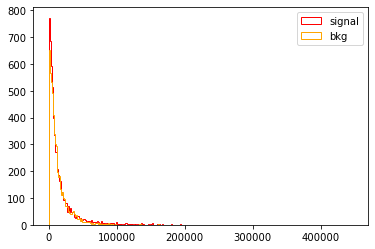

500GeV
lepton2_pt


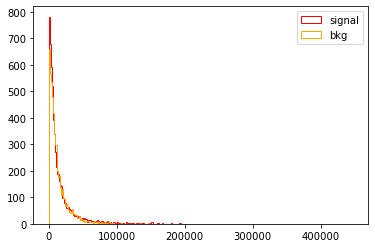

500GeV
lepton3_pt


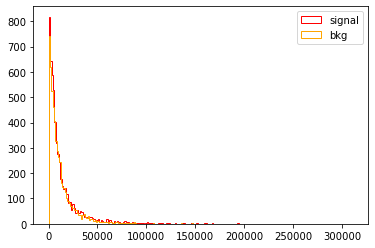

500GeV
lepton1_eta


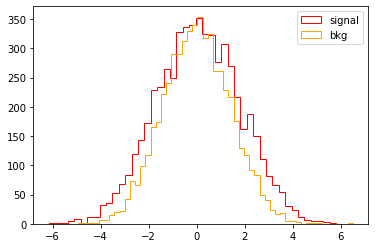

500GeV
lepton2_eta


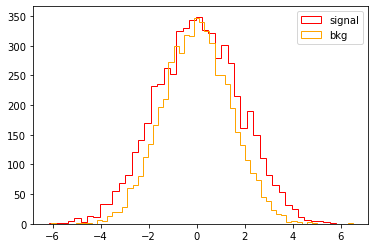

500GeV
lepton3_eta


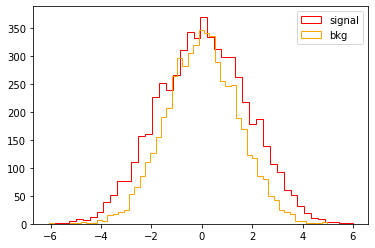

500GeV
lepton1_phi


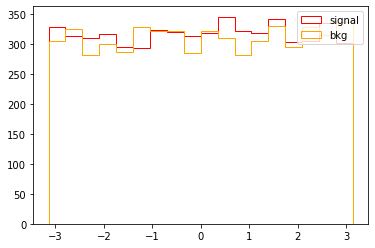

500GeV
lepton2_phi


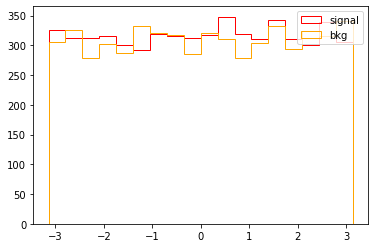

500GeV
lepton3_phi


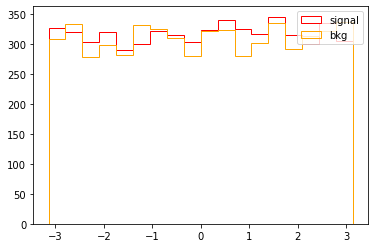

500GeV
MET


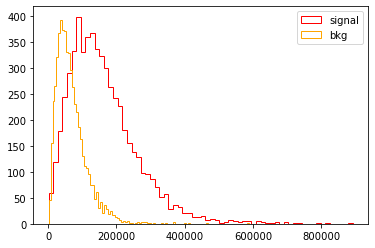

500GeV
MET_phi


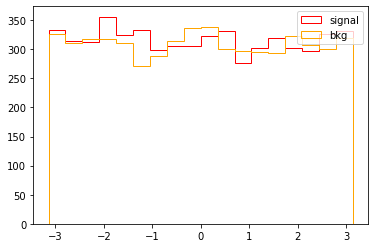

500GeV
lepton1_flavor


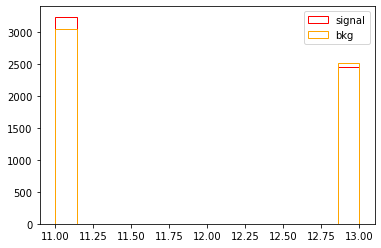

500GeV
lepton2_flavor


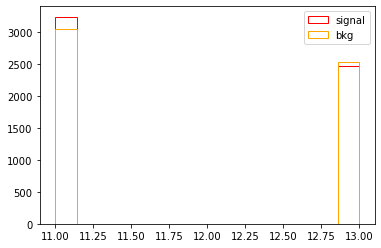

500GeV
lepton3_flavor


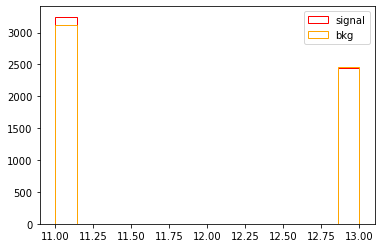

500GeV
lepton1_charge


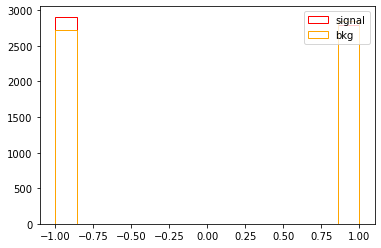

500GeV
lepton2_charge


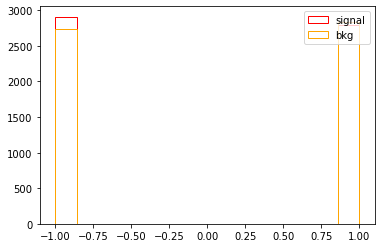

500GeV
lepton3_charge


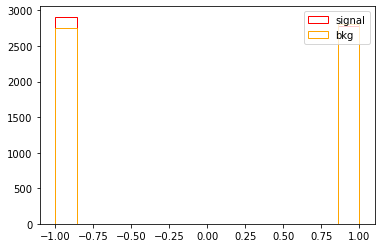

500GeV
visible_pt


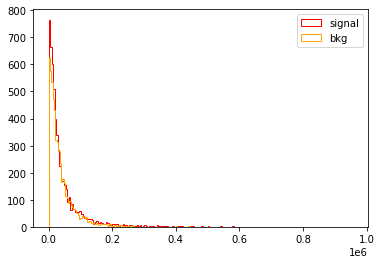

500GeV
transverse_mass


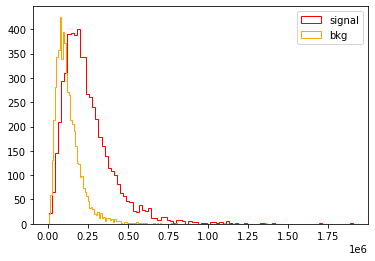

500GeV
dilep_mass


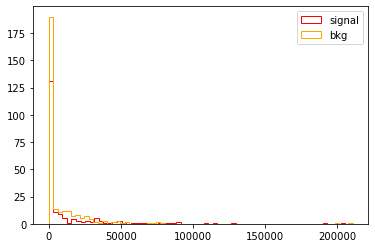

500GeV
dilep_DR


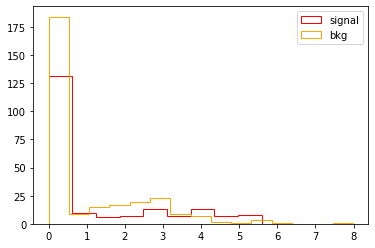

500GeV
signal


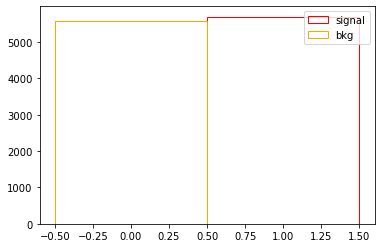

600GeV
lepton1_pt


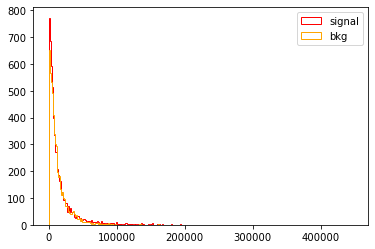

600GeV
lepton2_pt


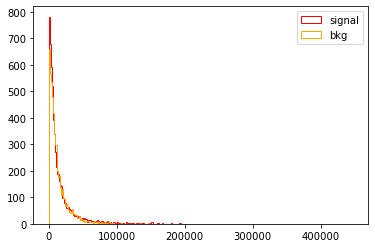

600GeV
lepton3_pt


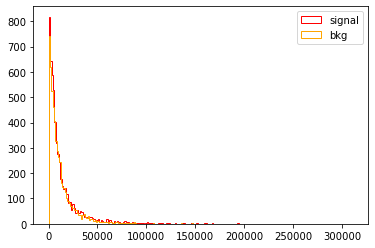

600GeV
lepton1_eta


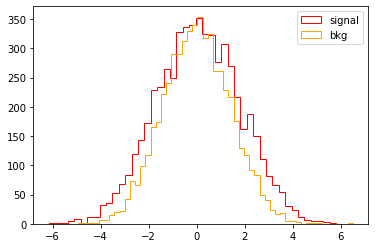

600GeV
lepton2_eta


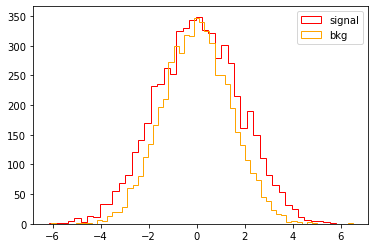

600GeV
lepton3_eta


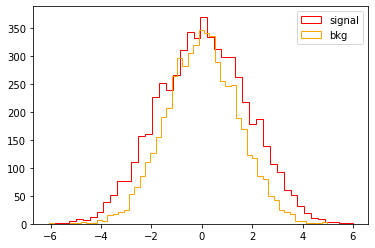

600GeV
lepton1_phi


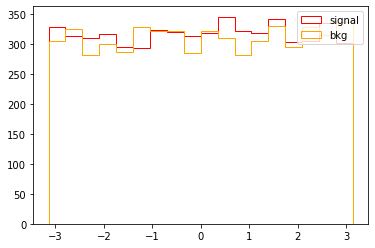

600GeV
lepton2_phi


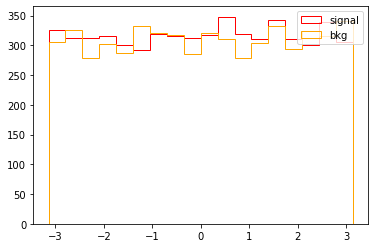

600GeV
lepton3_phi


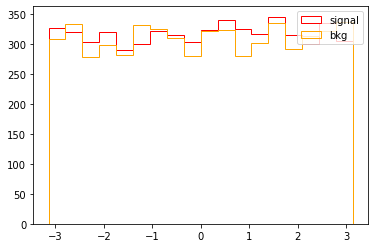

600GeV
MET


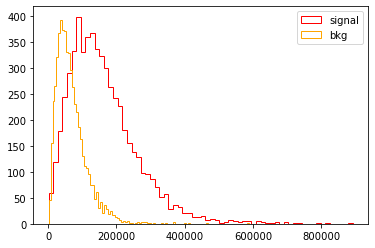

600GeV
MET_phi


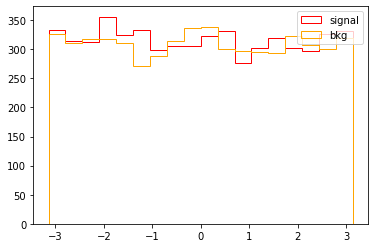

600GeV
lepton1_flavor


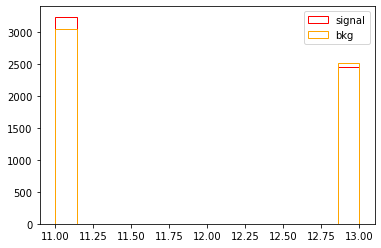

600GeV
lepton2_flavor


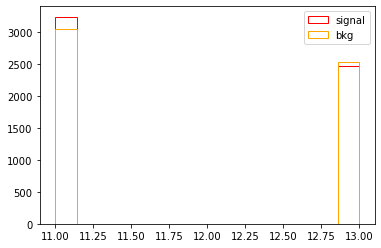

600GeV
lepton3_flavor


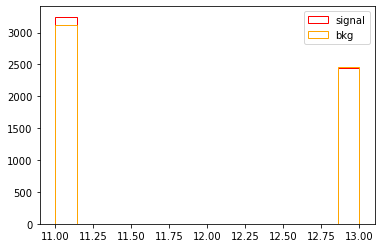

600GeV
lepton1_charge


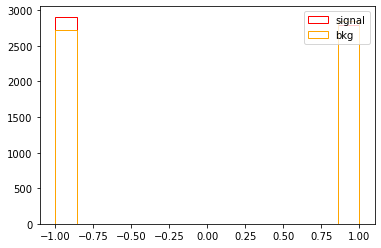

600GeV
lepton2_charge


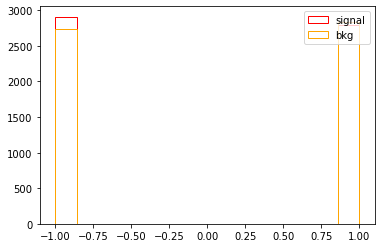

600GeV
lepton3_charge


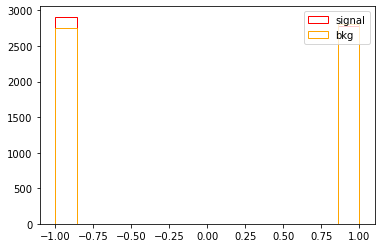

600GeV
visible_pt


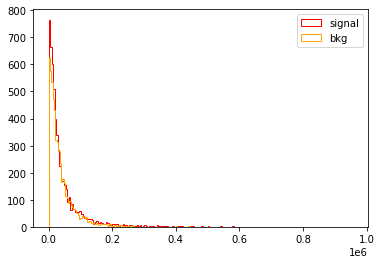

600GeV
transverse_mass


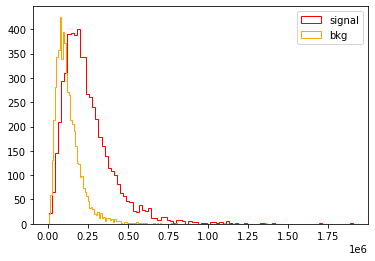

600GeV
dilep_mass


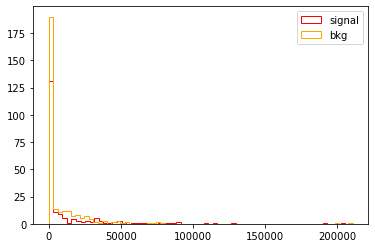

600GeV
dilep_DR


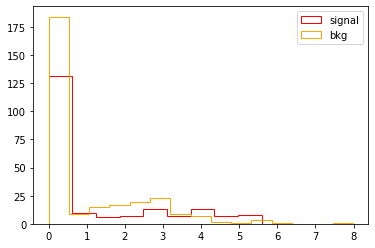

600GeV
signal


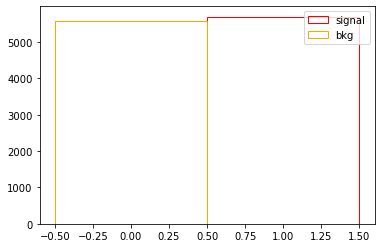

700GeV
lepton1_pt


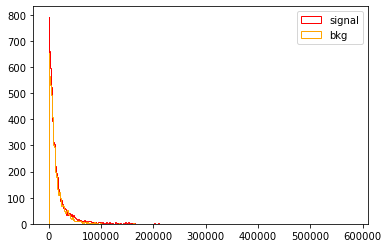

700GeV
lepton2_pt


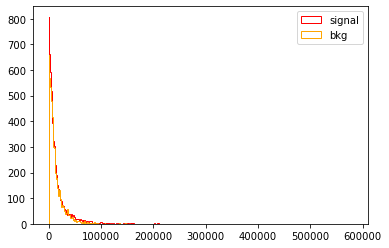

700GeV
lepton3_pt


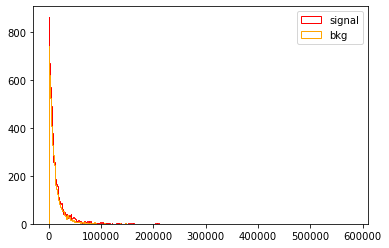

700GeV
lepton1_eta


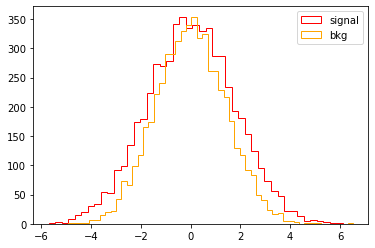

700GeV
lepton2_eta


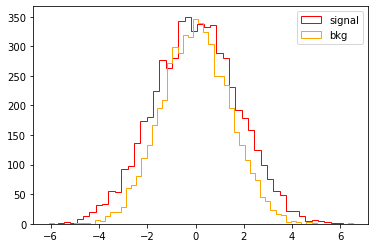

700GeV
lepton3_eta


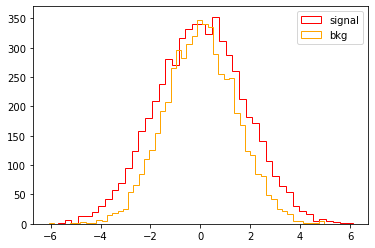

700GeV
lepton1_phi


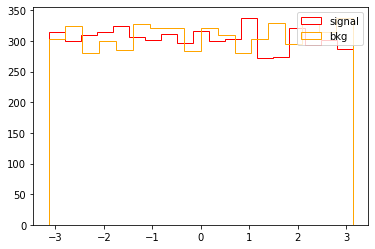

700GeV
lepton2_phi


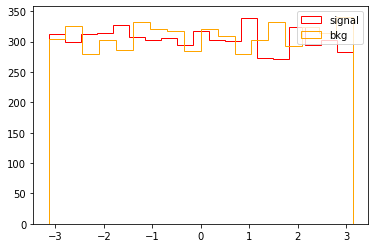

700GeV
lepton3_phi


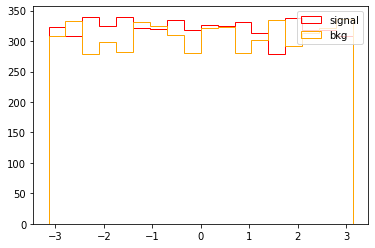

700GeV
MET


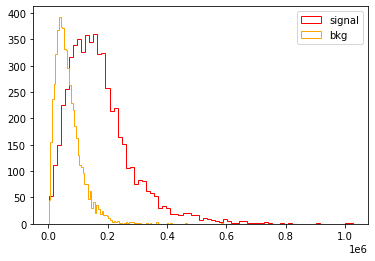

700GeV
MET_phi


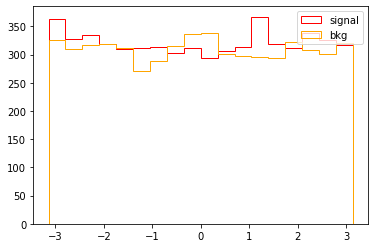

700GeV
lepton1_flavor


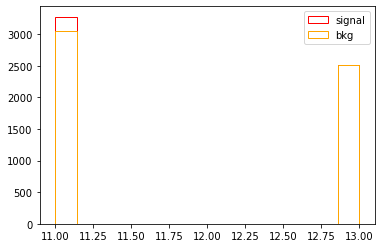

700GeV
lepton2_flavor


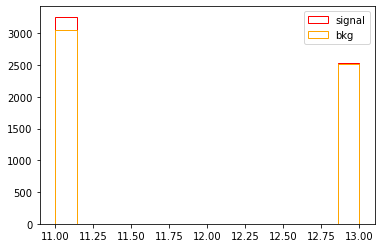

700GeV
lepton3_flavor


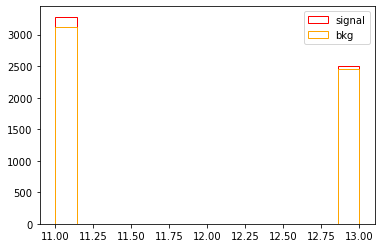

700GeV
lepton1_charge


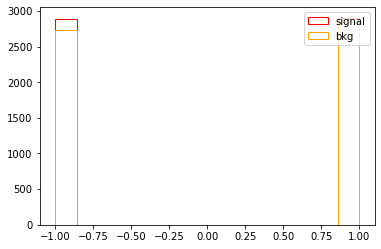

700GeV
lepton2_charge


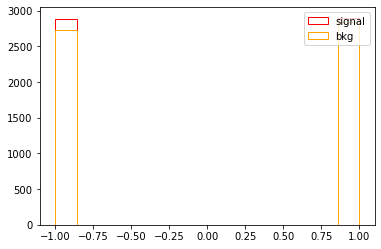

700GeV
lepton3_charge


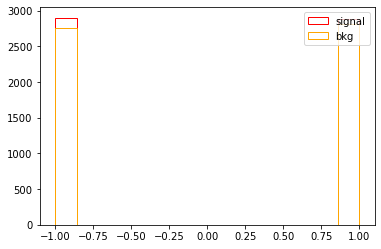

700GeV
visible_pt


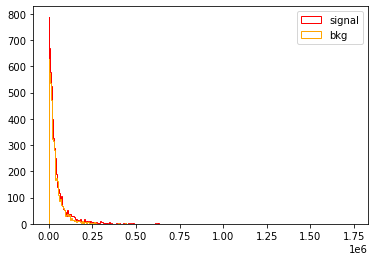

700GeV
transverse_mass


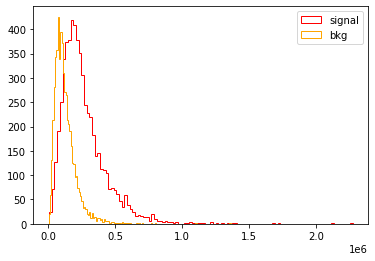

700GeV
dilep_mass


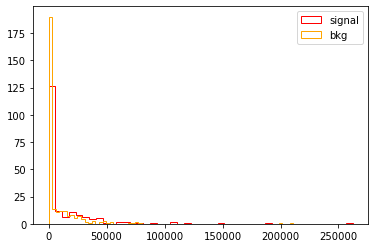

700GeV
dilep_DR


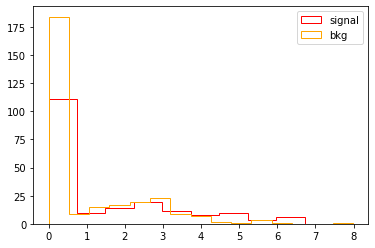

700GeV
signal


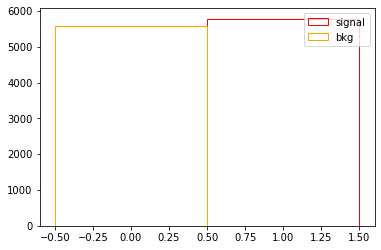

800GeV
lepton1_pt


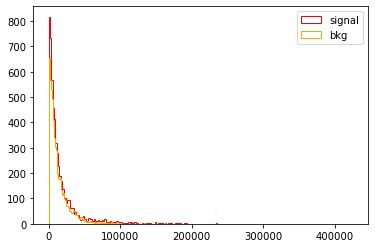

800GeV
lepton2_pt


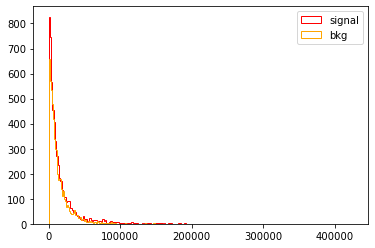

800GeV
lepton3_pt


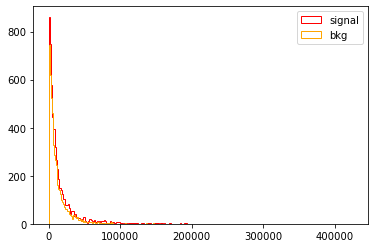

800GeV
lepton1_eta


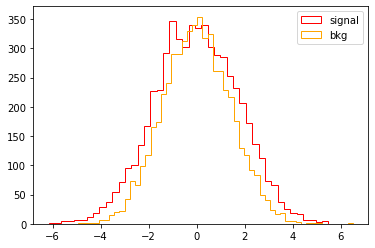

800GeV
lepton2_eta


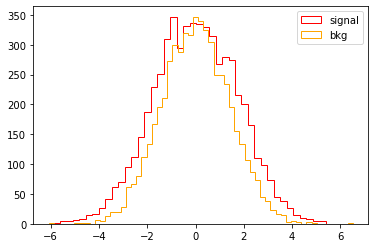

800GeV
lepton3_eta


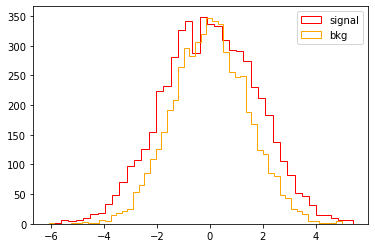

800GeV
lepton1_phi


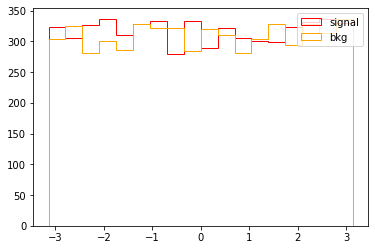

800GeV
lepton2_phi


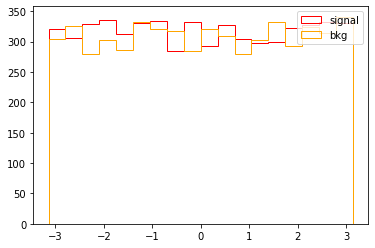

800GeV
lepton3_phi


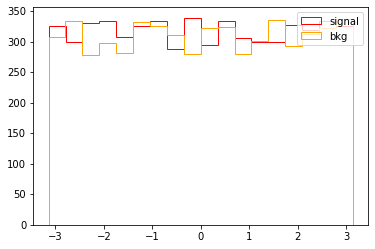

800GeV
MET


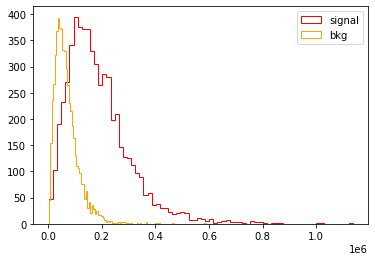

800GeV
MET_phi


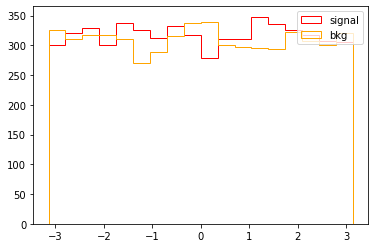

800GeV
lepton1_flavor


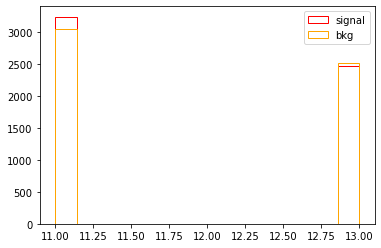

800GeV
lepton2_flavor


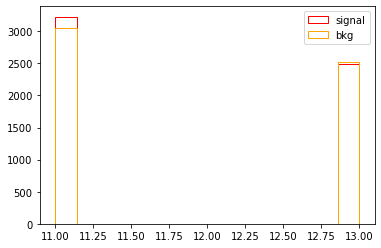

800GeV
lepton3_flavor


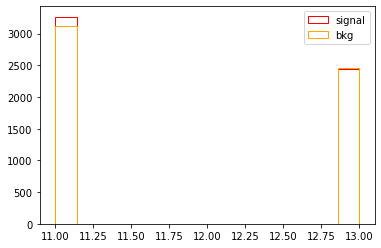

800GeV
lepton1_charge


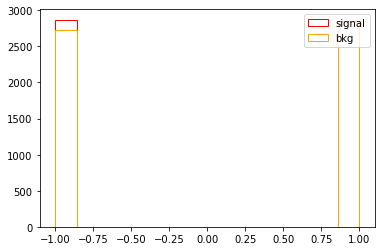

800GeV
lepton2_charge


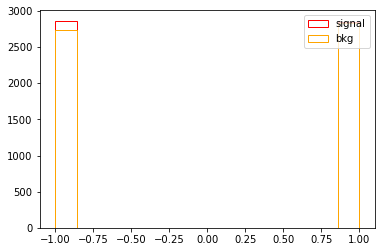

800GeV
lepton3_charge


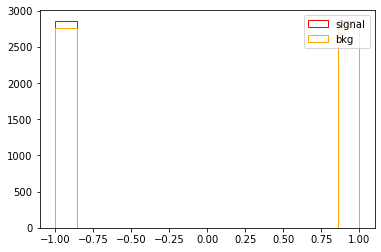

800GeV
visible_pt


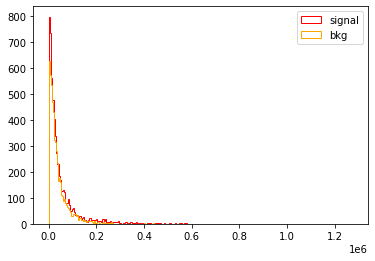

800GeV
transverse_mass


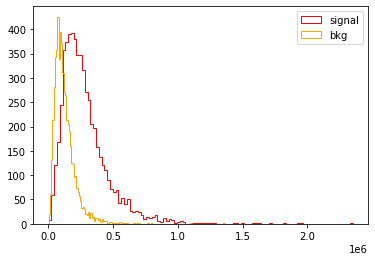

800GeV
dilep_mass


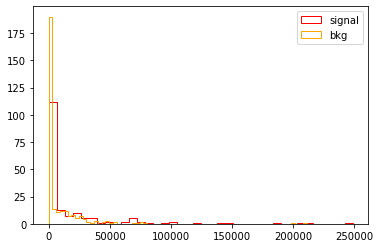

800GeV
dilep_DR


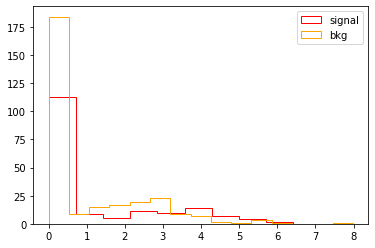

800GeV
signal


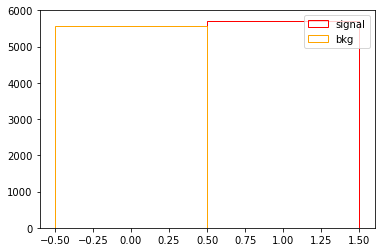

1000GeV
lepton1_pt


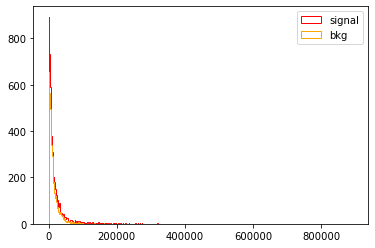

1000GeV
lepton2_pt


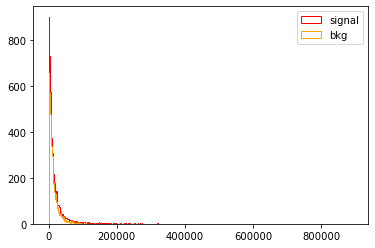

1000GeV
lepton3_pt


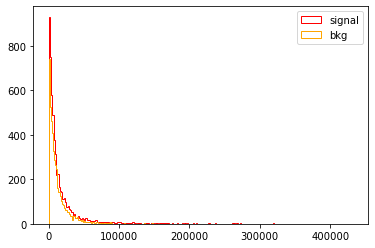

1000GeV
lepton1_eta


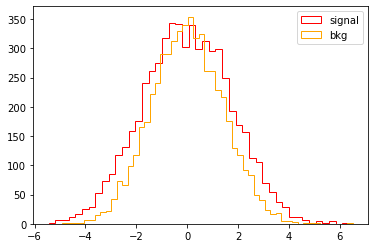

1000GeV
lepton2_eta


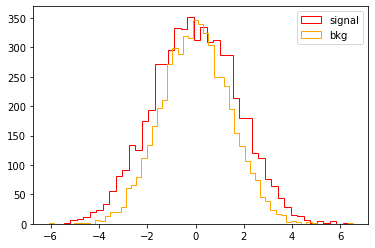

1000GeV
lepton3_eta


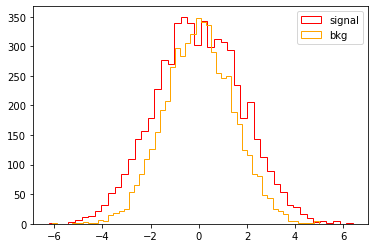

1000GeV
lepton1_phi


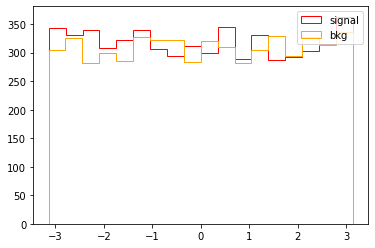

1000GeV
lepton2_phi


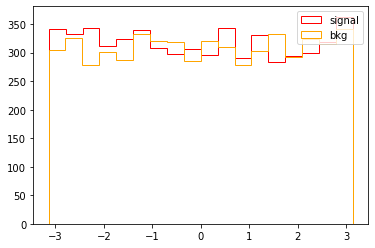

1000GeV
lepton3_phi


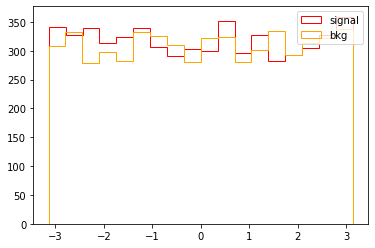

1000GeV
MET


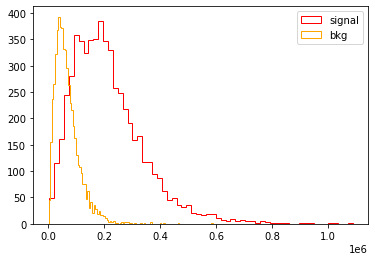

1000GeV
MET_phi


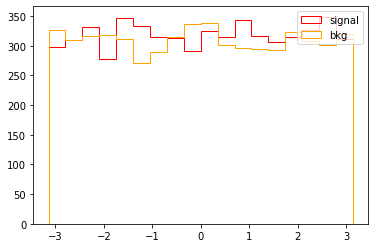

1000GeV
lepton1_flavor


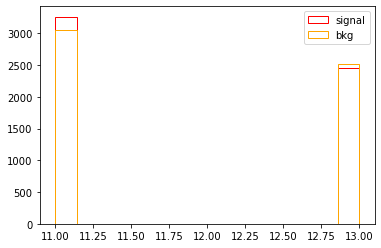

1000GeV
lepton2_flavor


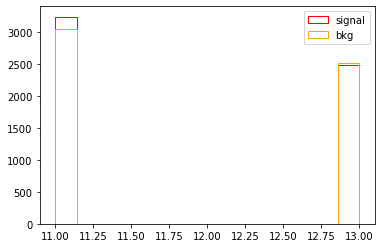

1000GeV
lepton3_flavor


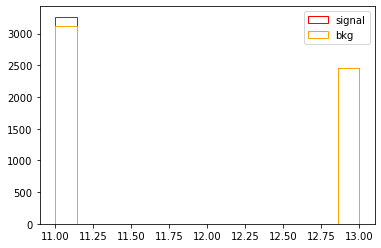

1000GeV
lepton1_charge


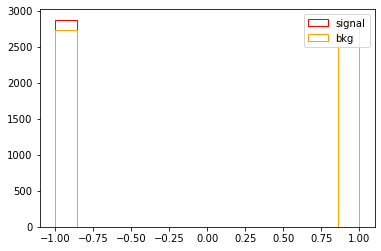

1000GeV
lepton2_charge


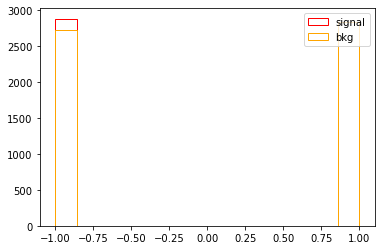

1000GeV
lepton3_charge


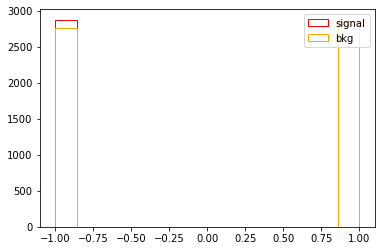

1000GeV
visible_pt


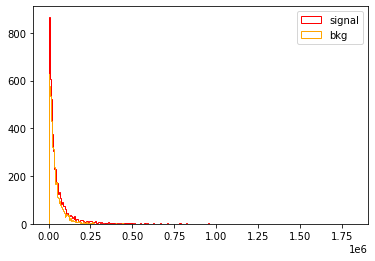

1000GeV
transverse_mass


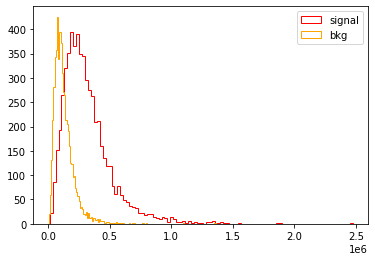

1000GeV
dilep_mass


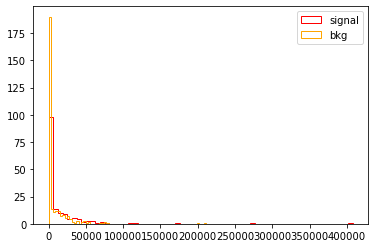

1000GeV
dilep_DR


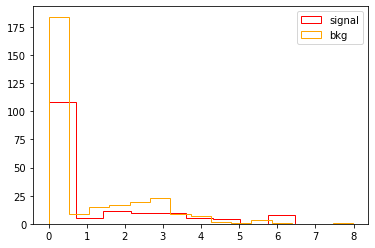

1000GeV
signal


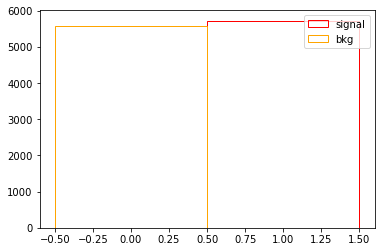

In [17]:
SignalPlotLoop(df_sig, df_bkg)

In [18]:
#standardize stuff function
min_max_scaler = preprocessing.MinMaxScaler()

def standardize_stuff(n):
    print ("HI", n, n.min(),n.max())
    return (n - n.min())/(n.max() - n.min())

In [19]:
series_list_500 = []
series_list_600 = [] 
series_list_700 = []
series_list_800 = [] 
series_list_1000 = []
series_list = [series_list_500,series_list_600,series_list_700,series_list_800,series_list_1000]
df_norm_sig = ['df_norm_sig500','df_norm_sig600','df_norm_sig700','df_norm_sig800','df_norm_sig1000']

In [20]:
#standardize signal stuff
for sig in range(len(df_sig)):
    for var in df_sig[sig].columns:
        print(mass_points[sig])
        print(var)
        if var == "signal":
            series_list[sig].append(df_sig[sig][var])
            continue
        #    if "flavor" or "charge" in var:
        #        series_list.append(df_sig[var])
        #        continue
        print (df_sig[sig][var])
        print (df_sig[sig][var].min())
        print (df_sig[sig][var].max())
        print (standardize_stuff(df_sig[sig][var]))
        print (series_list[sig].append((df_sig[sig][var] - df_sig[sig][var].min())/(df_sig[sig][var].max() - df_sig[sig][var].min())))

    df_norm_sig[sig] = pd.DataFrame(series_list[sig]).T

500GeV
lepton1_pt
0        9572.198880
1         544.391717
2        3791.947692
3       19213.982001
4          72.983979
            ...     
5693     3660.052040
5694     9089.589710
5695      558.868779
5696     4909.981649
5697    11569.661287
Name: lepton1_pt, Length: 5698, dtype: float64
0.6734660879932628
447200.4378852693
HI 0        9572.198880
1         544.391717
2        3791.947692
3       19213.982001
4          72.983979
            ...     
5693     3660.052040
5694     9089.589710
5695      558.868779
5696     4909.981649
5697    11569.661287
Name: lepton1_pt, Length: 5698, dtype: float64 0.6734660879932628 447200.4378852693
0       0.021403
1       0.001216
2       0.008478
3       0.042964
4       0.000162
          ...   
5693    0.008183
5694    0.020324
5695    0.001248
5696    0.010978
5697    0.025870
Name: lepton1_pt, Length: 5698, dtype: float64
None
500GeV
lepton2_pt
0        9572.198880
1         544.391717
2        3791.947692
3       19213.982001
4       

600GeV
lepton1_pt
0        9572.198880
1         544.391717
2        3791.947692
3       19213.982001
4          72.983979
            ...     
5693     3660.052040
5694     9089.589710
5695      558.868779
5696     4909.981649
5697    11569.661287
Name: lepton1_pt, Length: 5698, dtype: float64
0.6734660879932628
447200.4378852693
HI 0        9572.198880
1         544.391717
2        3791.947692
3       19213.982001
4          72.983979
            ...     
5693     3660.052040
5694     9089.589710
5695      558.868779
5696     4909.981649
5697    11569.661287
Name: lepton1_pt, Length: 5698, dtype: float64 0.6734660879932628 447200.4378852693
0       0.021403
1       0.001216
2       0.008478
3       0.042964
4       0.000162
          ...   
5693    0.008183
5694    0.020324
5695    0.001248
5696    0.010978
5697    0.025870
Name: lepton1_pt, Length: 5698, dtype: float64
None
600GeV
lepton2_pt
0        9572.198880
1         544.391717
2        3791.947692
3       19213.982001
4       

700GeV
lepton1_pt
0       24280.246621
1       52813.199459
2        3190.501154
3       17595.494431
4       13383.856563
            ...     
5781    33840.158026
5782     1124.466258
5783     4095.210994
5784     3121.345018
5785    16415.076930
Name: lepton1_pt, Length: 5786, dtype: float64
2.737172320905413
581023.3134268239
HI 0       24280.246621
1       52813.199459
2        3190.501154
3       17595.494431
4       13383.856563
            ...     
5781    33840.158026
5782     1124.466258
5783     4095.210994
5784     3121.345018
5785    16415.076930
Name: lepton1_pt, Length: 5786, dtype: float64 2.737172320905413 581023.3134268239
0       0.041784
1       0.090893
2       0.005486
3       0.030279
4       0.023030
          ...   
5781    0.058238
5782    0.001931
5783    0.007044
5784    0.005367
5785    0.028247
Name: lepton1_pt, Length: 5786, dtype: float64
None
700GeV
lepton2_pt
0       24280.246621
1       52813.199459
2        3190.501154
3       17595.494431
4       13

800GeV
lepton1_pt
0       10098.030800
1       24142.879938
2        1264.034775
3       21217.088203
4       14589.156685
            ...     
5712     8812.708814
5713     1436.295689
5714     4231.247805
5715     5645.133503
5716     1927.644045
Name: lepton1_pt, Length: 5717, dtype: float64
0.4397306958239294
425384.0893290781
HI 0       10098.030800
1       24142.879938
2        1264.034775
3       21217.088203
4       14589.156685
            ...     
5712     8812.708814
5713     1436.295689
5714     4231.247805
5715     5645.133503
5716     1927.644045
Name: lepton1_pt, Length: 5717, dtype: float64 0.4397306958239294 425384.0893290781
0       0.023738
1       0.056755
2       0.002970
3       0.049877
4       0.034295
          ...   
5712    0.020716
5713    0.003375
5714    0.009946
5715    0.013270
5716    0.004531
Name: lepton1_pt, Length: 5717, dtype: float64
None
800GeV
lepton2_pt
0       10098.030800
1       24142.879938
2        1264.034775
3       21217.088203
4       

1000GeV
lepton1_pt
0       25674.612240
1       23709.593826
2        3929.084355
3       65850.912499
4       41456.769040
            ...     
5720    12785.920022
5721     1913.566835
5722    24566.493562
5723     4803.077688
5724    50231.137614
Name: lepton1_pt, Length: 5725, dtype: float64
1.1792454511455448
892295.2481901682
HI 0       25674.612240
1       23709.593826
2        3929.084355
3       65850.912499
4       41456.769040
            ...     
5720    12785.920022
5721     1913.566835
5722    24566.493562
5723     4803.077688
5724    50231.137614
Name: lepton1_pt, Length: 5725, dtype: float64 1.1792454511455448 892295.2481901682
0       0.028772
1       0.026570
2       0.004402
3       0.073798
4       0.046460
          ...   
5720    0.014328
5721    0.002143
5722    0.027531
5723    0.005382
5724    0.056293
Name: lepton1_pt, Length: 5725, dtype: float64
None
1000GeV
lepton2_pt
0       25674.612240
1       23709.593826
2        3929.084355
3       65850.912499
4     

In [21]:
#standardize bkg stuff
series_list_bkg = []
for var in df_bkg.columns:
    print(var)
    if var == "signal":
        series_list_bkg.append(df_bkg[var])
        continue
#    if "flavor" or "charge" in var:
#        series_list_bkg.append(df_bkg[var])
#        continue
#    print (df_sig[var])
    print(df_bkg[var].min())
    print(df_bkg[var].max())
    print (standardize_stuff(df_bkg[var]))
    print (series_list_bkg.append((df_bkg[var] - df_bkg[var].min())/(df_bkg[var].max() - df_bkg[var].min())))

df_norm_bkg = pd.DataFrame(series_list_bkg).T

lepton1_pt
0.7956316290356638
264176.89704024
HI 0        1639.017018
1        6726.094162
2       23003.947422
3        4525.579193
4        2701.589652
            ...     
5566     9432.411300
5567     7213.833015
5568    40186.730760
5569    13428.798238
5570    32606.547319
Name: lepton1_pt, Length: 5571, dtype: float64 0.7956316290356638 264176.89704024
0       0.006201
1       0.025458
2       0.087075
3       0.017128
4       0.010223
          ...   
5566    0.035702
5567    0.027304
5568    0.152118
5569    0.050830
5570    0.123424
Name: lepton1_pt, Length: 5571, dtype: float64
None
lepton2_pt
0.7956316290356638
264176.89704024
HI 0        1639.017018
1        6726.094162
2       23003.947422
3        4525.579193
4        2701.589652
            ...     
5566     9432.411300
5567     7213.833015
5568    40186.730760
5569    13428.798238
5570    32606.547319
Name: lepton2_pt, Length: 5571, dtype: float64 0.7956316290356638 264176.89704024
0       0.006201
1       0.025458
2  

In [22]:
df_norm_bkg

lepton1_pt  lepton2_pt  lepton3_pt  lepton1_eta  lepton2_eta  \
0       0.006201    0.006201    0.006201     0.497995     0.543661   
1       0.025458    0.025458    0.025458     0.658161     0.689257   
2       0.087075    0.087075    0.087075     0.367210     0.424774   
3       0.017128    0.017128    0.017128     0.346817     0.406236   
4       0.010223    0.010223    0.010223     0.666231     0.696593   
...          ...         ...         ...          ...          ...   
5566    0.035702    0.035702    0.035702     0.593237     0.630239   
5567    0.027304    0.027304    0.027304     0.465325     0.513963   
5568    0.152118    0.152118    0.026364     0.586857     0.624439   
5569    0.050830    0.050830    0.012062     0.397169     0.452007   
5570    0.123424    0.123424    0.123424     0.416875     0.469920   

      lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi       MET  ...  \
0        0.619525     0.117390     0.117390     0.117489  0.444216  ...   
1        0.785438     0.354979     0.354979     0.355051  0.170198  ...   
2        0.484048     0.060340     0.060340     0.060446  0.120097  ...   
3        0.462923     0.555479     0.555479     0.555530  0.024334  ...   
4        0.793797     0.958758     0.958758     0.958763  0.113747  ...   
...           ...          ...          ...          ...       ...  ...   
5566     0.718184     0.836033     0.836033     0.836052  0.100626  ...   
5567     0.585683     0.375023     0.375023     0.375093  0.033326  ...   
5568     0.491206     0.881128     0.881128     0.285177  0.054222  ...   
5569     0.645424     0.954729     0.954729     0.741013  0.125666  ...   
5570     0.535494     0.841530     0.841530     0.841548  0.026252  ...   

      lepton2_flavor  lepton3_flavor  lepton1_charge  lepton2_charge  \
0                1.0             1.0             1.0             1.0   
1                1.0             1.0             0.0             0.0   
2                1.0             1.0             1.0             1.0   
3                0.0             0.0             0.0             0.0   
4                0.0             0.0             1.0             1.0   
...              ...             ...             ...             ...   
5566             0.0             0.0             0.0             0.0   
5567             1.0             1.0             0.0             0.0   
5568             0.0             0.0             0.0             0.0   
5569             0.0             0.0             1.0             1.0   
5570             1.0             1.0             0.0             0.0   

      lepton3_charge  visible_pt  transverse_mass  dilep_mass  dilep_DR  \
0                1.0    0.006201         0.195423         NaN       NaN   
1                0.0    0.025458         0.141709         NaN       NaN   
2                1.0    0.087075         0.108281         NaN       NaN   
3                0.0    0.017128         0.021486         NaN       NaN   
4                1.0    0.010223         0.081121         NaN       NaN   
...              ...         ...              ...         ...       ...   
5566             0.0    0.035702         0.089643         NaN       NaN   
5567             0.0    0.027304         0.029361         NaN       NaN   
5568             0.0    0.094300         0.127032         NaN       NaN   
5569             0.0    0.035015         0.077720    0.062154  0.246783   
5570             0.0    0.123424         0.081951         NaN       NaN   

      signal  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
5566     0.0  
5567     0.0  
5568     0.0  
5569     0.0  
5570     0.0  

[5571 rows x 22 columns]

500GeV
lepton1_pt


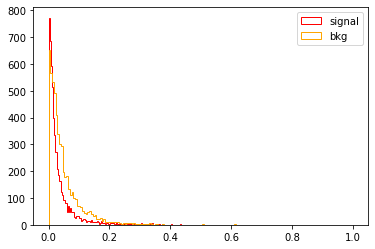

500GeV
lepton2_pt


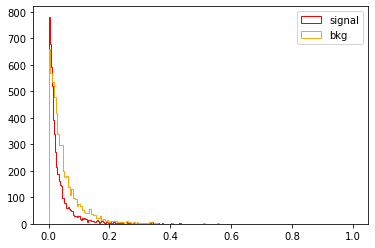

500GeV
lepton3_pt


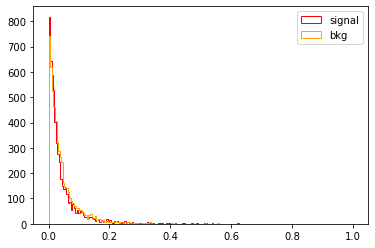

500GeV
lepton1_eta


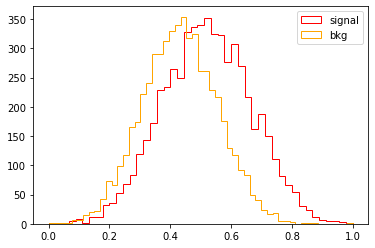

500GeV
lepton2_eta


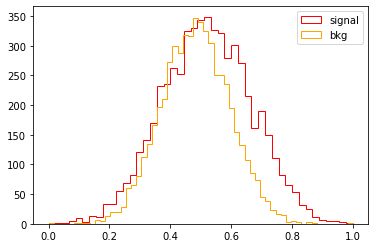

500GeV
lepton3_eta


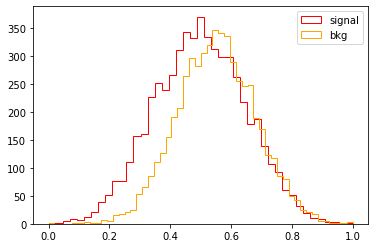

500GeV
lepton1_phi


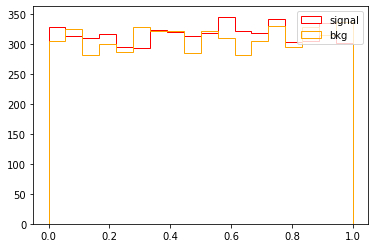

500GeV
lepton2_phi


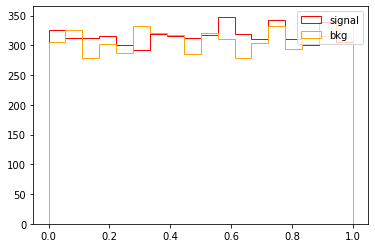

500GeV
lepton3_phi


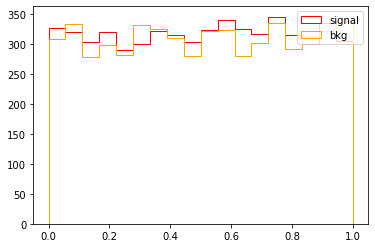

500GeV
MET


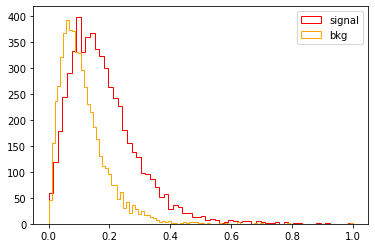

500GeV
MET_phi


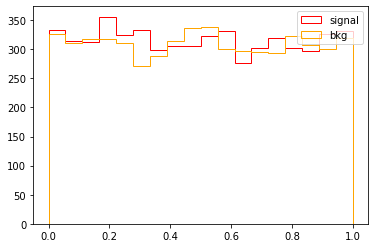

500GeV
lepton1_flavor


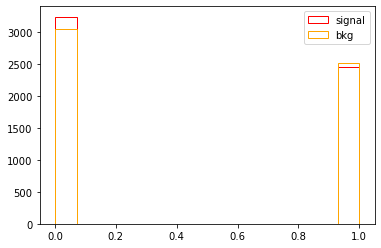

500GeV
lepton2_flavor


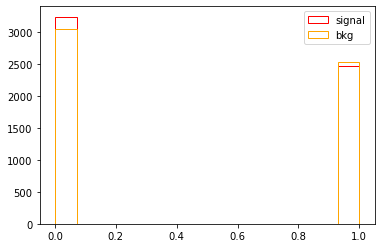

500GeV
lepton3_flavor


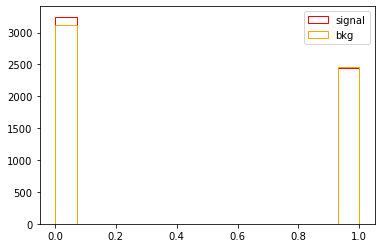

500GeV
lepton1_charge


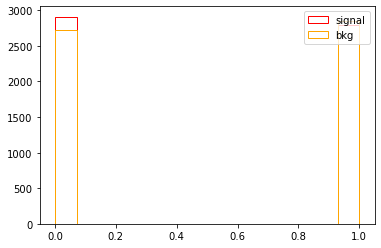

500GeV
lepton2_charge


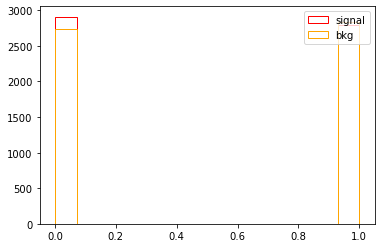

500GeV
lepton3_charge


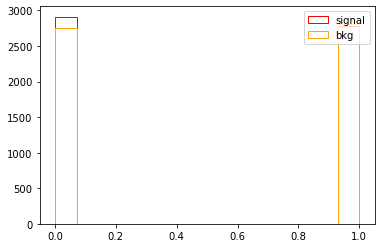

500GeV
visible_pt


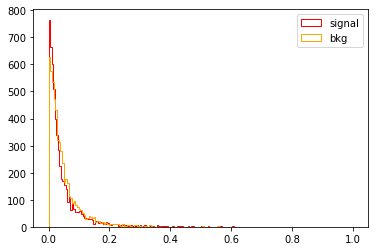

500GeV
transverse_mass


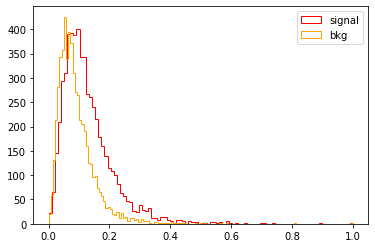

500GeV
dilep_mass


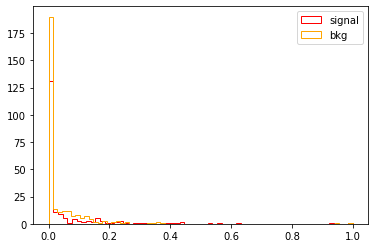

500GeV
dilep_DR


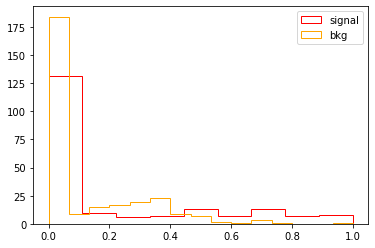

500GeV
signal


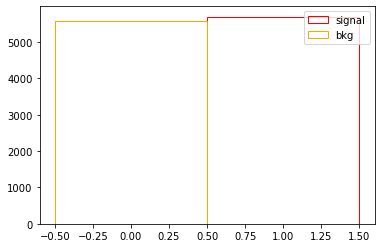

600GeV
lepton1_pt


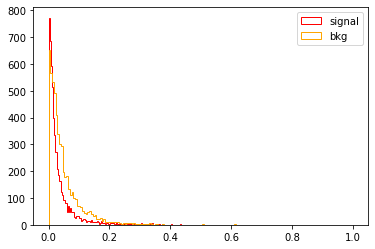

600GeV
lepton2_pt


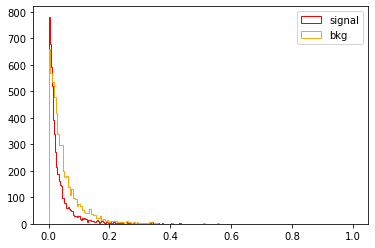

600GeV
lepton3_pt


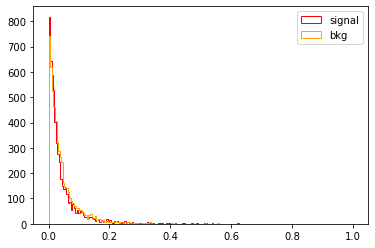

600GeV
lepton1_eta


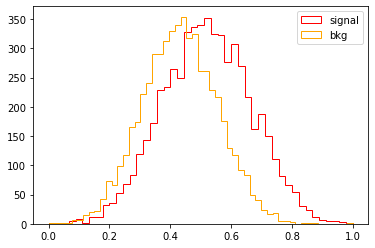

600GeV
lepton2_eta


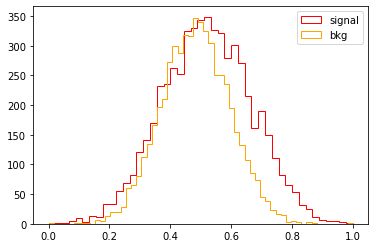

600GeV
lepton3_eta


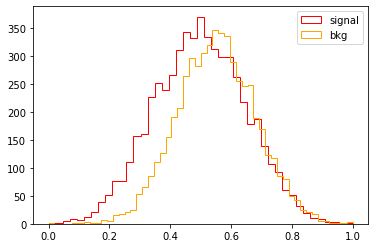

600GeV
lepton1_phi


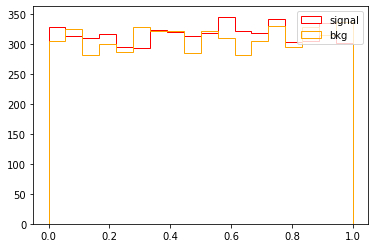

600GeV
lepton2_phi


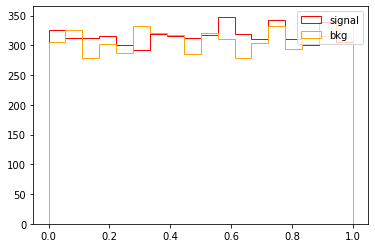

600GeV
lepton3_phi


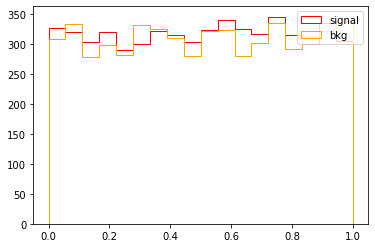

600GeV
MET


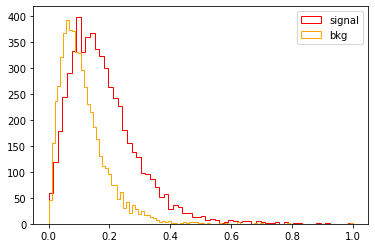

600GeV
MET_phi


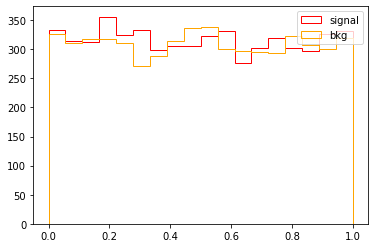

600GeV
lepton1_flavor


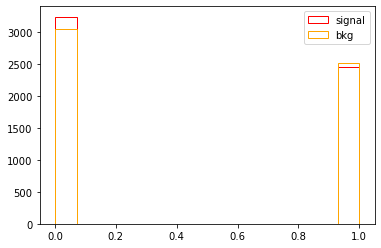

600GeV
lepton2_flavor


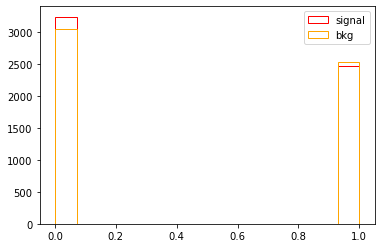

600GeV
lepton3_flavor


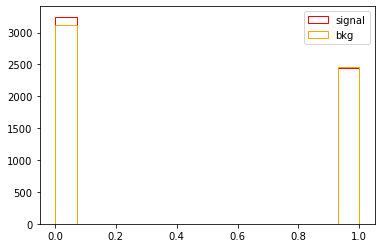

600GeV
lepton1_charge


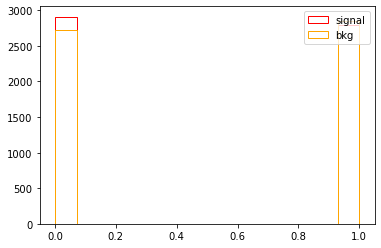

600GeV
lepton2_charge


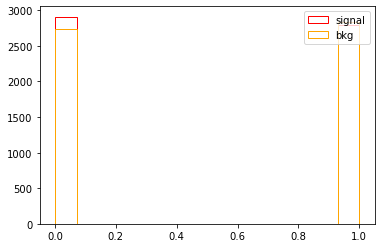

600GeV
lepton3_charge


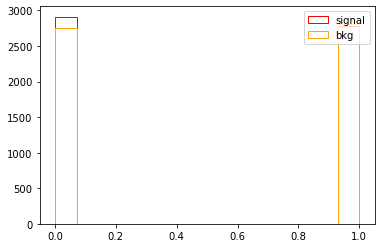

600GeV
visible_pt


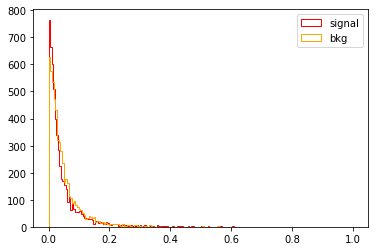

600GeV
transverse_mass


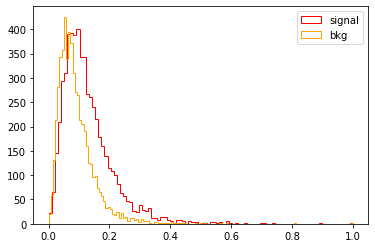

600GeV
dilep_mass


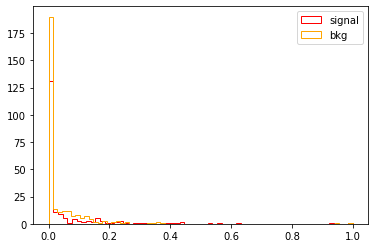

600GeV
dilep_DR


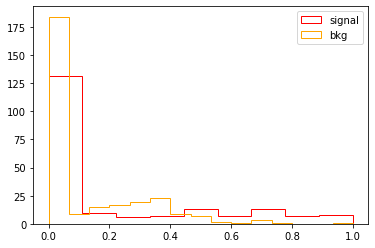

600GeV
signal


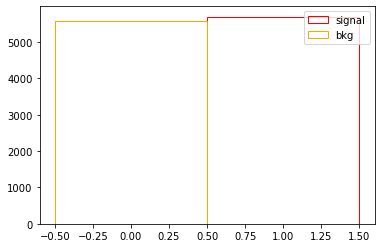

700GeV
lepton1_pt


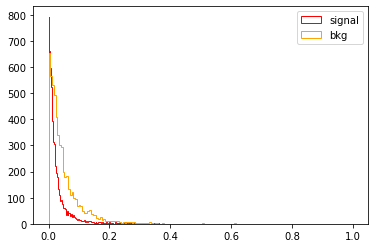

700GeV
lepton2_pt


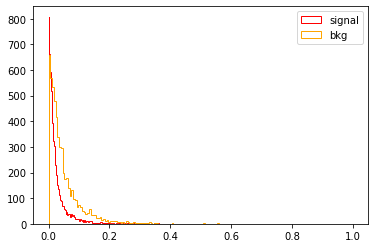

700GeV
lepton3_pt


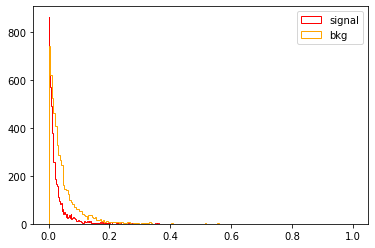

700GeV
lepton1_eta


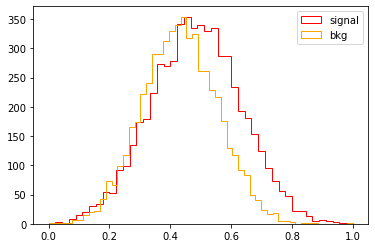

700GeV
lepton2_eta


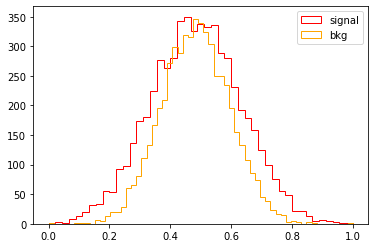

700GeV
lepton3_eta


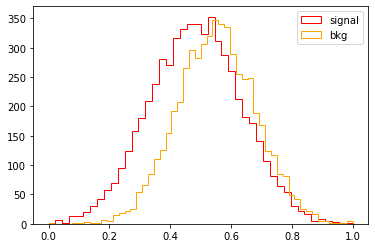

700GeV
lepton1_phi


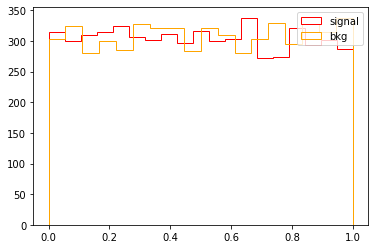

700GeV
lepton2_phi


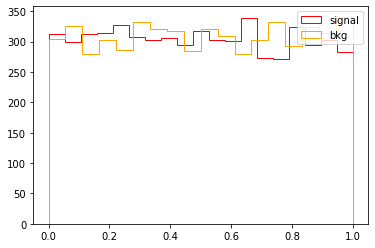

700GeV
lepton3_phi


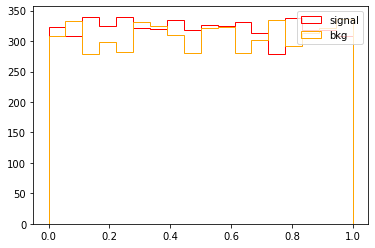

700GeV
MET


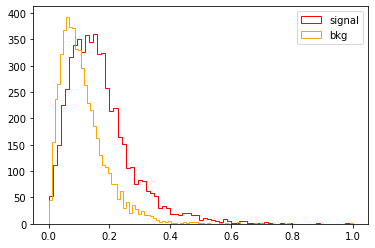

700GeV
MET_phi


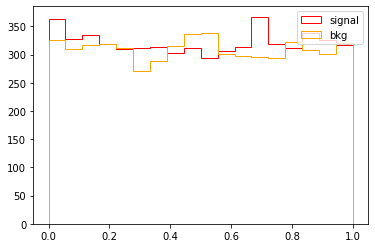

700GeV
lepton1_flavor


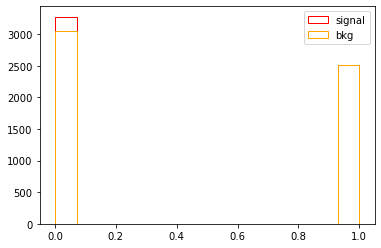

700GeV
lepton2_flavor


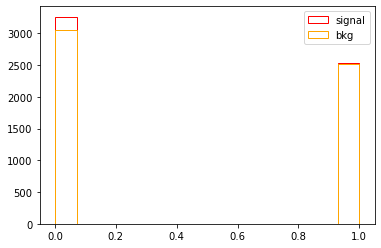

700GeV
lepton3_flavor


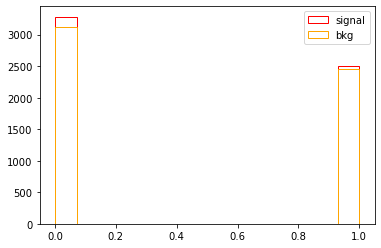

700GeV
lepton1_charge


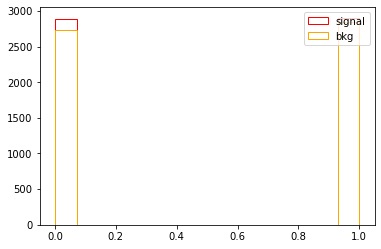

700GeV
lepton2_charge


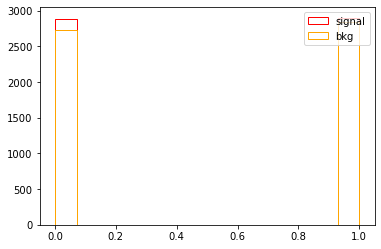

700GeV
lepton3_charge


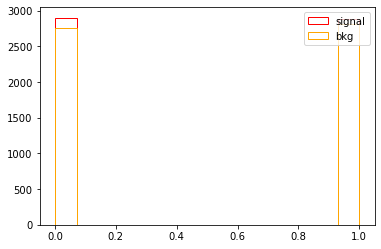

700GeV
visible_pt


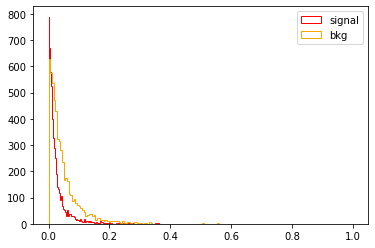

700GeV
transverse_mass


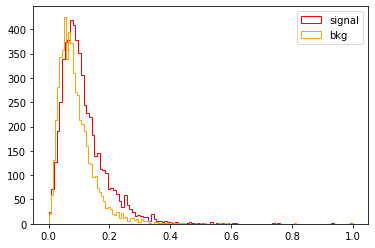

700GeV
dilep_mass


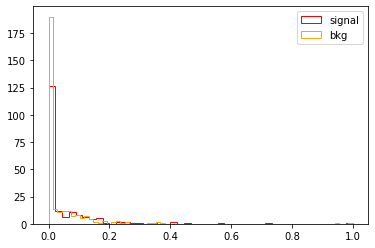

700GeV
dilep_DR


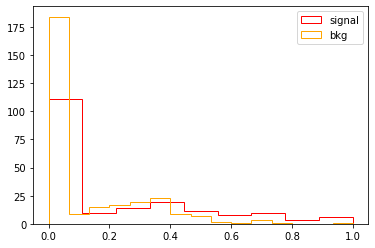

700GeV
signal


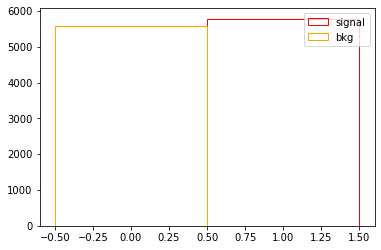

800GeV
lepton1_pt


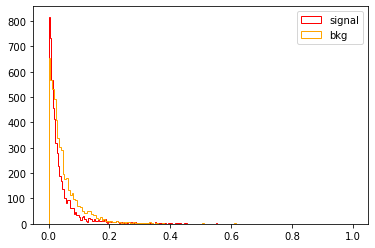

800GeV
lepton2_pt


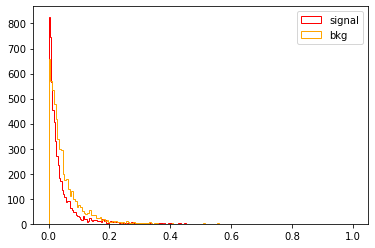

800GeV
lepton3_pt


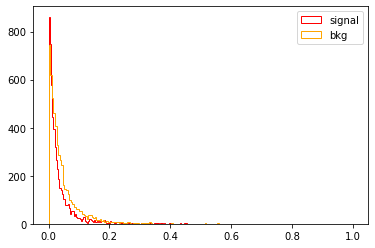

800GeV
lepton1_eta


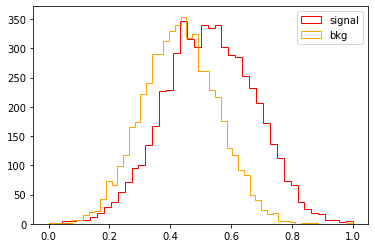

800GeV
lepton2_eta


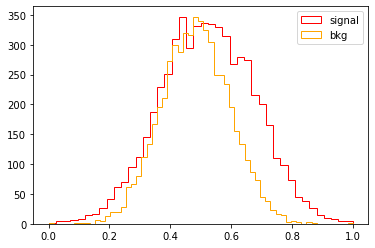

800GeV
lepton3_eta


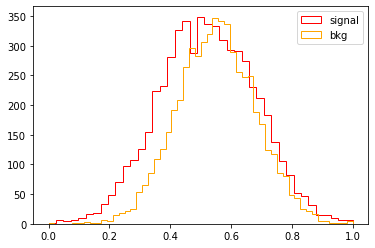

800GeV
lepton1_phi


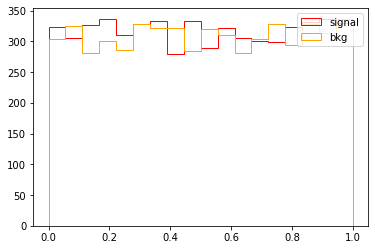

800GeV
lepton2_phi


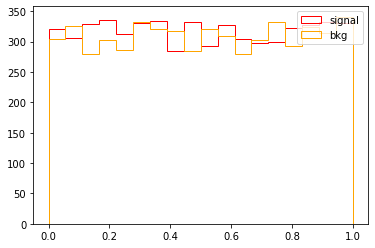

800GeV
lepton3_phi


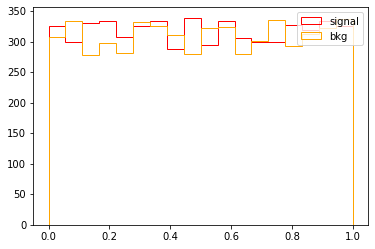

800GeV
MET


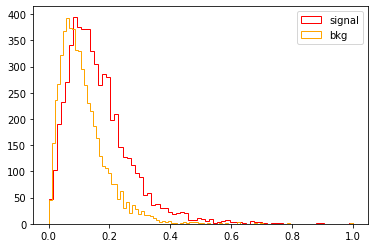

800GeV
MET_phi


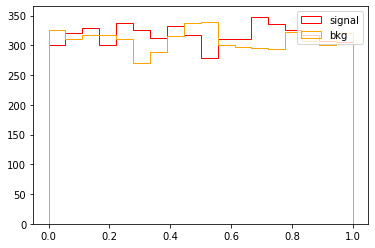

800GeV
lepton1_flavor


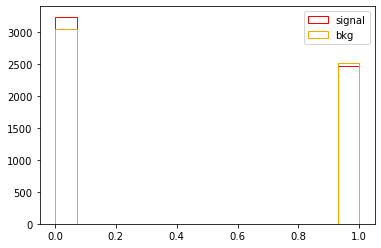

800GeV
lepton2_flavor


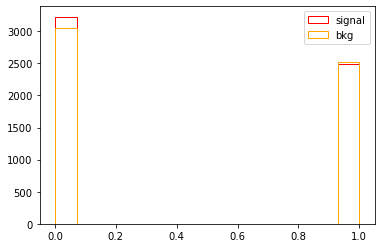

800GeV
lepton3_flavor


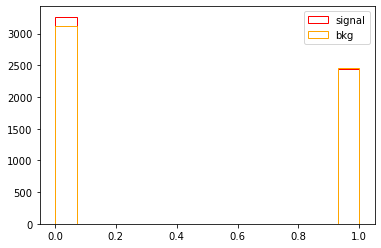

800GeV
lepton1_charge


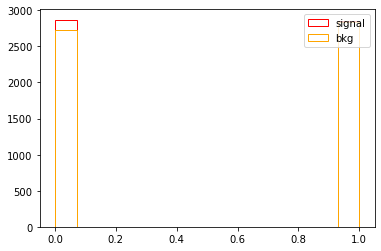

800GeV
lepton2_charge


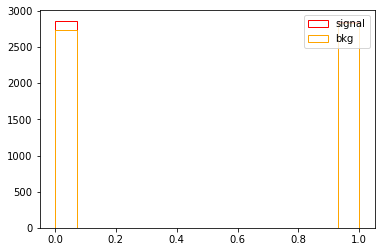

800GeV
lepton3_charge


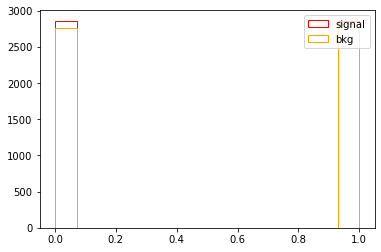

800GeV
visible_pt


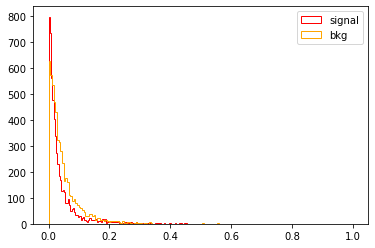

800GeV
transverse_mass


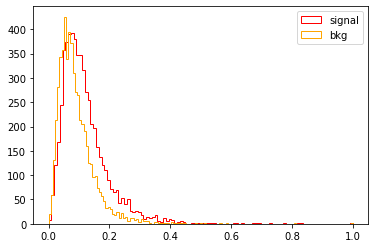

800GeV
dilep_mass


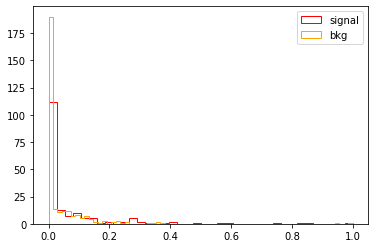

800GeV
dilep_DR


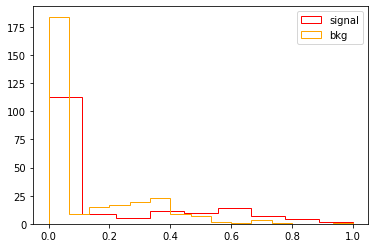

800GeV
signal


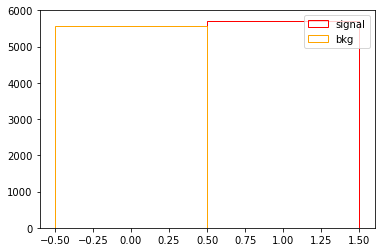

1000GeV
lepton1_pt


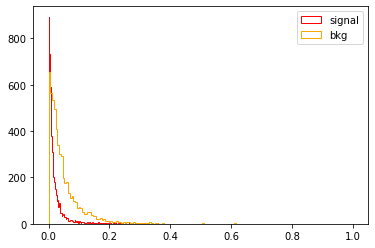

1000GeV
lepton2_pt


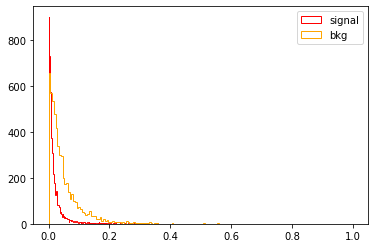

1000GeV
lepton3_pt


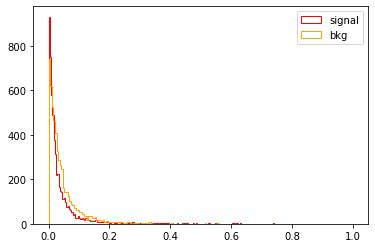

1000GeV
lepton1_eta


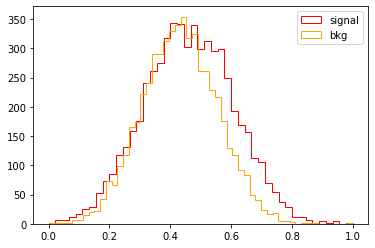

1000GeV
lepton2_eta


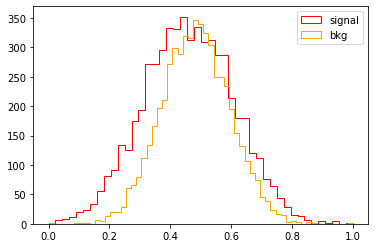

1000GeV
lepton3_eta


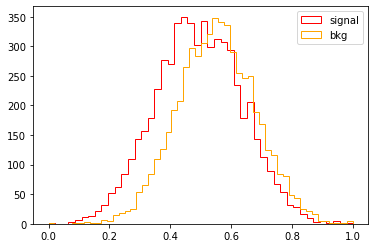

1000GeV
lepton1_phi


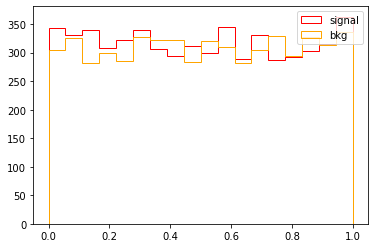

1000GeV
lepton2_phi


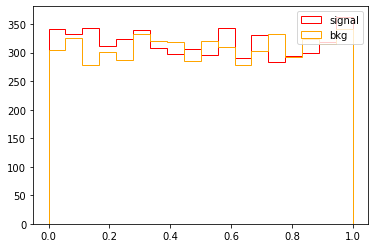

1000GeV
lepton3_phi


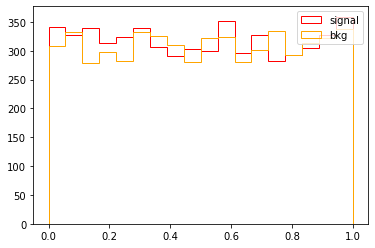

1000GeV
MET


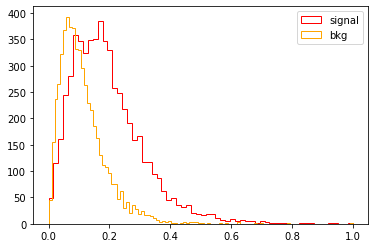

1000GeV
MET_phi


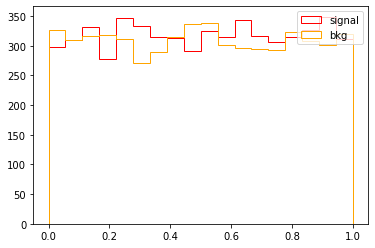

1000GeV
lepton1_flavor


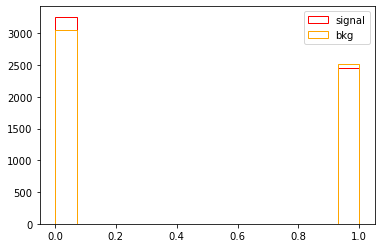

1000GeV
lepton2_flavor


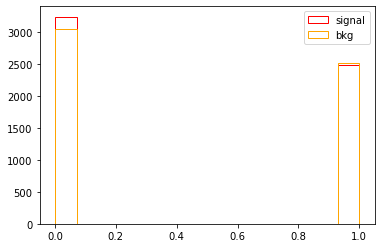

1000GeV
lepton3_flavor


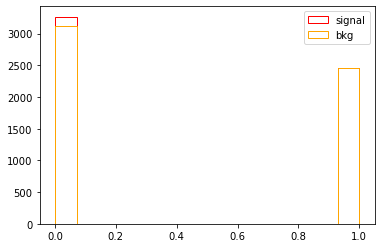

1000GeV
lepton1_charge


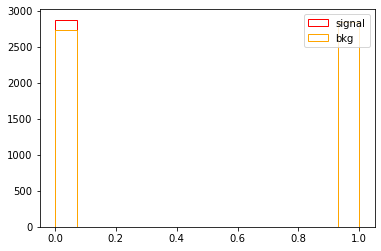

1000GeV
lepton2_charge


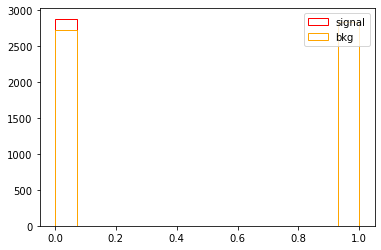

1000GeV
lepton3_charge


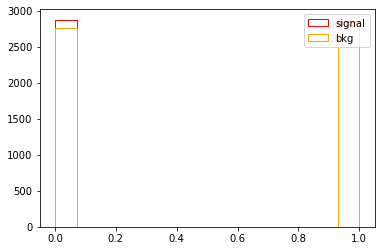

1000GeV
visible_pt


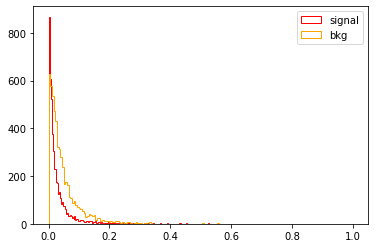

1000GeV
transverse_mass


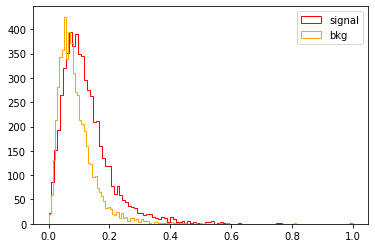

1000GeV
dilep_mass


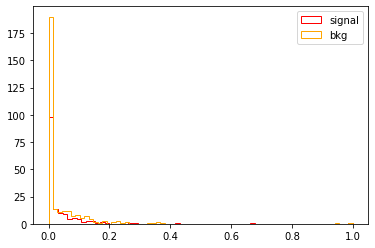

1000GeV
dilep_DR


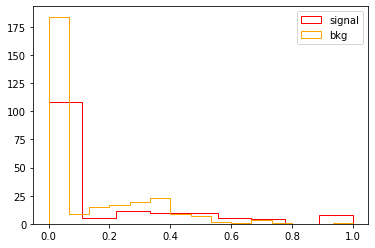

1000GeV
signal


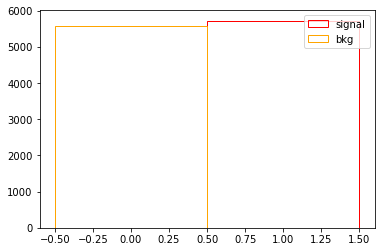

In [23]:
SignalPlotLoop(df_norm_sig, df_norm_bkg)

In [24]:
#using 80% of the (signal + bkg) data for training and the rest for test
#n_sig = [int(7138*80/100),int(7413*80/100),int(7695*80/100),int(7919*80/100),int(8279*80/100)]
#n_bkg = int(31979*80/100)
n_sig = [int(5698*80/100),int(5698*80/100),int(5786*80/100),int(5717*80/100),int(5725*80/100)]
n_bkg = int(5571*80/100)
#n_sig = [int(n_sig_scaled[0]*9999*80/100),int(n_sig_scaled[1]*10000*80/100),int(n_sig_scaled[2]*9998*80/100),int(n_sig_scaled[3]*10000*80/100),int(n_sig_scaled[4]*9999*80/100)]
#n_bkg = int(n_bkg_scaled*80473*80/100)

In [25]:
df_train_500, df_test_500, x_train_500, y_train_500, x_test_500, y_test_500 = DefineTrainTest(df_norm_sig[0], df_norm_bkg, n_sig[0])
df_train_600, df_test_600, x_train_600, y_train_600, x_test_600, y_test_600 = DefineTrainTest(df_norm_sig[1], df_norm_bkg, n_sig[1])
df_train_700, df_test_700, x_train_700, y_train_700, x_test_700, y_test_700 = DefineTrainTest(df_norm_sig[2], df_norm_bkg, n_sig[2])
df_train_800, df_test_800, x_train_800, y_train_800, x_test_800, y_test_800 = DefineTrainTest(df_norm_sig[3], df_norm_bkg, n_sig[3])
df_train_1000, df_test_1000, x_train_1000, y_train_1000, x_test_1000, y_test_1000 = DefineTrainTest(df_norm_sig[4], df_norm_bkg, n_sig[4])

In [26]:
df_train = [df_train_500,df_train_600,df_train_700,df_train_800,df_train_1000]
df_test = [df_test_500,df_test_600,df_test_700,df_test_800,df_test_1000]
x_train = [x_train_500,x_train_600,x_train_700,x_train_800,x_train_1000]
y_train = [y_train_500,y_train_600,y_train_700,y_train_800,y_train_1000]
x_test = [x_test_500,x_test_600,x_test_700,x_test_800,x_test_1000]
y_test = [y_test_500,y_test_600,y_test_700,y_test_800,y_test_1000]

500GeV
lepton1_pt


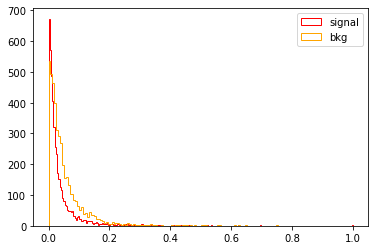

500GeV
lepton2_pt


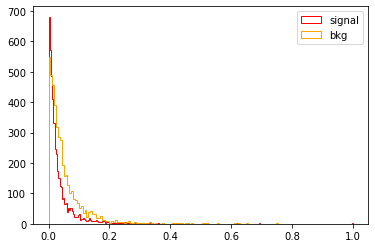

500GeV
lepton3_pt


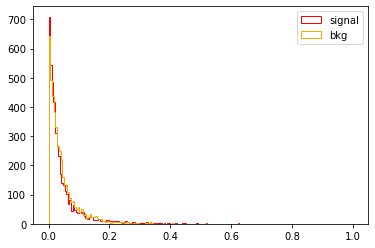

500GeV
lepton1_eta


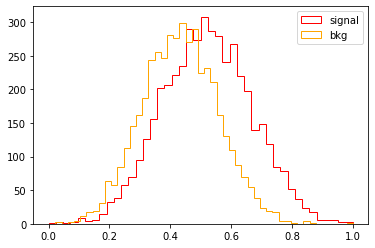

500GeV
lepton2_eta


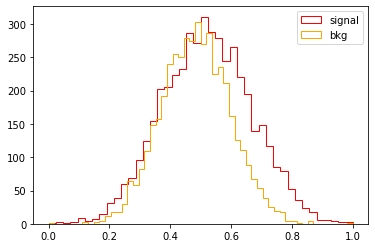

500GeV
lepton3_eta


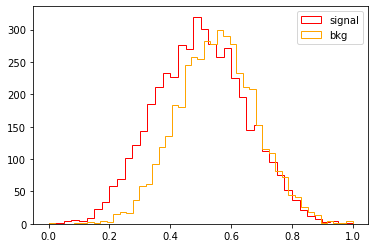

500GeV
lepton1_phi


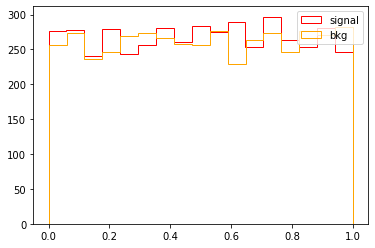

500GeV
lepton2_phi


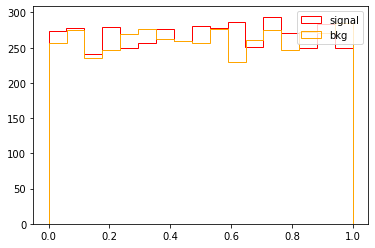

500GeV
lepton3_phi


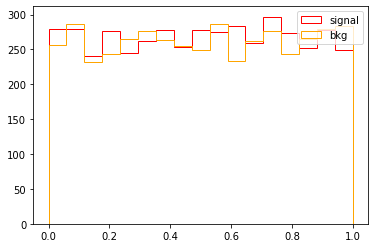

500GeV
MET


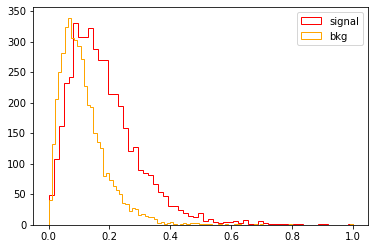

500GeV
MET_phi


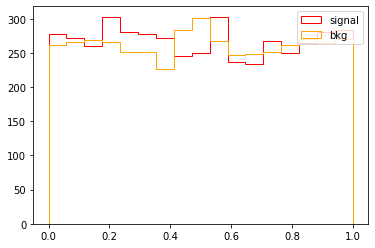

500GeV
lepton1_flavor


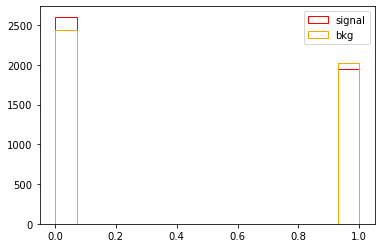

500GeV
lepton2_flavor


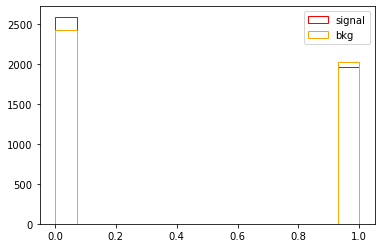

500GeV
lepton3_flavor


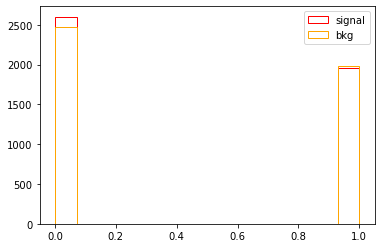

500GeV
lepton1_charge


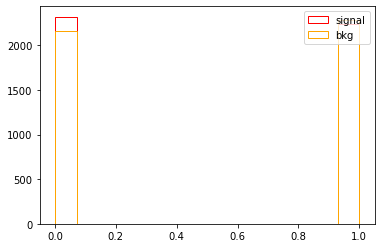

500GeV
lepton2_charge


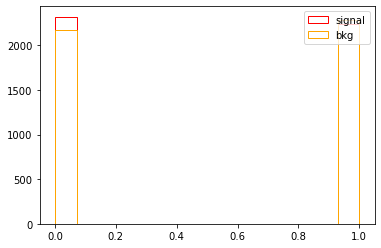

500GeV
lepton3_charge


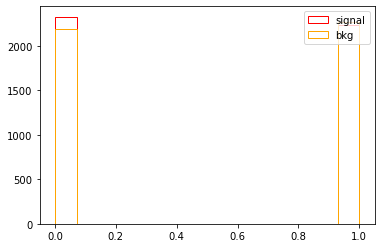

500GeV
visible_pt


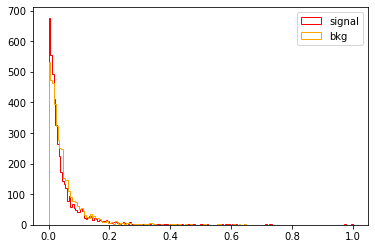

500GeV
transverse_mass


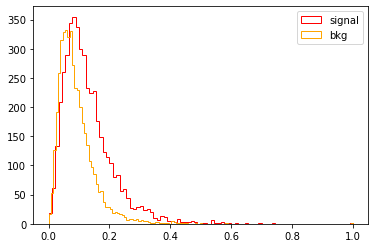

500GeV
dilep_mass


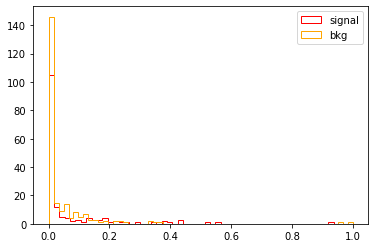

500GeV
dilep_DR


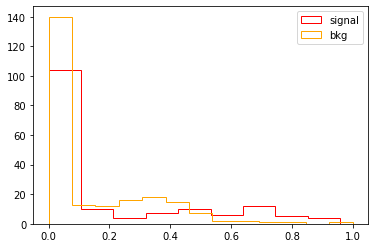

500GeV
signal


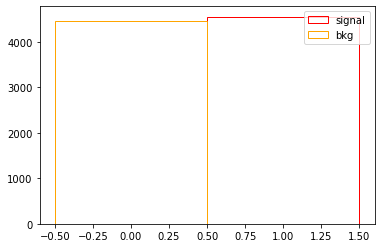

600GeV
lepton1_pt


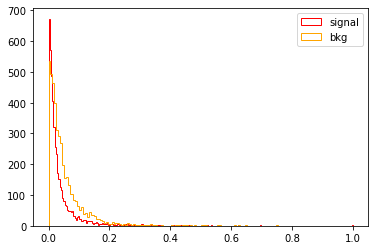

600GeV
lepton2_pt


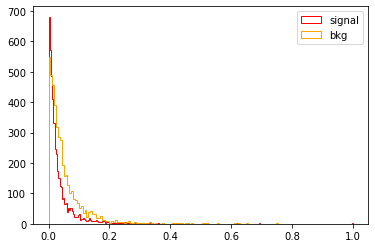

600GeV
lepton3_pt


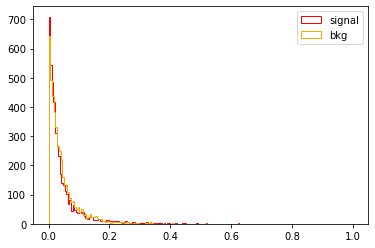

600GeV
lepton1_eta


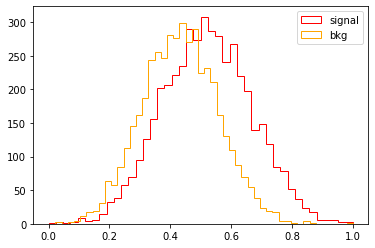

600GeV
lepton2_eta


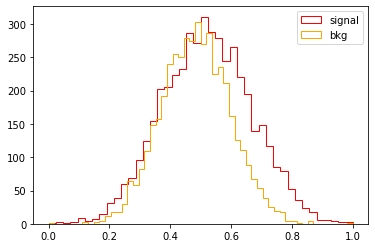

600GeV
lepton3_eta


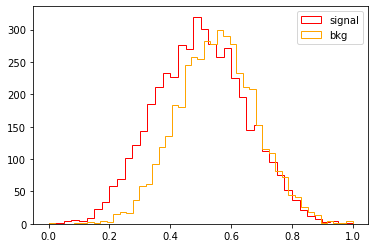

600GeV
lepton1_phi


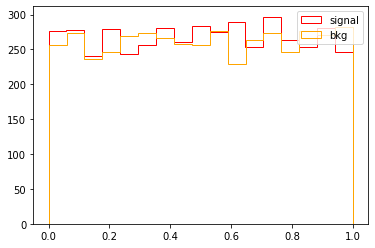

600GeV
lepton2_phi


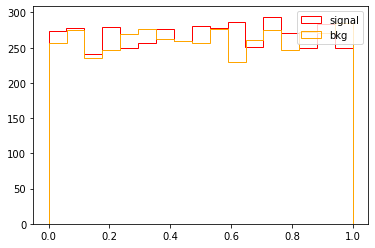

600GeV
lepton3_phi


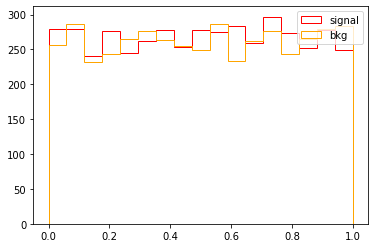

600GeV
MET


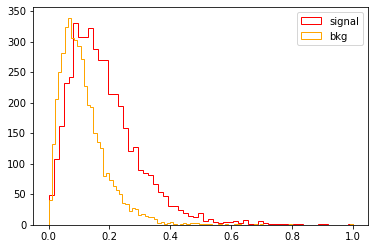

600GeV
MET_phi


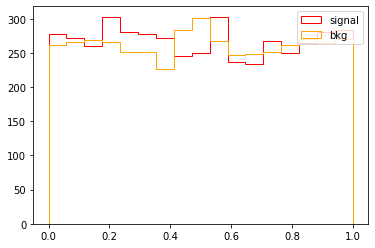

600GeV
lepton1_flavor


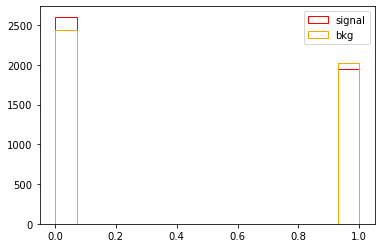

600GeV
lepton2_flavor


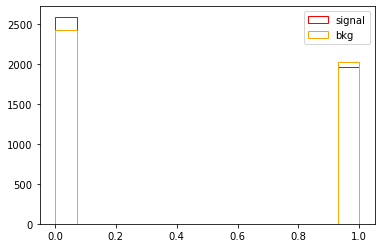

600GeV
lepton3_flavor


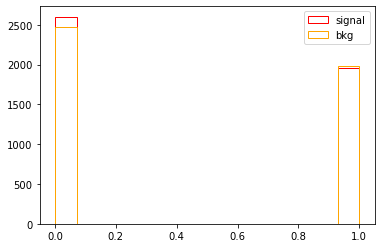

600GeV
lepton1_charge


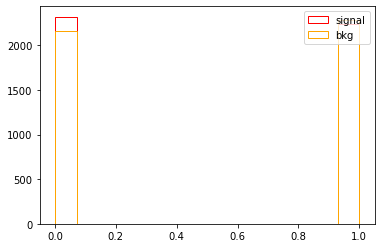

600GeV
lepton2_charge


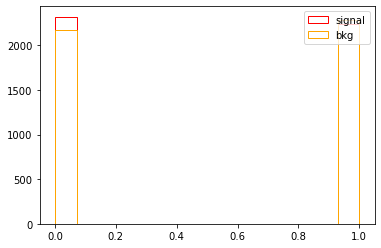

600GeV
lepton3_charge


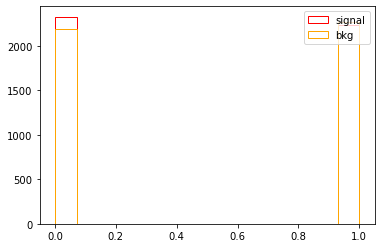

600GeV
visible_pt


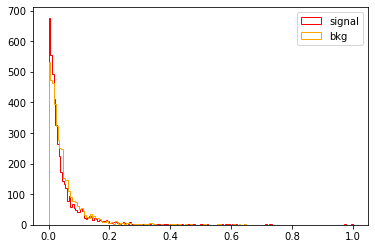

600GeV
transverse_mass


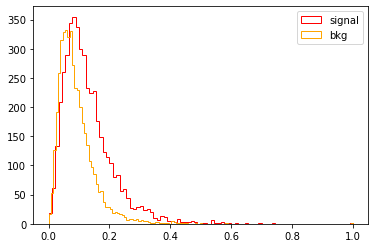

600GeV
dilep_mass


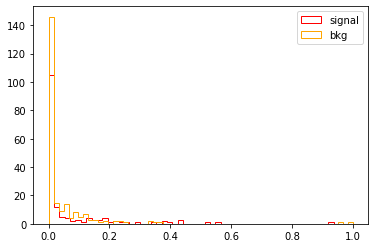

600GeV
dilep_DR


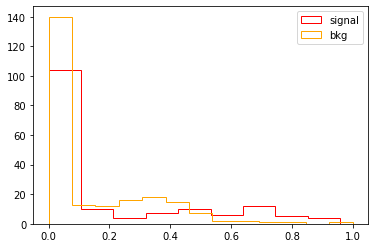

600GeV
signal


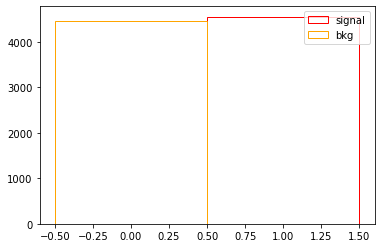

700GeV
lepton1_pt


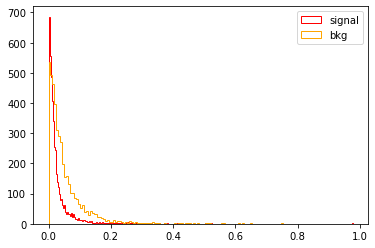

700GeV
lepton2_pt


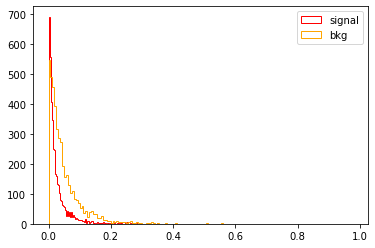

700GeV
lepton3_pt


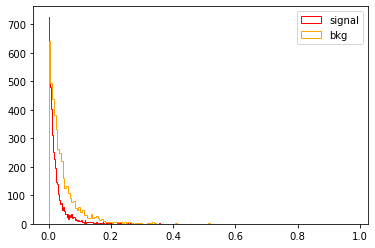

700GeV
lepton1_eta


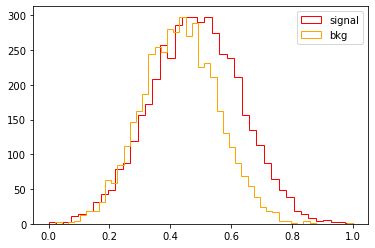

700GeV
lepton2_eta


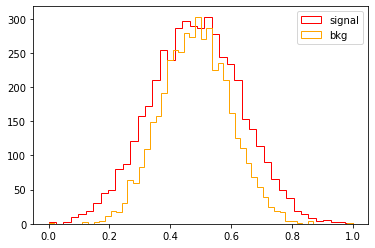

700GeV
lepton3_eta


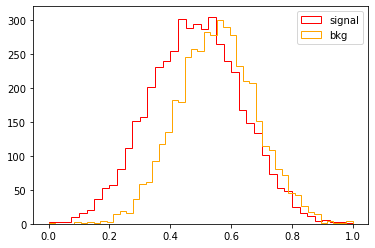

700GeV
lepton1_phi


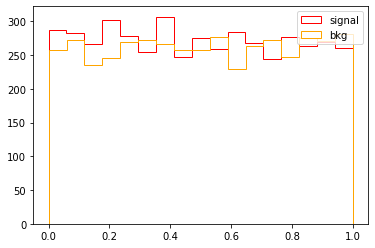

700GeV
lepton2_phi


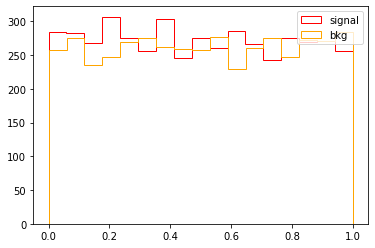

700GeV
lepton3_phi


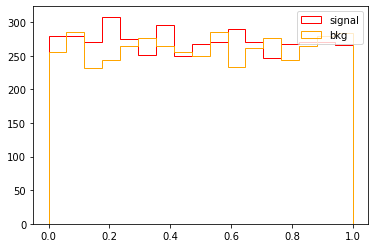

700GeV
MET


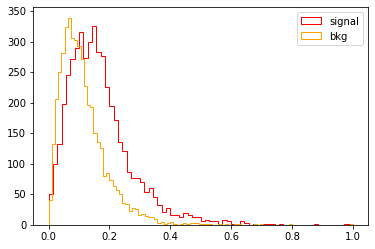

700GeV
MET_phi


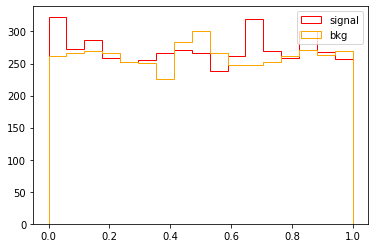

700GeV
lepton1_flavor


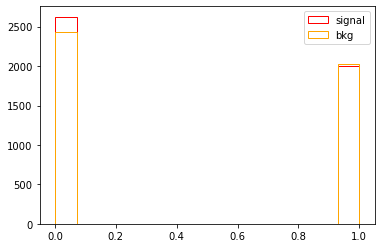

700GeV
lepton2_flavor


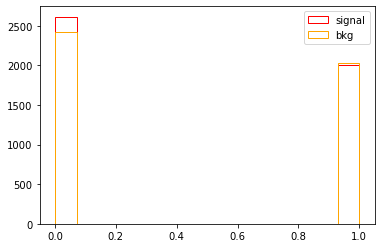

700GeV
lepton3_flavor


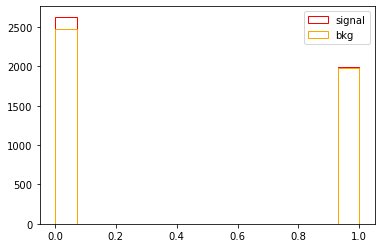

700GeV
lepton1_charge


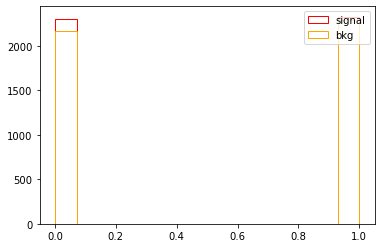

700GeV
lepton2_charge


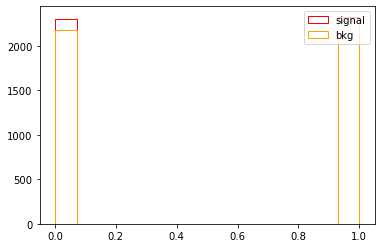

700GeV
lepton3_charge


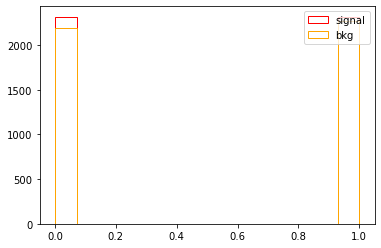

700GeV
visible_pt


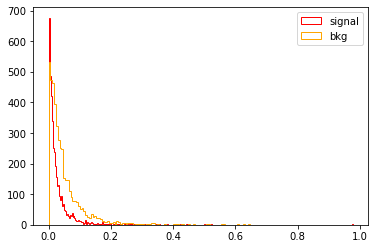

700GeV
transverse_mass


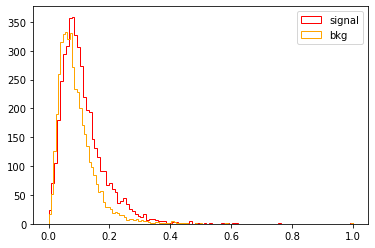

700GeV
dilep_mass


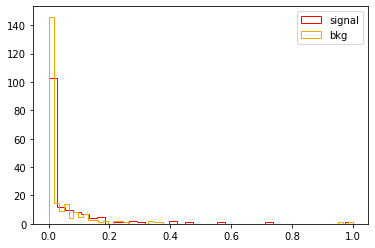

700GeV
dilep_DR


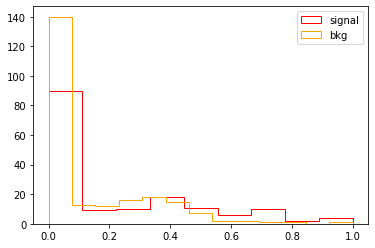

700GeV
signal


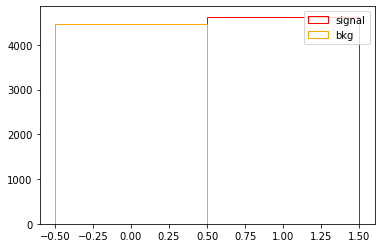

800GeV
lepton1_pt


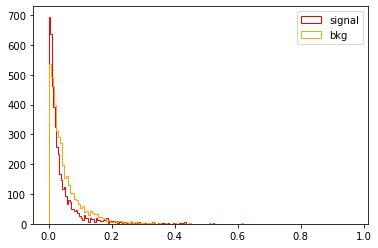

800GeV
lepton2_pt


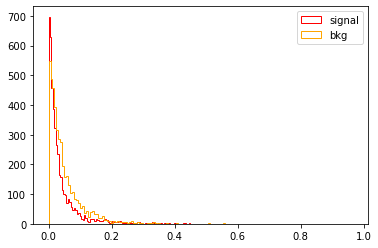

800GeV
lepton3_pt


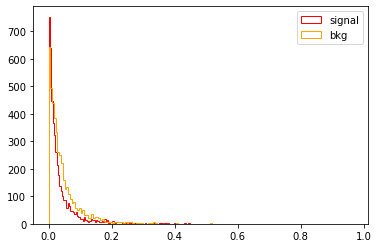

800GeV
lepton1_eta


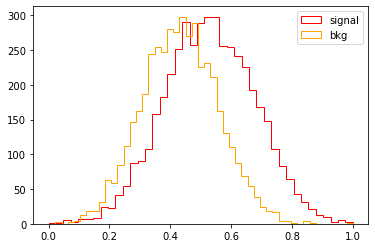

800GeV
lepton2_eta


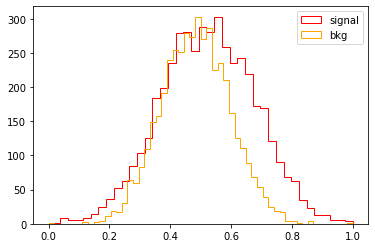

800GeV
lepton3_eta


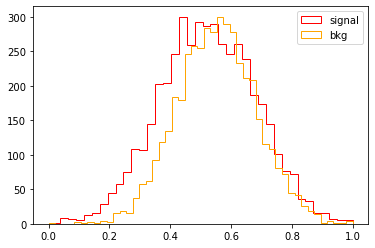

800GeV
lepton1_phi


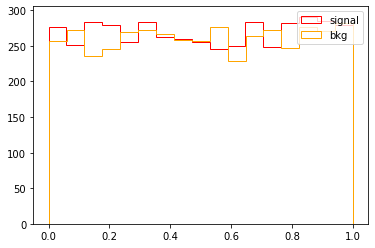

800GeV
lepton2_phi


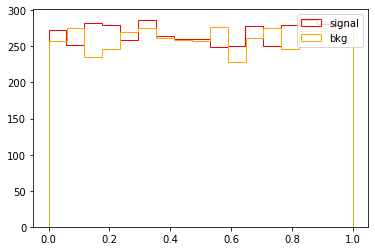

800GeV
lepton3_phi


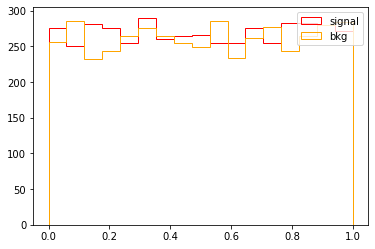

800GeV
MET


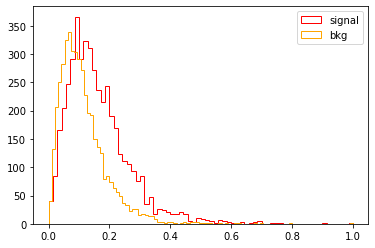

800GeV
MET_phi


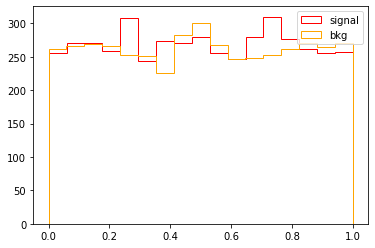

800GeV
lepton1_flavor


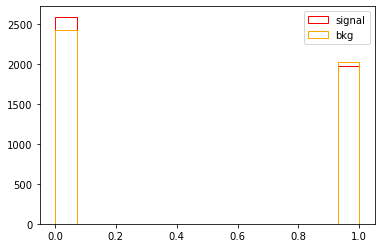

800GeV
lepton2_flavor


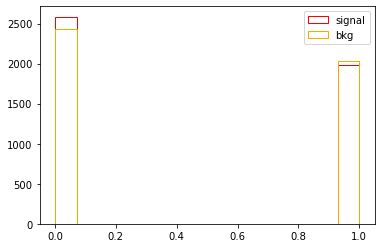

800GeV
lepton3_flavor


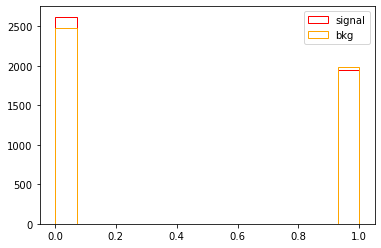

800GeV
lepton1_charge


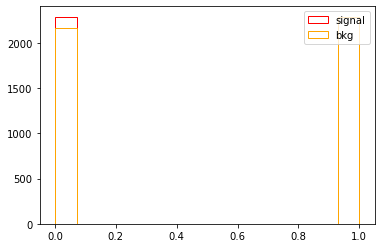

800GeV
lepton2_charge


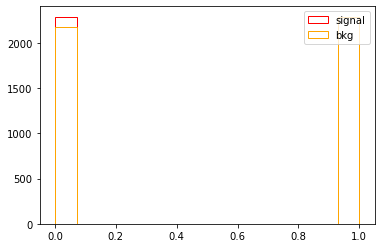

800GeV
lepton3_charge


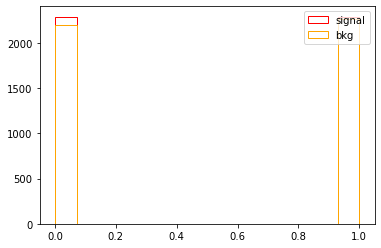

800GeV
visible_pt


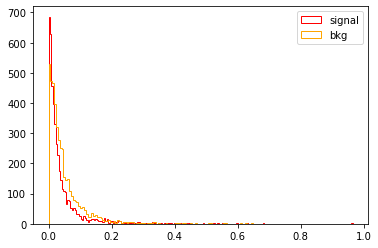

800GeV
transverse_mass


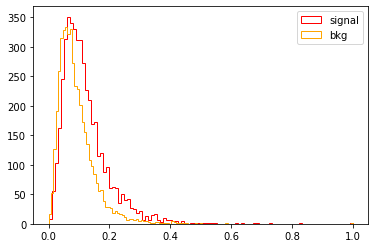

800GeV
dilep_mass


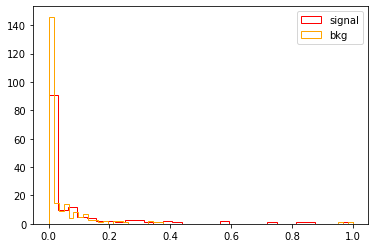

800GeV
dilep_DR


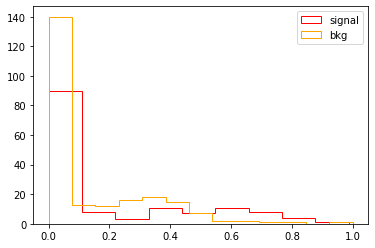

800GeV
signal


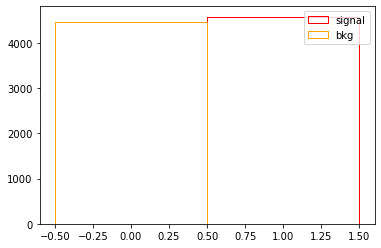

1000GeV
lepton1_pt


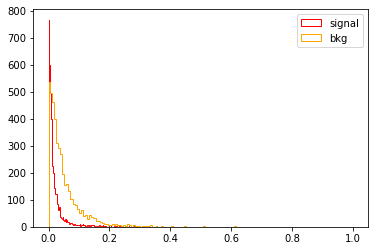

1000GeV
lepton2_pt


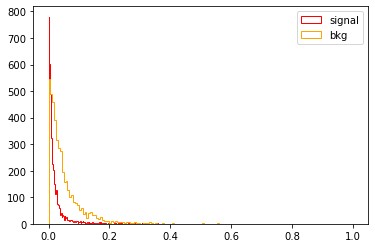

1000GeV
lepton3_pt


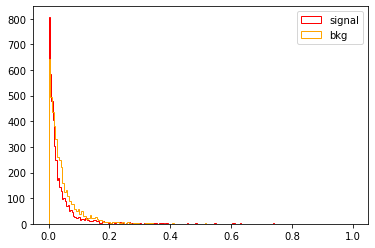

1000GeV
lepton1_eta


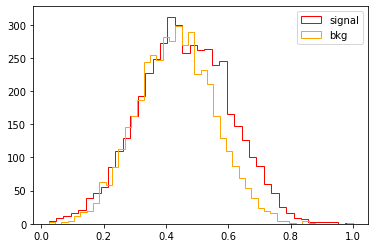

1000GeV
lepton2_eta


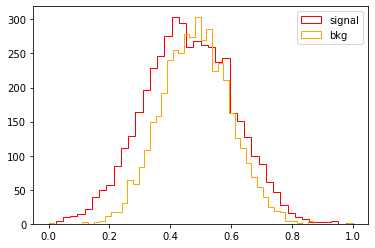

1000GeV
lepton3_eta


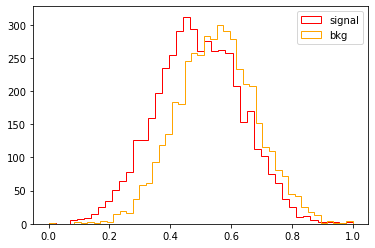

1000GeV
lepton1_phi


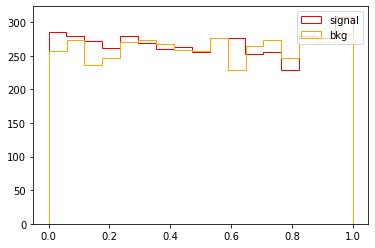

1000GeV
lepton2_phi


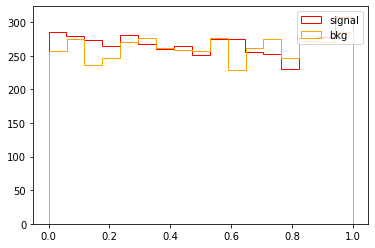

1000GeV
lepton3_phi


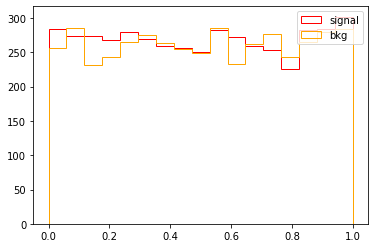

1000GeV
MET


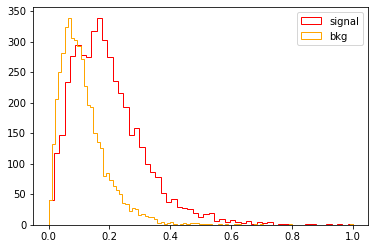

1000GeV
MET_phi


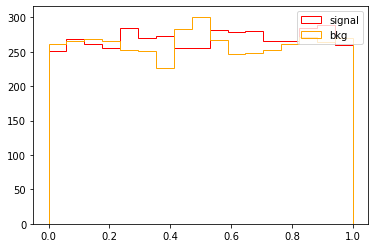

1000GeV
lepton1_flavor


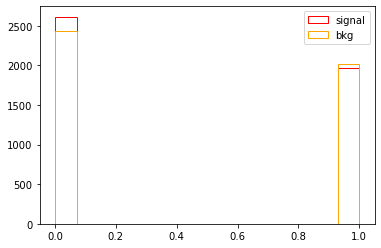

1000GeV
lepton2_flavor


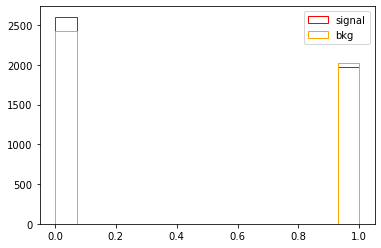

1000GeV
lepton3_flavor


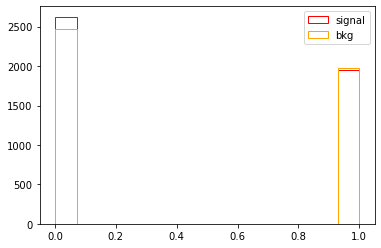

1000GeV
lepton1_charge


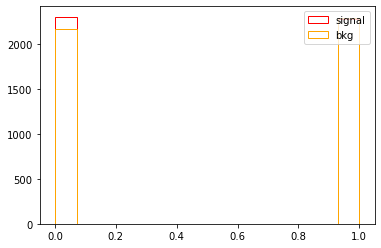

1000GeV
lepton2_charge


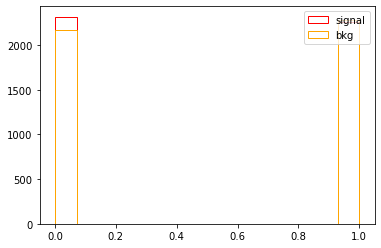

1000GeV
lepton3_charge


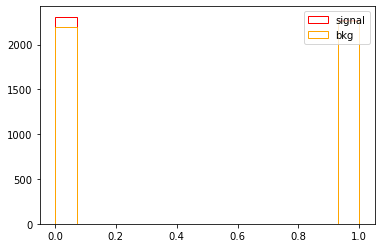

1000GeV
visible_pt


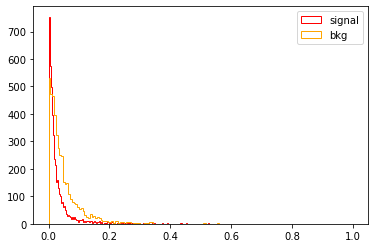

1000GeV
transverse_mass


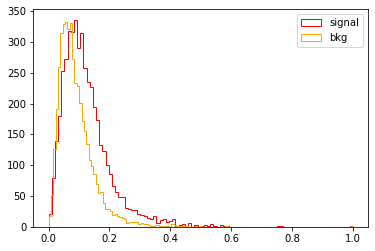

1000GeV
dilep_mass


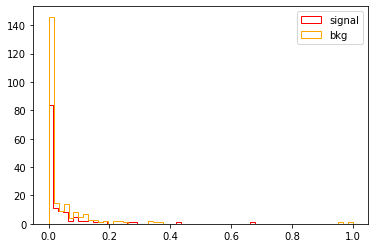

1000GeV
dilep_DR


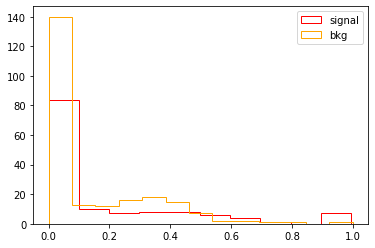

1000GeV
signal


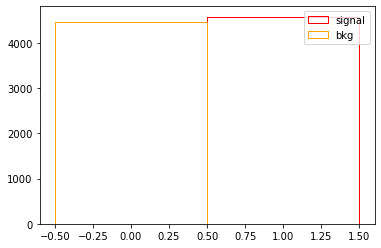

In [27]:
#Plot 80% of new df_train set
for sig in range(len(df_train)):
    for var in df_train[sig].columns:
        print (mass_points[sig])
        print (var)
        plt.figure()
        plt.hist(df_norm_sig[sig].iloc[:n_sig[sig]][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
        plt.hist(df_norm_bkg.iloc[:n_bkg][var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
        plt.legend(loc='upper right')
        plt.show()

500GeV
lepton1_pt


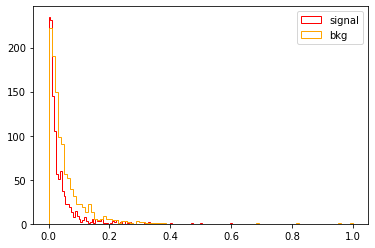

500GeV
lepton2_pt


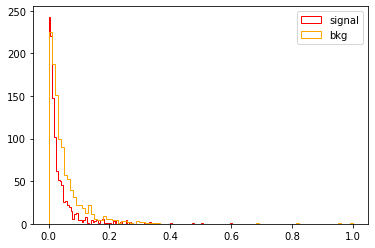

500GeV
lepton3_pt


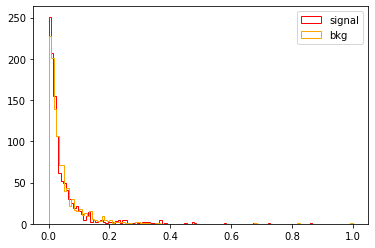

500GeV
lepton1_eta


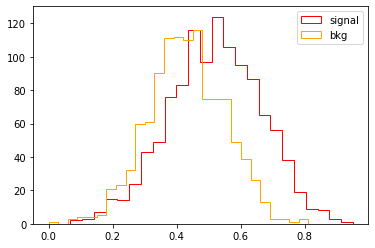

500GeV
lepton2_eta


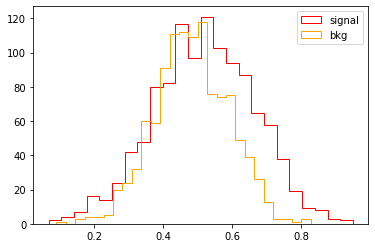

500GeV
lepton3_eta


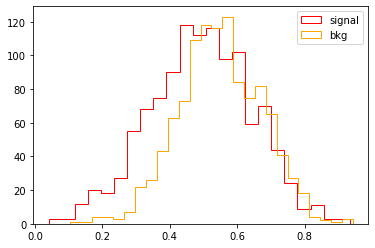

500GeV
lepton1_phi


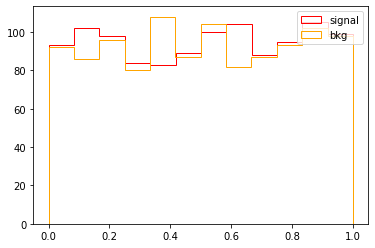

500GeV
lepton2_phi


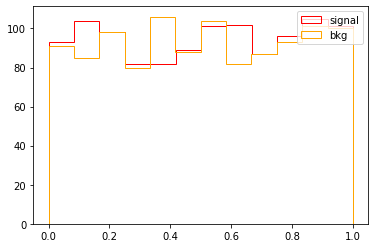

500GeV
lepton3_phi


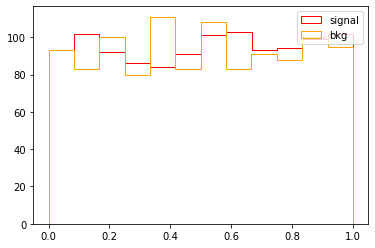

500GeV
MET


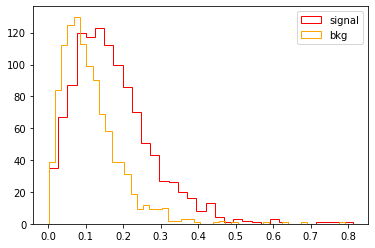

500GeV
MET_phi


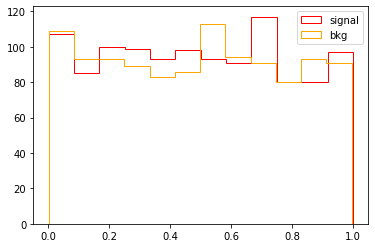

500GeV
lepton1_flavor


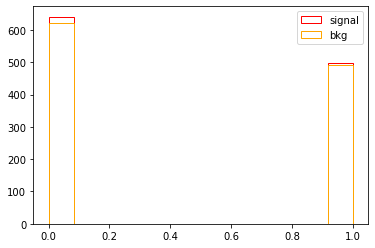

500GeV
lepton2_flavor


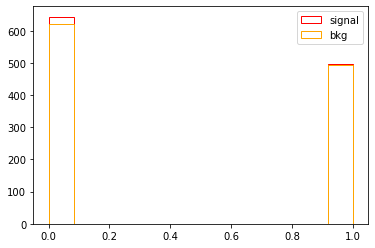

500GeV
lepton3_flavor


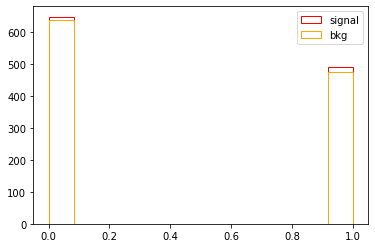

500GeV
lepton1_charge


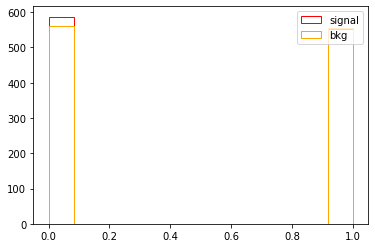

500GeV
lepton2_charge


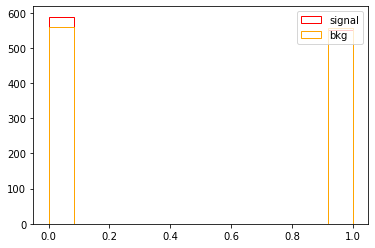

500GeV
lepton3_charge


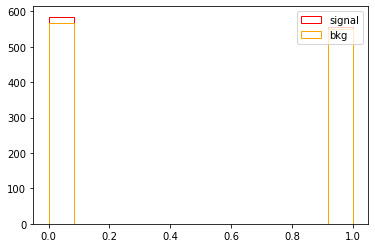

500GeV
visible_pt


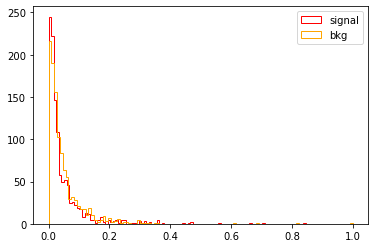

500GeV
transverse_mass


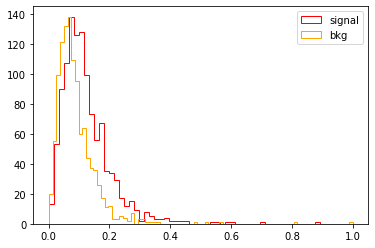

500GeV
dilep_mass


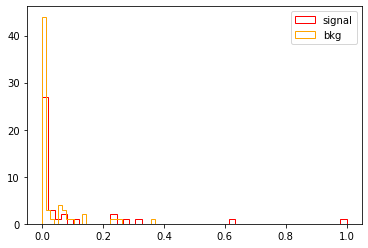

500GeV
dilep_DR


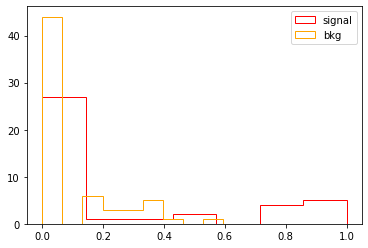

500GeV
signal


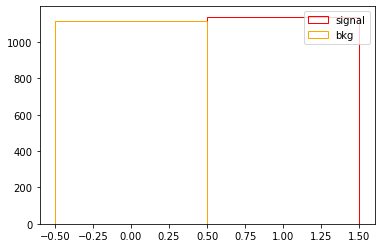

600GeV
lepton1_pt


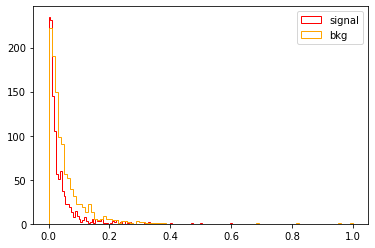

600GeV
lepton2_pt


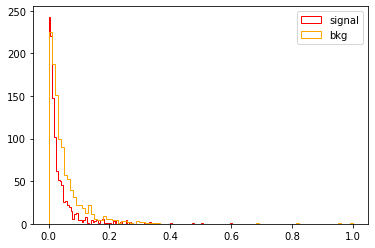

600GeV
lepton3_pt


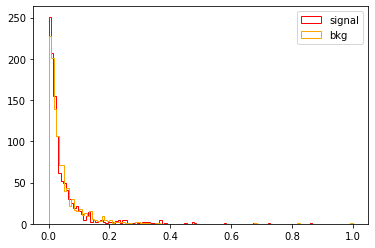

600GeV
lepton1_eta


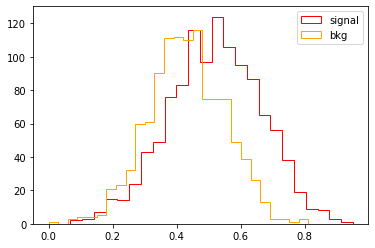

600GeV
lepton2_eta


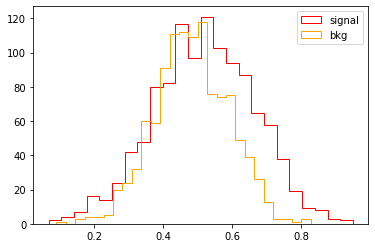

600GeV
lepton3_eta


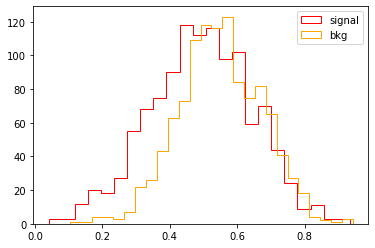

600GeV
lepton1_phi


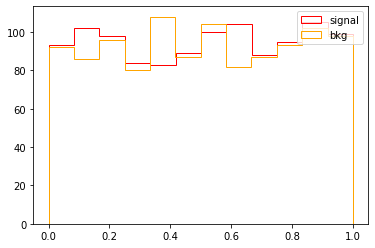

600GeV
lepton2_phi


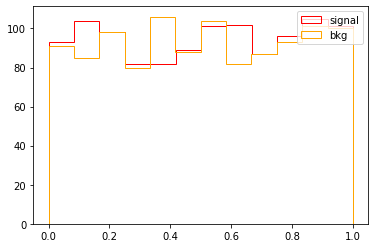

600GeV
lepton3_phi


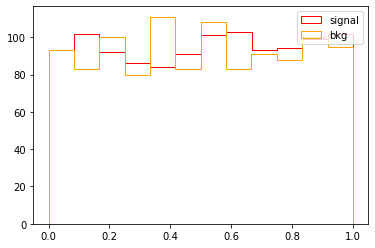

600GeV
MET


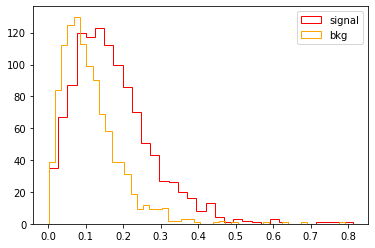

600GeV
MET_phi


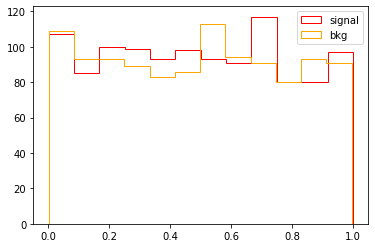

600GeV
lepton1_flavor


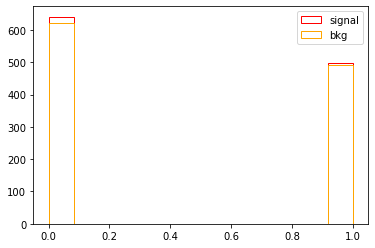

600GeV
lepton2_flavor


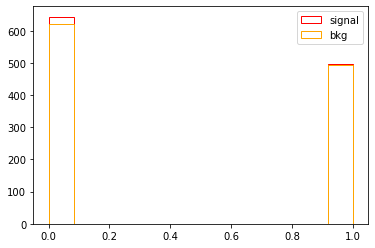

600GeV
lepton3_flavor


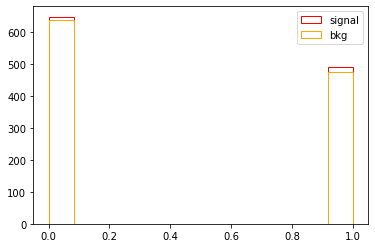

600GeV
lepton1_charge


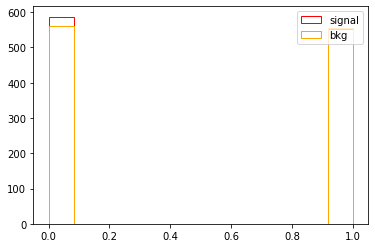

600GeV
lepton2_charge


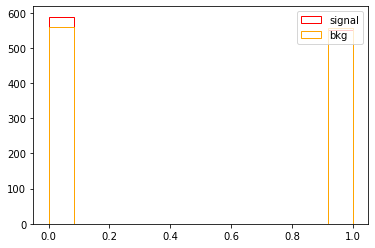

600GeV
lepton3_charge


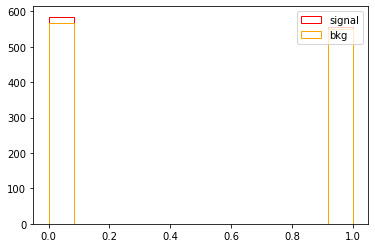

600GeV
visible_pt


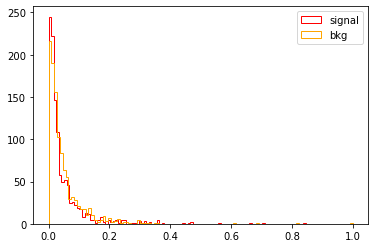

600GeV
transverse_mass


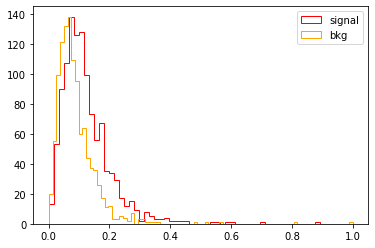

600GeV
dilep_mass


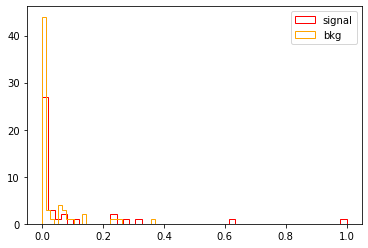

600GeV
dilep_DR


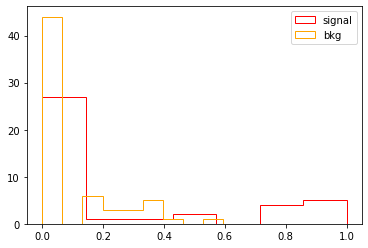

600GeV
signal


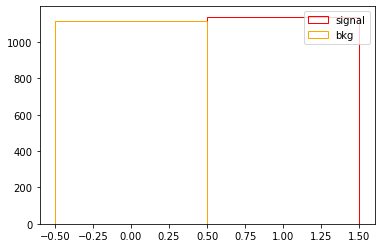

700GeV
lepton1_pt


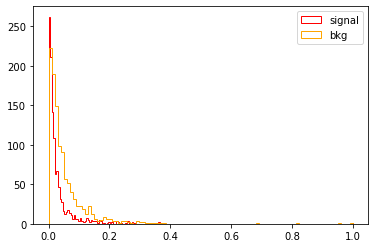

700GeV
lepton2_pt


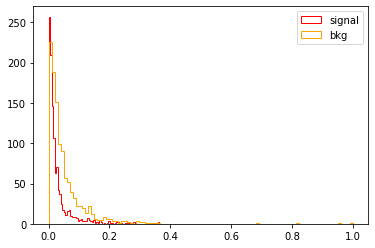

700GeV
lepton3_pt


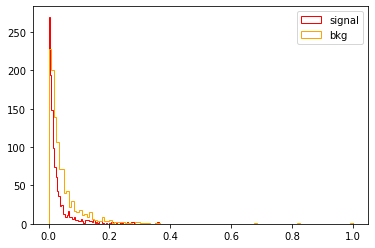

700GeV
lepton1_eta


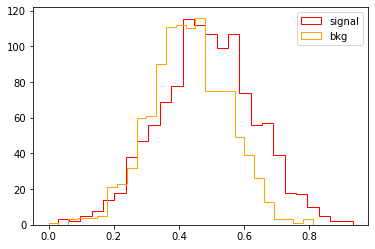

700GeV
lepton2_eta


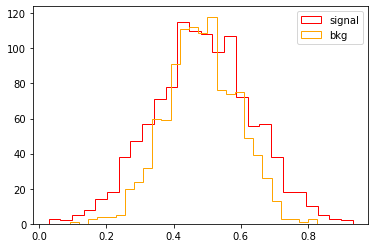

700GeV
lepton3_eta


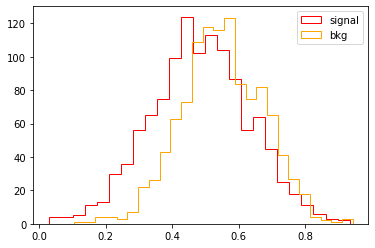

700GeV
lepton1_phi


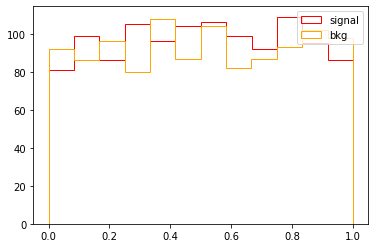

700GeV
lepton2_phi


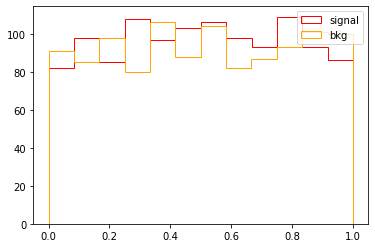

700GeV
lepton3_phi


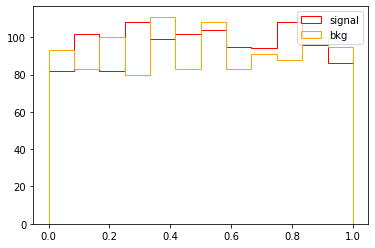

700GeV
MET


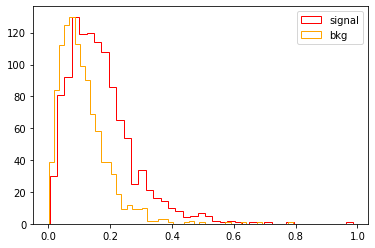

700GeV
MET_phi


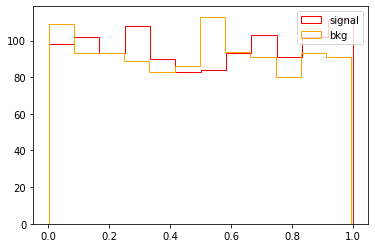

700GeV
lepton1_flavor


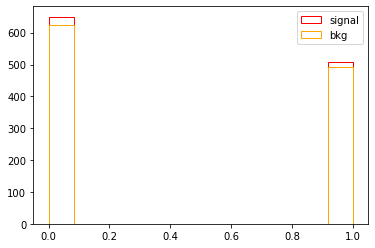

700GeV
lepton2_flavor


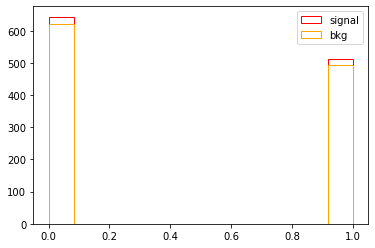

700GeV
lepton3_flavor


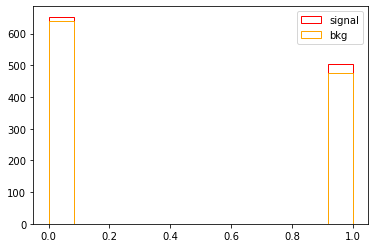

700GeV
lepton1_charge


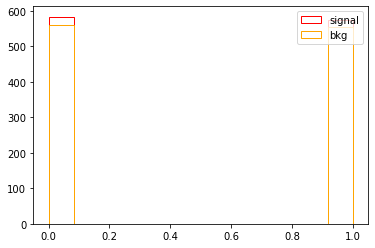

700GeV
lepton2_charge


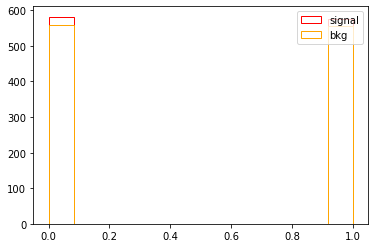

700GeV
lepton3_charge


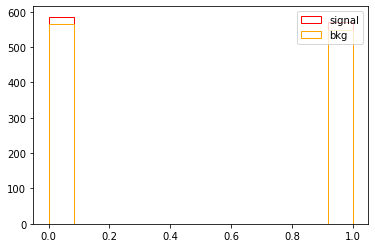

700GeV
visible_pt


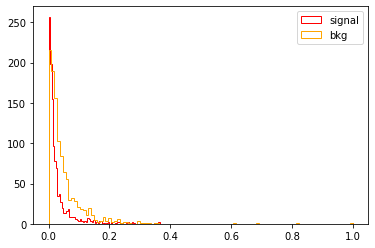

700GeV
transverse_mass


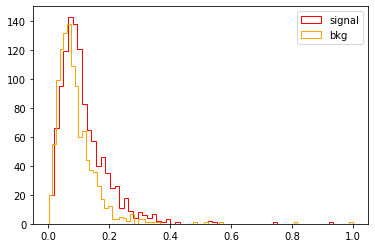

700GeV
dilep_mass


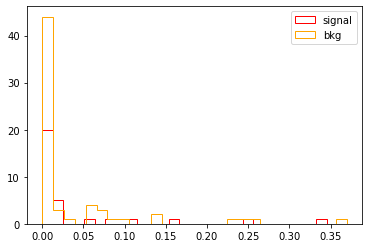

700GeV
dilep_DR


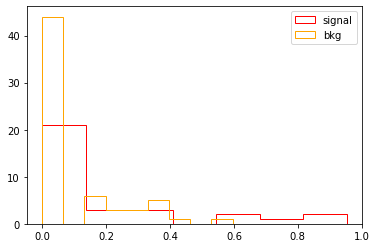

700GeV
signal


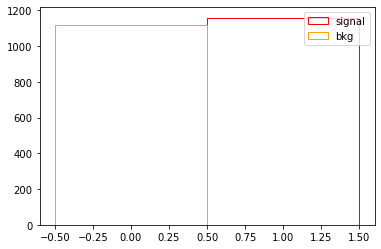

800GeV
lepton1_pt


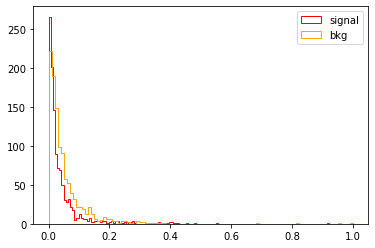

800GeV
lepton2_pt


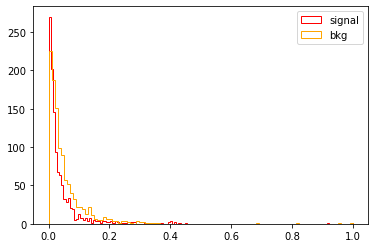

800GeV
lepton3_pt


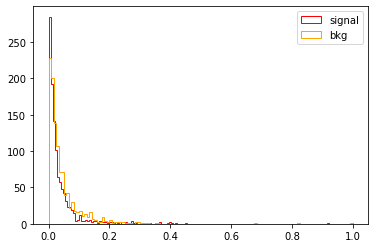

800GeV
lepton1_eta


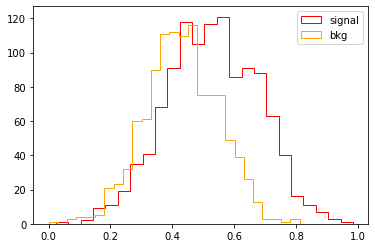

800GeV
lepton2_eta


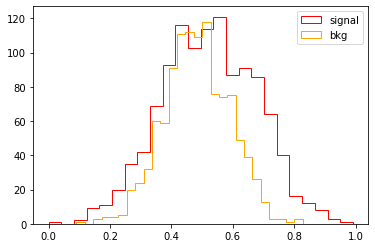

800GeV
lepton3_eta


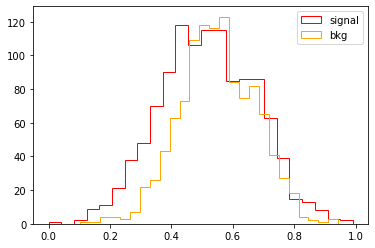

800GeV
lepton1_phi


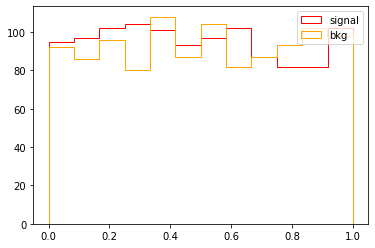

800GeV
lepton2_phi


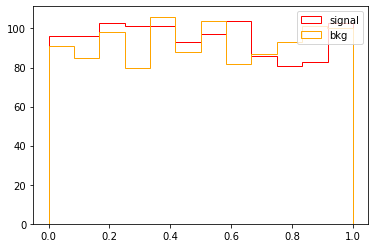

800GeV
lepton3_phi


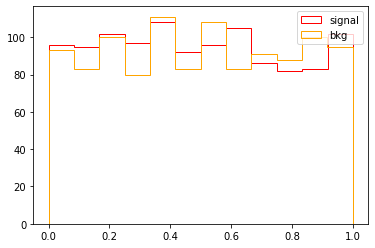

800GeV
MET


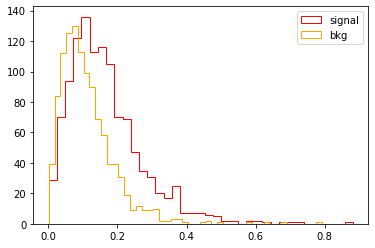

800GeV
MET_phi


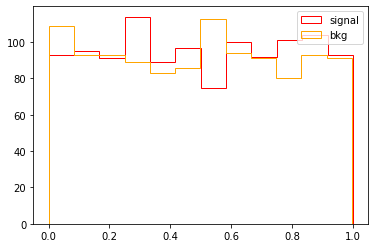

800GeV
lepton1_flavor


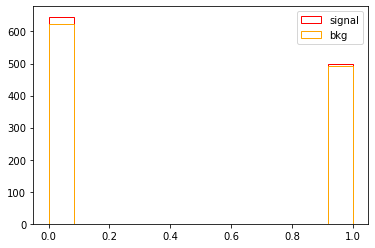

800GeV
lepton2_flavor


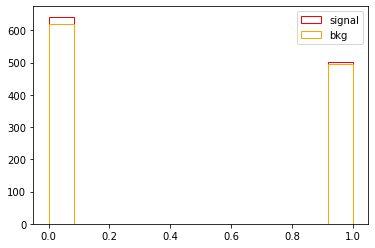

800GeV
lepton3_flavor


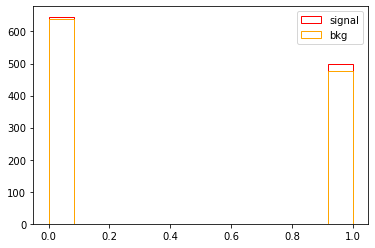

800GeV
lepton1_charge


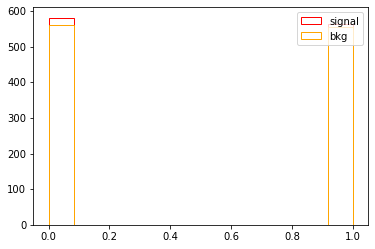

800GeV
lepton2_charge


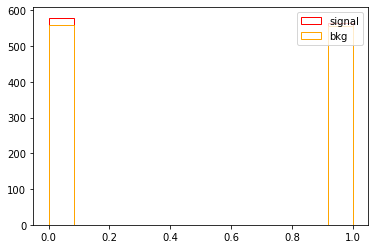

800GeV
lepton3_charge


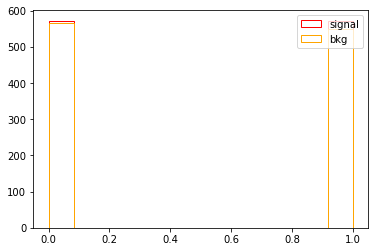

800GeV
visible_pt


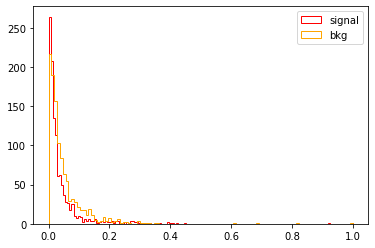

800GeV
transverse_mass


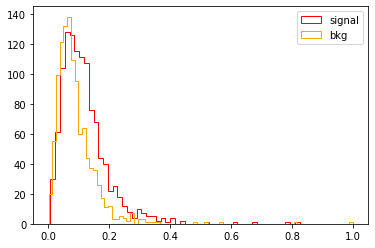

800GeV
dilep_mass


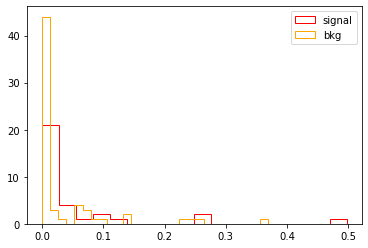

800GeV
dilep_DR


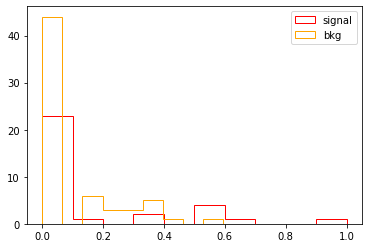

800GeV
signal


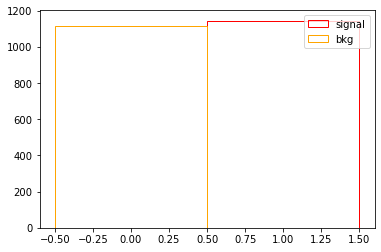

1000GeV
lepton1_pt


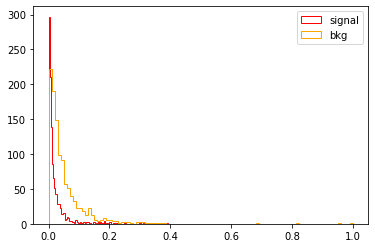

1000GeV
lepton2_pt


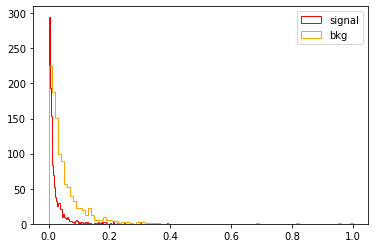

1000GeV
lepton3_pt


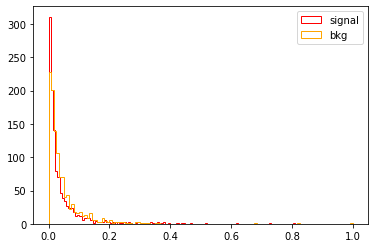

1000GeV
lepton1_eta


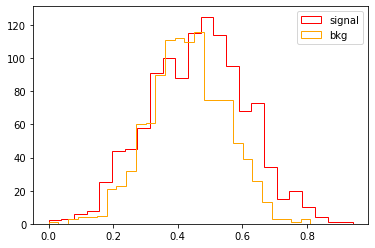

1000GeV
lepton2_eta


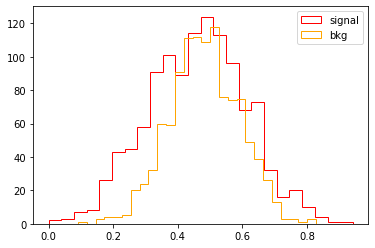

1000GeV
lepton3_eta


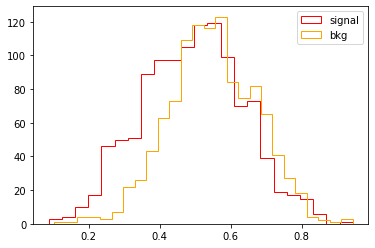

1000GeV
lepton1_phi


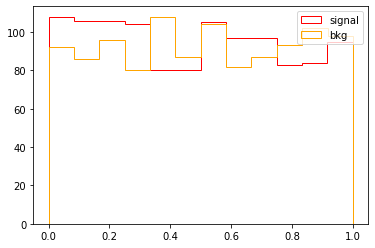

1000GeV
lepton2_phi


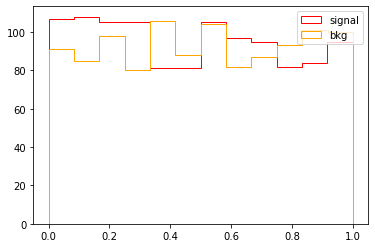

1000GeV
lepton3_phi


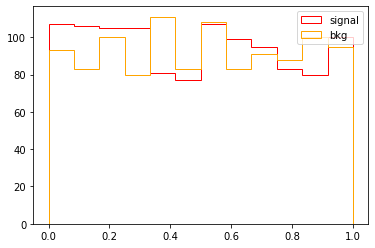

1000GeV
MET


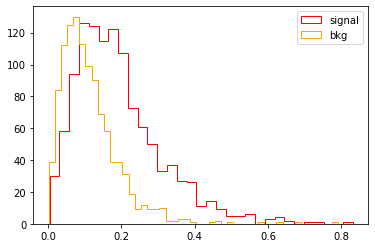

1000GeV
MET_phi


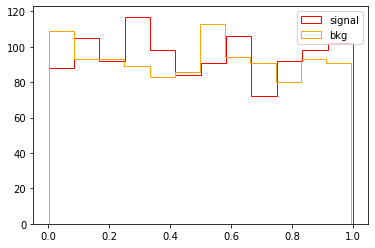

1000GeV
lepton1_flavor


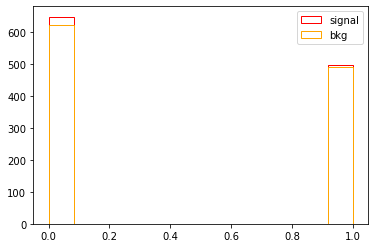

1000GeV
lepton2_flavor


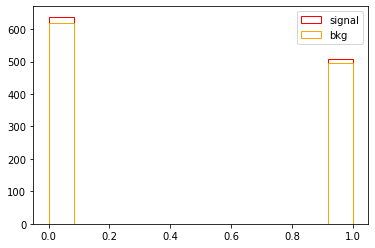

1000GeV
lepton3_flavor


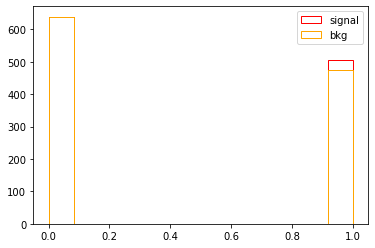

1000GeV
lepton1_charge


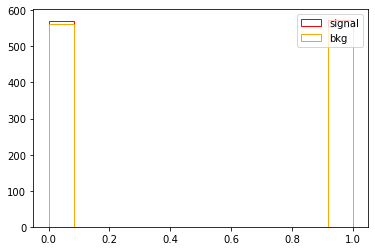

1000GeV
lepton2_charge


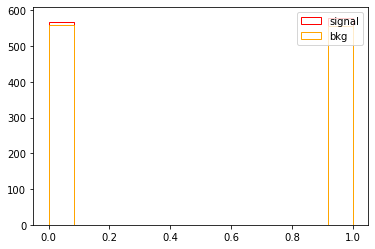

1000GeV
lepton3_charge


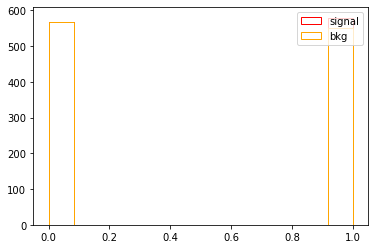

1000GeV
visible_pt


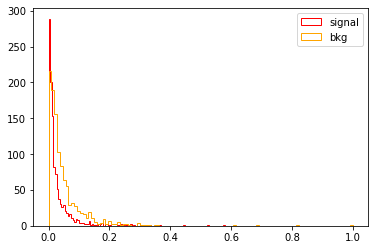

1000GeV
transverse_mass


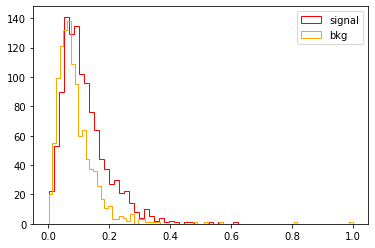

1000GeV
dilep_mass


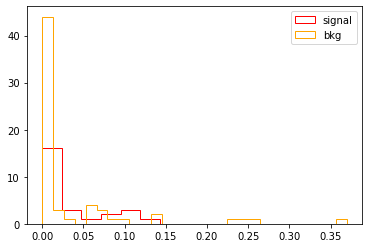

1000GeV
dilep_DR


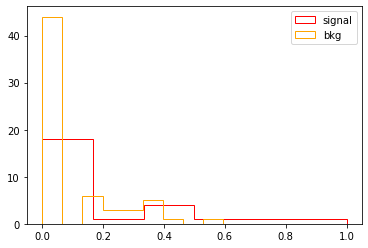

1000GeV
signal


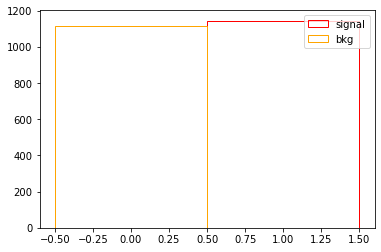

In [28]:
#Plot other 20% of df_train set
for sig in range(len(df_train)):
    for var in df_train[sig].columns:
        print (mass_points[sig])
        print (var)
        plt.figure()
        plt.hist(df_norm_sig[sig].iloc[n_sig[sig]:][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
        plt.hist(df_norm_bkg.iloc[n_bkg:][var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
        plt.legend(loc='upper right')
        plt.show()

In [29]:
for sig in range(len(x_train)):
    print (mass_points[sig])
    print (np.shape(x_train[sig]))
    print (np.shape(y_test[sig]))

500GeV
(9014, 17)
(2255,)
600GeV
(9014, 17)
(2255,)
700GeV
(9084, 17)
(2273,)
800GeV
(9029, 17)
(2259,)
1000GeV
(9036, 17)
(2260,)


In [30]:
x_train[0]

lepton1_pt  lepton2_pt  lepton3_pt  lepton1_eta  lepton2_eta  \
0       0.033014    0.033014    0.033014     0.529086     0.571924   
1       0.040263    0.040263    0.004726     0.434662     0.434662   
2       0.006674    0.006674    0.009592     0.754488     0.754488   
3       0.021592    0.021592    0.031030     0.823578     0.823578   
4       0.013314    0.013314    0.013314     0.448813     0.498953   
...          ...         ...         ...          ...          ...   
9009    0.060360    0.060360    0.060360     0.535773     0.578003   
9010    0.027123    0.027123    0.038979     0.568554     0.568554   
9011    0.005111    0.005111    0.007345     0.802872     0.802872   
9012    0.015403    0.015403    0.022135     0.601142     0.601142   
9013    0.024693    0.024693    0.024693     0.608111     0.643761   

      lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi       MET   MET_phi  \
0        0.651732     0.550823     0.550823     0.550874  0.010687  0.224117   
1        0.403413     0.415083     0.415083     0.400640  0.171983  0.994322   
2        0.736238     0.248258     0.248258     0.248258  0.161888  0.549781   
3        0.806277     0.003267     0.003267     0.003267  0.369094  0.494870   
4        0.568578     0.306891     0.306891     0.306969  0.135418  0.714461   
...           ...          ...          ...          ...       ...       ...   
9009     0.658659     0.297477     0.297477     0.297556  0.050889  0.671194   
9010     0.547752     0.078925     0.078925     0.078925  0.252960  0.476150   
9011     0.785286     0.475203     0.475203     0.475203  0.084882  0.964329   
9012     0.580787     0.570606     0.570606     0.570606  0.148015  0.104364   
9013     0.733593     0.083213     0.083213     0.083316  0.242043  0.722518   

      lepton1_flavor  lepton2_flavor  lepton3_flavor  lepton1_charge  \
0                0.0             0.0             0.0             1.0   
1                0.0             0.0             1.0             0.0   
2                0.0             0.0             0.0             1.0   
3                1.0             1.0             1.0             1.0   
4                0.0             0.0             0.0             0.0   
...              ...             ...             ...             ...   
9009             0.0             0.0             0.0             1.0   
9010             1.0             1.0             1.0             1.0   
9011             0.0             0.0             0.0             0.0   
9012             1.0             1.0             1.0             1.0   
9013             0.0             0.0             0.0             1.0   

      lepton2_charge  lepton3_charge  
0                1.0             1.0  
1                0.0             1.0  
2                1.0             1.0  
3                1.0             1.0  
4                0.0             0.0  
...              ...             ...  
9009             1.0             1.0  
9010             1.0             1.0  
9011             0.0             0.0  
9012             1.0             1.0  
9013             1.0             1.0  

[9014 rows x 17 columns]

In [31]:
x_train[1]

lepton1_pt  lepton2_pt  lepton3_pt  lepton1_eta  lepton2_eta  \
0       0.023275    0.023275    0.023275     0.278082     0.343753   
1       0.035589    0.035589    0.035589     0.373084     0.430113   
2       0.040062    0.040062    0.010005     0.346222     0.346222   
3       0.015593    0.000204    0.000204     0.685089     0.733594   
4       0.055672    0.055672    0.080007     0.628470     0.628470   
...          ...         ...         ...          ...          ...   
9009    0.015244    0.015244    0.015244     0.261028     0.328250   
9010    0.018898    0.018898    0.018898     0.633578     0.666911   
9011    0.017183    0.017183    0.024693     0.442747     0.442747   
9012    0.216839    0.216839    0.056219     0.240539     0.309625   
9013    0.041801    0.041801    0.041801     0.418760     0.471634   

      lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi       MET   MET_phi  \
0        0.391721     0.655532     0.655532     0.655571  0.089766  0.273933   
1        0.490132     0.809210     0.809210     0.809232  0.052967  0.075980   
2        0.521304     0.414583     0.414583     0.446301  0.170703  0.258648   
3        0.835961     0.047797     0.973302     0.973305  0.183076  0.051615   
4        0.608490     0.167452     0.167452     0.167452  0.149013  0.582647   
...           ...          ...          ...          ...       ...       ...   
9009     0.374055     0.181858     0.181858     0.181950  0.051061  0.758204   
9010     0.759973     0.074353     0.074353     0.074457  0.088317  0.803507   
9011     0.420218     0.001188     0.001188     0.001188  0.100267  0.728856   
9012     0.383571     0.517305     0.517305     0.543214  0.072419  0.163521   
9013     0.537447     0.047410     0.047410     0.047517  0.109933  0.662967   

      lepton1_flavor  lepton2_flavor  lepton3_flavor  lepton1_charge  \
0                0.0             0.0             0.0             0.0   
1                1.0             1.0             1.0             0.0   
2                0.0             0.0             0.0             0.0   
3                1.0             0.0             0.0             0.0   
4                0.0             0.0             0.0             1.0   
...              ...             ...             ...             ...   
9009             0.0             0.0             0.0             1.0   
9010             1.0             1.0             1.0             0.0   
9011             0.0             0.0             0.0             1.0   
9012             1.0             1.0             1.0             0.0   
9013             1.0             1.0             1.0             0.0   

      lepton2_charge  lepton3_charge  
0                0.0             0.0  
1                0.0             0.0  
2                0.0             0.0  
3                0.0             0.0  
4                1.0             1.0  
...              ...             ...  
9009             1.0             1.0  
9010             0.0             0.0  
9011             1.0             1.0  
9012             0.0             0.0  
9013             0.0             0.0  

[9014 rows x 17 columns]

In [32]:
x_train[2]

lepton1_pt  lepton2_pt  lepton3_pt  lepton1_eta  lepton2_eta  \
0       0.013799    0.013799    0.013799     0.142008     0.220058   
1       0.008559    0.008559    0.008559     0.489084     0.535561   
2       0.011193    0.011193    0.011193     0.348300     0.348300   
3       0.007700    0.007700    0.007700     0.847493     0.847493   
4       0.025037    0.025037    0.025037     0.555193     0.595656   
...          ...         ...         ...          ...          ...   
9079    0.006881    0.006881    0.006881     0.680584     0.680584   
9080    0.002812    0.002812    0.002812     0.429427     0.429427   
9081    0.016214    0.016214    0.016214     0.332784     0.393479   
9082    0.009753    0.009753    0.009753     0.597935     0.634510   
9083    0.004463    0.004463    0.004463     0.186147     0.186147   

      lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi       MET   MET_phi  \
0        0.250765     0.055938     0.055938     0.056044  0.193625  0.610143   
1        0.610294     0.336254     0.336254     0.336328  0.015048  0.081319   
2        0.348300     0.065421     0.065421     0.065421  0.133502  0.987140   
3        0.847493     0.032668     0.032668     0.032668  0.172911  0.475426   
4        0.678776     0.201963     0.201963     0.202053  0.098141  0.945124   
...           ...          ...          ...          ...       ...       ...   
9079     0.680584     0.050573     0.050573     0.050573  0.177305  0.221403   
9080     0.429427     0.786644     0.786644     0.786644  0.170230  0.385216   
9081     0.448387     0.560190     0.560190     0.560240  0.138801  0.062840   
9082     0.723051     0.050487     0.050487     0.050594  0.168710  0.942266   
9083     0.186147     0.734946     0.734946     0.734946  0.112321  0.656718   

      lepton1_flavor  lepton2_flavor  lepton3_flavor  lepton1_charge  \
0                1.0             1.0             1.0             0.0   
1                1.0             1.0             1.0             0.0   
2                1.0             1.0             1.0             0.0   
3                0.0             0.0             0.0             1.0   
4                1.0             1.0             1.0             1.0   
...              ...             ...             ...             ...   
9079             0.0             0.0             0.0             0.0   
9080             0.0             0.0             0.0             1.0   
9081             0.0             0.0             0.0             1.0   
9082             1.0             1.0             1.0             0.0   
9083             0.0             0.0             0.0             1.0   

      lepton2_charge  lepton3_charge  
0                0.0             0.0  
1                0.0             0.0  
2                0.0             0.0  
3                1.0             1.0  
4                1.0             1.0  
...              ...             ...  
9079             0.0             0.0  
9080             1.0             1.0  
9081             1.0             1.0  
9082             0.0             0.0  
9083             1.0             1.0  

[9084 rows x 17 columns]

In [33]:
x_train[3]

lepton1_pt  lepton2_pt  lepton3_pt  lepton1_eta  lepton2_eta  \
0       0.026404    0.026404    0.026404     0.511424     0.555869   
1       0.015370    0.015370    0.015370     0.644448     0.676792   
2       0.039226    0.039226    0.039226     0.530705     0.573395   
3       0.052688    0.052688    0.052688     0.396502     0.451400   
4       0.018671    0.018671    0.018671     0.501546     0.546889   
...          ...         ...         ...          ...          ...   
9024    0.037526    0.037526    0.037526     0.444503     0.434934   
9025    0.005024    0.005024    0.005024     0.616848     0.651703   
9026    0.139792    0.139792    0.139792     0.397722     0.386579   
9027    0.005973    0.005973    0.005973     0.484882     0.476672   
9028    0.027052    0.027052    0.027052     0.171202     0.246596   

      lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi       MET   MET_phi  \
0        0.633436     0.672626     0.672626     0.672663  0.243301  0.168313   
1        0.771233     0.291388     0.291388     0.291467  0.227213  0.343866   
2        0.653408     0.627851     0.627851     0.627893  0.237140  0.083679   
3        0.514390     0.121920     0.121920     0.122019  0.064852  0.288279   
4        0.623203     0.841048     0.841048     0.841066  0.063430  0.669329   
...           ...          ...          ...          ...       ...       ...   
9024     0.434934     0.641022     0.641022     0.641022  0.455904  0.082990   
9025     0.742643     0.099076     0.099076     0.099178  0.076758  0.339758   
9026     0.386579     0.034496     0.034496     0.034496  0.231740  0.623047   
9027     0.476672     0.074261     0.074261     0.074261  0.295706  0.438215   
9028     0.281006     0.605324     0.605324     0.605369  0.125085  0.262128   

      lepton1_flavor  lepton2_flavor  lepton3_flavor  lepton1_charge  \
0                1.0             1.0             1.0             1.0   
1                1.0             1.0             1.0             1.0   
2                0.0             0.0             0.0             0.0   
3                1.0             1.0             1.0             1.0   
4                0.0             0.0             0.0             1.0   
...              ...             ...             ...             ...   
9024             1.0             1.0             1.0             0.0   
9025             1.0             1.0             1.0             1.0   
9026             0.0             0.0             0.0             0.0   
9027             0.0             0.0             0.0             1.0   
9028             1.0             1.0             1.0             1.0   

      lepton2_charge  lepton3_charge  
0                1.0             1.0  
1                1.0             1.0  
2                0.0             0.0  
3                1.0             1.0  
4                1.0             1.0  
...              ...             ...  
9024             0.0             0.0  
9025             1.0             1.0  
9026             0.0             0.0  
9027             1.0             1.0  
9028             1.0             1.0  

[9029 rows x 17 columns]

In [34]:
x_train[4]

lepton1_pt  lepton2_pt  lepton3_pt  lepton1_eta  lepton2_eta  \
0       0.027696    0.027696    0.027696     0.493604     0.539670   
1       0.001645    0.001645    0.003398     0.578876     0.578876   
2       0.020490    0.020490    0.042314     0.313748     0.313748   
3       0.056434    0.056434    0.056434     0.468061     0.516451   
4       0.011419    0.011419    0.011419     0.694198     0.722016   
...          ...         ...         ...          ...          ...   
9031    0.000797    0.000797    0.001645     0.193874     0.193874   
9032    0.005128    0.005128    0.010589     0.286778     0.286778   
9033    0.009214    0.009214    0.019029     0.212110     0.212110   
9034    0.004448    0.004448    0.009185     0.690623     0.690623   
9035    0.005492    0.005492    0.011341     0.833760     0.833760   

      lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi       MET   MET_phi  \
0        0.614977     0.553447     0.553447     0.553497  0.036584  0.010497   
1        0.603536     0.979400     0.979400     0.979400  0.117205  0.873040   
2        0.355282     0.391480     0.391480     0.391482  0.231136  0.629662   
3        0.588517     0.567017     0.567017     0.567066  0.105888  0.726152   
4        0.822768     0.175149     0.175149     0.175241  0.114887  0.781676   
...           ...          ...          ...          ...       ...       ...   
9031     0.243036     0.863215     0.863215     0.863216  0.054434  0.623339   
9032     0.330027     0.727369     0.727369     0.727369  0.253393  0.912738   
9033     0.260112     0.168280     0.168280     0.168282  0.303093  0.327252   
9034     0.708171     0.415916     0.415916     0.415917  0.218648  0.862607   
9035     0.842199     0.118315     0.118315     0.118318  0.057848  0.716743   

      lepton1_flavor  lepton2_flavor  lepton3_flavor  lepton1_charge  \
0                1.0             1.0             1.0             0.0   
1                0.0             0.0             0.0             0.0   
2                1.0             1.0             1.0             0.0   
3                0.0             0.0             0.0             1.0   
4                1.0             1.0             1.0             1.0   
...              ...             ...             ...             ...   
9031             1.0             1.0             1.0             1.0   
9032             0.0             0.0             0.0             1.0   
9033             1.0             1.0             1.0             0.0   
9034             1.0             1.0             1.0             1.0   
9035             1.0             1.0             1.0             1.0   

      lepton2_charge  lepton3_charge  
0                0.0             0.0  
1                0.0             0.0  
2                0.0             0.0  
3                1.0             1.0  
4                1.0             1.0  
...              ...             ...  
9031             1.0             1.0  
9032             1.0             1.0  
9033             0.0             0.0  
9034             1.0             1.0  
9035             1.0             1.0  

[9036 rows x 17 columns]

In [35]:
#Running Theano on cpu's ? 
import os 
#print ("Using Queue:", os.environ["SLURM_JOB_PARTITION"])
#gpuid=int(os.environ["SLURM_JOB_PARTITION"][3:4])
#print ("Using GPU:", gpuid)
os.environ['THEANO_FLAGS'] = "device=cuda,floatX=float32,force_device=True"
#importing keras packages and begin network
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout

In [36]:
model_500 = DefineModel(x_train[0])
model_600 = DefineModel(x_train[1])
model_700 = DefineModel(x_train[2])
model_800 = DefineModel(x_train[3])
model_1000 = DefineModel(x_train[4])

In [37]:
model = [model_500,model_600,model_700,model_800,model_1000]

In [38]:
for mod in range(len(model)):
    model[mod].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model[mod].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 17)                306       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                576       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0

In [39]:
model[0].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model[0].summary()

model[1].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model[1].summary()

model[2].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model[2].summary()

model[3].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model[3].summary()

model[4].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model[4].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 17)                306       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                576       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0

In [40]:
history = ['history_500','history_600','history_700','history_800','history_1000']
epochs = [40, 50, 60, 50, 50]

In [41]:
for i in range(len(history)):
    history[i] = NetworkLoop(x_train[i], y_train[i], x_test[i], y_test[i], model[i],mass_points[i], epochs[i])


 500GeV 

Epoch 1/40
71/71 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5041 - val_loss: 0.6929 - val_accuracy: 0.5055
Epoch 2/40
71/71 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.5333 - val_loss: 0.6424 - val_accuracy: 0.6661
Epoch 3/40
71/71 [==============================] - 0s 3ms/step - loss: 0.5410 - accuracy: 0.7783 - val_loss: 0.3658 - val_accuracy: 0.8758
Epoch 4/40
71/71 [==============================] - 0s 3ms/step - loss: 0.2585 - accuracy: 0.9283 - val_loss: 0.1245 - val_accuracy: 0.9716
Epoch 5/40
71/71 [==============================] - 0s 3ms/step - loss: 0.1460 - accuracy: 0.9744 - val_loss: 0.1047 - val_accuracy: 0.9787
Epoch 6/40
71/71 [==============================] - 0s 3ms/step - loss: 0.1342 - accuracy: 0.9780 - val_loss: 0.1035 - val_accuracy: 0.9792
Epoch 7/40
71/71 [==============================] - 0s 3ms/step - loss: 0.1326 - accuracy: 0.9785 - val_loss: 0.1030 - val_accuracy: 0.9792
Epoch 8/4

71/71 [==============================] - 0s 3ms/step - loss: 0.1079 - accuracy: 0.9814 - val_loss: 0.0889 - val_accuracy: 0.9823
Epoch 20/50
71/71 [==============================] - 0s 3ms/step - loss: 0.1041 - accuracy: 0.9806 - val_loss: 0.0901 - val_accuracy: 0.9809
Epoch 21/50
71/71 [==============================] - 0s 3ms/step - loss: 0.1088 - accuracy: 0.9794 - val_loss: 0.0874 - val_accuracy: 0.9805
Epoch 22/50
71/71 [==============================] - 0s 3ms/step - loss: 0.1067 - accuracy: 0.9794 - val_loss: 0.0865 - val_accuracy: 0.9809
Epoch 23/50
71/71 [==============================] - 0s 3ms/step - loss: 0.1111 - accuracy: 0.9779 - val_loss: 0.0864 - val_accuracy: 0.9809
Epoch 24/50
71/71 [==============================] - 0s 3ms/step - loss: 0.1012 - accuracy: 0.9800 - val_loss: 0.0791 - val_accuracy: 0.9818
Epoch 25/50
71/71 [==============================] - 0s 3ms/step - loss: 0.1017 - accuracy: 0.9781 - val_loss: 0.0930 - val_accuracy: 0.9774
Epoch 26/50
71/71 [======

71/71 [==============================] - 0s 3ms/step - loss: 0.0992 - accuracy: 0.9778 - val_loss: 0.0651 - val_accuracy: 0.9837
Epoch 28/60
71/71 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.9781 - val_loss: 0.0601 - val_accuracy: 0.9842
Epoch 29/60
71/71 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 0.9782 - val_loss: 0.0657 - val_accuracy: 0.9820
Epoch 30/60
71/71 [==============================] - 0s 3ms/step - loss: 0.1030 - accuracy: 0.9782 - val_loss: 0.0629 - val_accuracy: 0.9828
Epoch 31/60
71/71 [==============================] - 0s 3ms/step - loss: 0.0940 - accuracy: 0.9783 - val_loss: 0.0619 - val_accuracy: 0.9833
Epoch 32/60
71/71 [==============================] - 0s 3ms/step - loss: 0.0966 - accuracy: 0.9779 - val_loss: 0.0586 - val_accuracy: 0.9842
Epoch 33/60
71/71 [==============================] - 0s 3ms/step - loss: 0.0974 - accuracy: 0.9784 - val_loss: 0.0612 - val_accuracy: 0.9833
Epoch 34/60
71/71 [======

71/71 [==============================] - 0s 3ms/step - loss: 0.1036 - accuracy: 0.9742 - val_loss: 0.0659 - val_accuracy: 0.9841
Epoch 26/50
71/71 [==============================] - 0s 3ms/step - loss: 0.1024 - accuracy: 0.9757 - val_loss: 0.0580 - val_accuracy: 0.9854
Epoch 27/50
71/71 [==============================] - 0s 3ms/step - loss: 0.0913 - accuracy: 0.9775 - val_loss: 0.0613 - val_accuracy: 0.9849
Epoch 28/50
71/71 [==============================] - 0s 3ms/step - loss: 0.0930 - accuracy: 0.9783 - val_loss: 0.0577 - val_accuracy: 0.9849
Epoch 29/50
71/71 [==============================] - 0s 3ms/step - loss: 0.0932 - accuracy: 0.9778 - val_loss: 0.0601 - val_accuracy: 0.9858
Epoch 30/50
71/71 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 0.9772 - val_loss: 0.0526 - val_accuracy: 0.9863
Epoch 31/50
71/71 [==============================] - 0s 4ms/step - loss: 0.0885 - accuracy: 0.9774 - val_loss: 0.0548 - val_accuracy: 0.9854
Epoch 32/50
71/71 [======

71/71 [==============================] - 0s 3ms/step - loss: 0.0929 - accuracy: 0.9764 - val_loss: 0.0662 - val_accuracy: 0.9832
Epoch 34/50
71/71 [==============================] - 0s 3ms/step - loss: 0.1022 - accuracy: 0.9747 - val_loss: 0.0661 - val_accuracy: 0.9850
Epoch 35/50
71/71 [==============================] - 0s 3ms/step - loss: 0.0940 - accuracy: 0.9753 - val_loss: 0.0650 - val_accuracy: 0.9850
Epoch 36/50
71/71 [==============================] - 0s 3ms/step - loss: 0.0951 - accuracy: 0.9750 - val_loss: 0.0636 - val_accuracy: 0.9850
Epoch 37/50
71/71 [==============================] - 0s 3ms/step - loss: 0.0878 - accuracy: 0.9774 - val_loss: 0.0648 - val_accuracy: 0.9841
Epoch 38/50
71/71 [==============================] - 0s 3ms/step - loss: 0.0959 - accuracy: 0.9762 - val_loss: 0.0686 - val_accuracy: 0.9836
Epoch 39/50
71/71 [==============================] - 0s 3ms/step - loss: 0.1088 - accuracy: 0.9688 - val_loss: 0.0641 - val_accuracy: 0.9832
Epoch 40/50
71/71 [======

In [42]:
for mod in range(len(model)):
    print (mass_points[mod])
    model[mod].metrics_names
    model[mod].evaluate(x_test[mod].values,y_test[mod].values,batch_size=32)

500GeV
71/71 [==============================] - 0s 1ms/step - loss: 0.0735 - accuracy: 0.9800
600GeV
71/71 [==============================] - 0s 947us/step - loss: 0.0540 - accuracy: 0.9831
700GeV
72/72 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9864
800GeV
71/71 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9849
1000GeV
71/71 [==============================] - 0s 927us/step - loss: 0.0647 - accuracy: 0.9819


In [43]:
y_predict = ['y_predict_500','y_predict_600','y_predict_700','y_predict_800','y_predict_1000']
Classifier_testing_B = ['Classifier_testing_B500','Classifier_testing_B600','Classifier_testing_B700','Classifier_testing_B800','Classifier_testing_B1000']
Classifier_testing_S = ['Classifier_testing_S500','Classifier_testing_S600','Classifier_testing_S700','Classifier_testing_S800','Classifier_testing_S1000']

In [44]:
for y in range(len(y_predict)):
    y_predict[y] = model[y].predict(x_test[y].values, batch_size=32)

500GeV
4558.0
1140.0
[1. 0. 0. ... 1. 1. 0.]


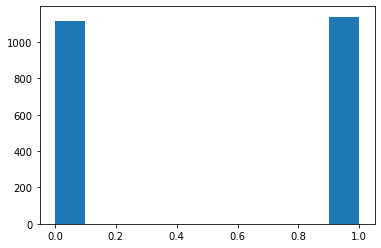

600GeV
4558.0
1140.0
[0. 1. 1. ... 0. 0. 0.]


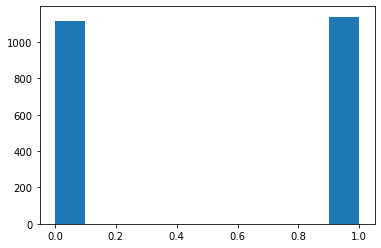

700GeV
4628.0
1158.0
[0. 0. 0. ... 1. 1. 0.]


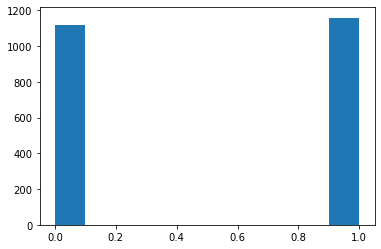

800GeV
4573.0
1144.0
[1. 1. 0. ... 1. 1. 1.]


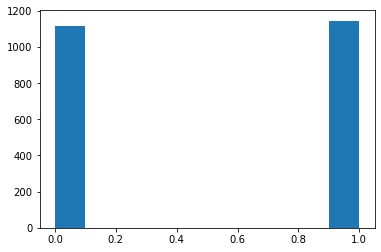

1000GeV
4580.0
1145.0
[0. 0. 1. ... 0. 1. 1.]


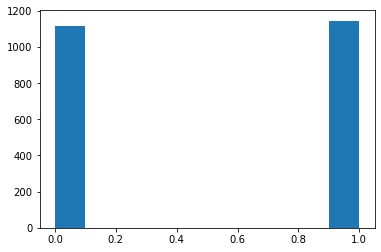

In [45]:
#this is the number of signal events in the training and test dataset
for y in range(len(y_train)):
    print (mass_points[y])
    print (y_train[y].sum())
    print (y_test[y].sum())
    
    plt.figure()
    print (y_test[y].values)
    plt.hist(y_test[y])
    plt.show()

In [46]:
for mod in range(len(model)):
    y_predict[mod] = model[mod].predict(x_test[mod].values).ravel()
    Classifier_testing_S[mod] = model[mod].predict(x_test[mod][y_test[mod]>=0.5].values).ravel()
    Classifier_testing_B[mod] = model[mod].predict(x_test[mod][y_test[mod]<0.5].values).ravel()

500GeV
[0.9856118  0.00490466 0.00468636 ... 0.98880297 0.9805649  0.00569868]


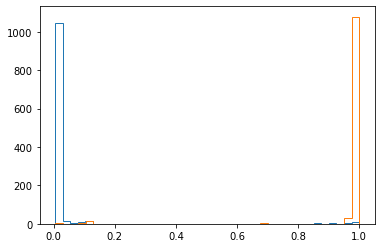

600GeV
[0.99060065 0.9934023  0.9929835  ... 0.11700413 0.00262061 0.0021514 ]


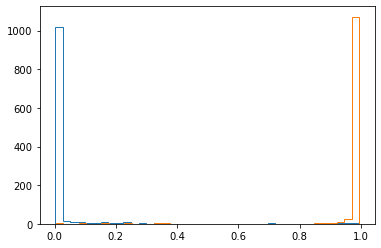

700GeV
[0.00444934 0.0026581  0.00272104 ... 0.9783784  0.99376905 0.00308481]


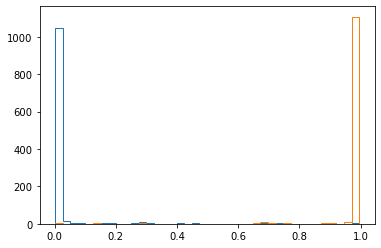

800GeV
[0.993499   0.9971802  0.00188896 ... 0.9967896  0.9966394  0.9950596 ]


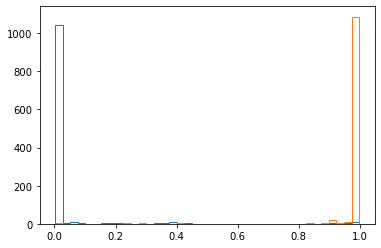

1000GeV
[0.00220901 0.00217786 0.99566257 ... 0.24797648 0.9564789  0.9958657 ]


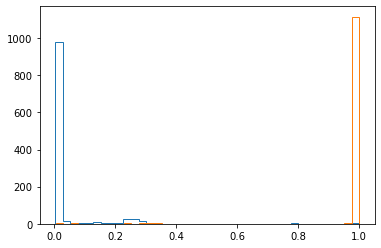

In [47]:
for y in range(len(y_predict)):
    print (mass_points[y])
    print (y_predict[y])
    plt.figure()
    plt.hist(Classifier_testing_B[y],bins=40,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=40,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_S[y]*n_sig_scaled[y]/n_bkg_scaled)
    plt.show()

In [60]:
'''for y in range(len(y_predict)):
    print (mass_points[y])
    print (y_predict[y])
    plt.figure()
    plt.hist(Classifier_testing_B[y],bins=50,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=50,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_S[y]*n_sig_scaled[y]/n_bkg_scaled)
    plt.yscale('log')
    plt.show()'''

'for y in range(len(y_predict)):\n    print (mass_points[y])\n    print (y_predict[y])\n    plt.figure()\n    plt.hist(Classifier_testing_B[y],bins=50,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)\n    plt.hist(Classifier_testing_S[y],bins=50,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_S[y]*n_sig_scaled[y]/n_bkg_scaled)\n    plt.yscale(\'log\')\n    plt.show()'

In [66]:
n_sig_scaled = ['n_sig_scaled_500','n_sig_scaled_600','n_sig_scaled_700','n_sig_scaled_800','n_sig_scaled_1000']
nevents_sig_total = [9999,10000,9998,10000,9999]
nevents_sig_passed = [5698,5698,5786,5717,5725]
xsec_sig = [11.9866, 06.3173, 3.49089, 2.00446, 0.729204]
xsec_bkg = 729770
n_bkg_scaled = (5571/100000)*(1/.5438)*100*xsec_bkg
#n_bkg_scaled = int((1/.5438)*100*xsec_bkg)
print (n_bkg_scaled)
for i in range(len(nevents_sig_total)):
    n_sig_scaled[i] = int((nevents_sig_passed[i]/nevents_sig_total[i])*100*xsec_sig[i])
#    n_sig_scaled[i] = ((100*xsec_sig[i]))
    print (n_sig_scaled[i])
#weights = [weight for i in Classifier_testing_B]
bins_list = [0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1.0]
#bins_list = (Classifier_testing_B[y].min(),Classifier_testing_B[y].max())

7476183.652077971
683
359
202
114
41


500GeV
[0.9856118  0.00490466 0.00468636 ... 0.98880297 0.9805649  0.00569868]


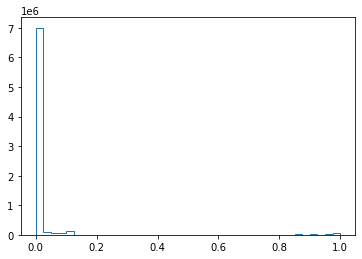

600GeV
[0.99060065 0.9934023  0.9929835  ... 0.11700413 0.00262061 0.0021514 ]


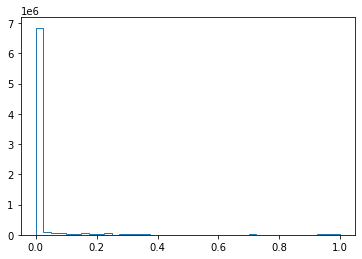

700GeV
[0.00444934 0.0026581  0.00272104 ... 0.9783784  0.99376905 0.00308481]


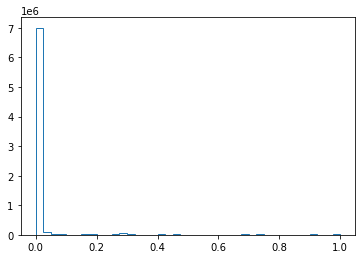

800GeV
[0.993499   0.9971802  0.00188896 ... 0.9967896  0.9966394  0.9950596 ]


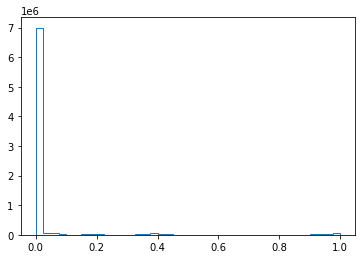

1000GeV
[0.00220901 0.00217786 0.99566257 ... 0.24797648 0.9564789  0.9958657 ]


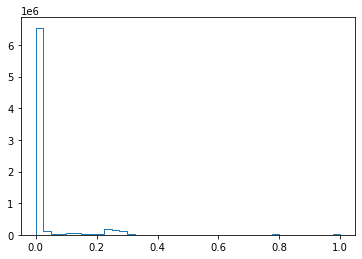

In [62]:
for y in range(len(y_predict)):
    print (mass_points[y])
    print (y_predict[y])
    plt.figure()
    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
#    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
#    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
    plt.show()

500GeV
[0.9856118  0.00490466 0.00468636 ... 0.98880297 0.9805649  0.00569868]


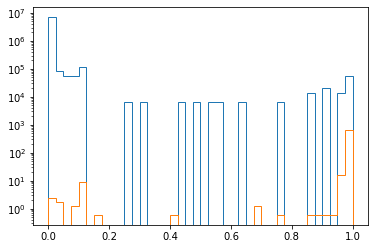

600GeV
[0.99060065 0.9934023  0.9929835  ... 0.11700413 0.00262061 0.0021514 ]


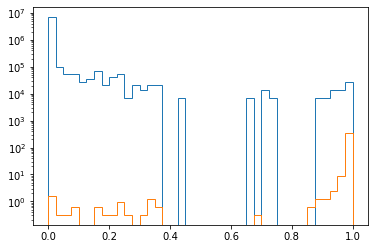

700GeV
[0.00444934 0.0026581  0.00272104 ... 0.9783784  0.99376905 0.00308481]


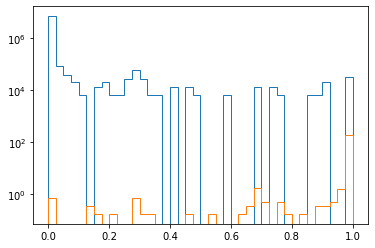

800GeV
[0.993499   0.9971802  0.00188896 ... 0.9967896  0.9966394  0.9950596 ]


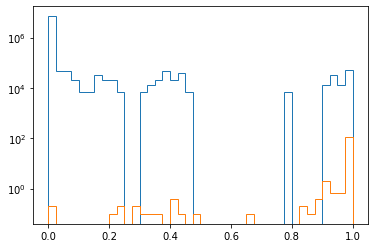

1000GeV
[0.00220901 0.00217786 0.99566257 ... 0.24797648 0.9564789  0.9958657 ]


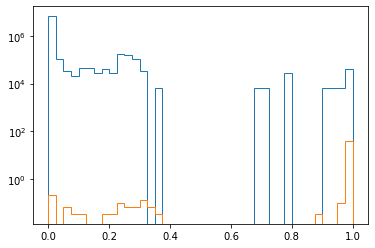

In [63]:
for y in range(len(y_predict)):
    print (mass_points[y])
    print (y_predict[y])
    plt.figure()
    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
#    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
#    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
    plt.yscale('log')
    plt.show()

In [64]:
fpr_keras = ['fpr_keras_500','fpr_keras_600','fpr_keras_700','fpr_keras_800','fpr_keras_1000']
tpr_keras = ['tpr_keras_500','tpr_keras_600','tpr_keras_700','tpr_keras_800','tpr_keras_1000']
fnr_keras = ['fnr_keras_500','fnr_keras_600','fnr_keras_700','fnr_keras_800','fnr_keras_1000']
precision = ['precision_500','precision_600','precision_700','precision_800','precision_1000']
recall = ['recall_500','recall_600','recall_700','recall_800','recall_1000']
auc_model = ['auc_model_500','auc_model_600','auc_model_700','auc_model_800','auc_model_1000']
auc_model_rve = ['auc_model_rve_500','auc_model_rve_600','auc_model_rve_700','auc_model_rve_800','auc_model_rve_1000']
thresholds_keras = ['thresholds_keras_500','thresholds_keras_600','thresholds_keras_700','thresholds_keras_800','thresholds_keras_1000']

In [65]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import det_curve

for y in range(len(y_predict)):
    y_predict[y] = model[y].predict(x_test[y].values).ravel()

    fpr_keras[y], tpr_keras[y], thresholds_keras[y] = roc_curve(y_test[y], y_predict[y])

    auc_model[y] = auc(tpr_keras[y], (1-fpr_keras[y]))

500GeV


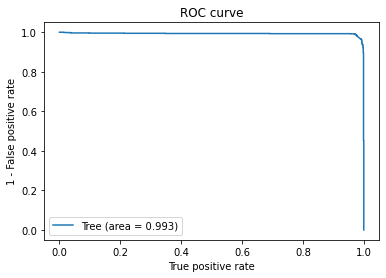

600GeV


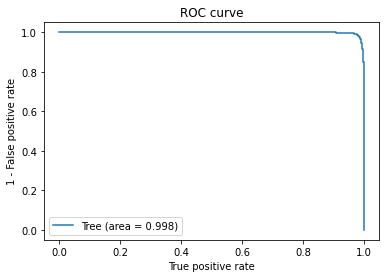

700GeV


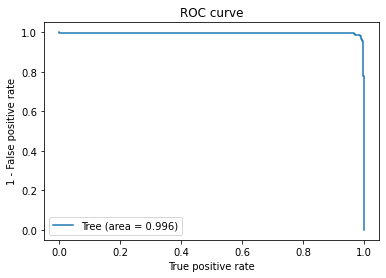

800GeV


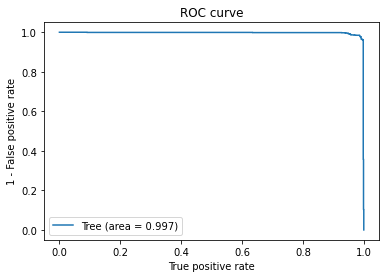

1000GeV


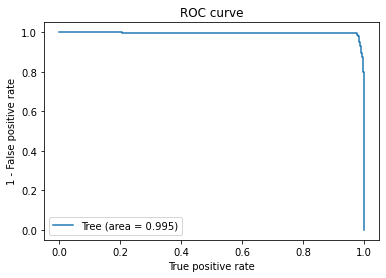

In [54]:
for a in range(len(auc_model)):
    print(mass_points[a])
    plt.figure()
#    plt.plot_precision_recall_curve(y_test[a], y_predict[a])
    plt.plot(tpr_keras[a], 1-fpr_keras[a], label='Tree (area = {:.3f})'.format(auc_model[a]))
    plt.xlabel('True positive rate')
    plt.ylabel('1 - False positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

<ipython-input-55-871a9076145e>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


500GeV


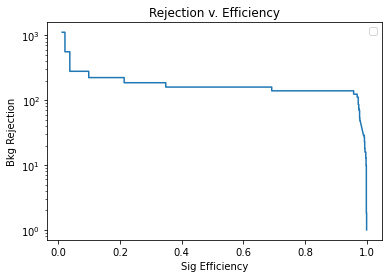

<ipython-input-55-871a9076145e>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


600GeV


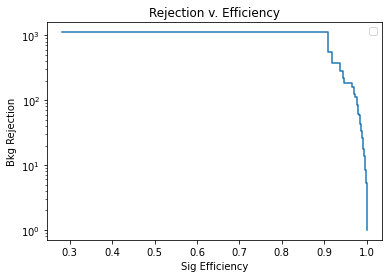

<ipython-input-55-871a9076145e>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


700GeV


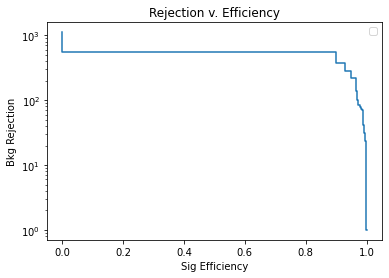

<ipython-input-55-871a9076145e>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


800GeV


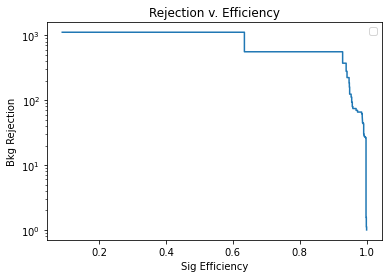

<ipython-input-55-871a9076145e>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


1000GeV


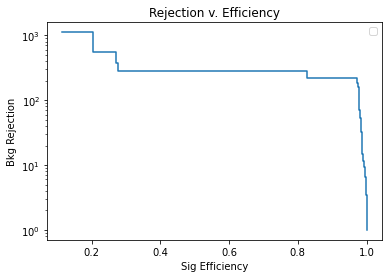

In [55]:
#for y in range(len(y_predict)):
#    auc_model_rve[y] = auc(tpr_keras[y], (1/fpr_keras[y]))
    
for a in range(len(auc_model)):
    print(mass_points[a])
    plt.figure()
    plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
    plt.xlabel('Sig Efficiency')
    plt.ylabel('Bkg Rejection')
    plt.title('Rejection v. Efficiency')
    plt.legend(loc='best')
    plt.yscale('log')
    plt.show()

In [56]:
print ('ROC curve')
area_table = pd.DataFrame({'mass_{H+}':mass_points,
                          'area':auc_model})
area_table

ROC curve


mass_{H+}      area
0    500GeV  0.992918
1    600GeV  0.998003
2    700GeV  0.996394
3    800GeV  0.996715
4   1000GeV  0.995281

In [57]:
print ('rejection vs efficiency')
area_table_rve = pd.DataFrame({'mass_{H+}':mass_points,
                          'area':auc_model_rve})
area_table_rve

rejection vs efficiency


mass_{H+}                area
0    500GeV   auc_model_rve_500
1    600GeV   auc_model_rve_600
2    700GeV   auc_model_rve_700
3    800GeV   auc_model_rve_800
4   1000GeV  auc_model_rve_1000

In [58]:
#end of model

In [59]:
#test 2: splitting same csv's into test/train by combining even/odd entry indices. Each file is 1/2 sig + 1/2 bkg

df_train = pd.concat([df_norm_bkg.iloc[::2],df_norm_sig.iloc[::2]])
df_test =  pd.concat([df_norm_bkg.iloc[1::2],df_norm_sig.iloc[1::2]])

#df_train = pd.concat([df_norm_bkg.iloc[[i%2==1 for i in range(len(df_norm_bkg))]],df_norm_sig.iloc[[i%2==0 for i in range(len(df_norm_sig))]]])
#df_test =  pd.concat([df_norm_bkg.iloc[[i%2==0 for i in range(len(df_norm_bkg))]],df_norm_sig.iloc[[i%2==1 for i in range(len(df_norm_sig))]]])

df_train = sklearn.utils.shuffle(df_train)
df_test = sklearn.utils.shuffle(df_test)

x_train = df_train[variable].reset_index(drop=True)
y_train = df_train["signal"].reset_index(drop=True)

x_test = df_test[variable].reset_index(drop=True)
y_test = df_test["signal"].reset_index(drop=True)

AttributeError: 'list' object has no attribute 'iloc'

In [ ]:
df_train

In [ ]:
df_test

In [ ]:
test_array = df_test[variable].reset_index(drop=True)
test_array["signal"] = 1

In [ ]:
test_array

In [ ]:
df_x_test = df_test[variable].reset_index(drop=True)
df_y_test = df_test["signal"].reset_index(drop=True)

In [ ]:
df_y_test

In [ ]:
test_predict = model.predict(df_x_test.values).ravel()
fpr_, tpr_, thresholds_ = roc_curve(df_y_test, test_predict)
auc_test = auc(fpr_, tpr_)
print (auc_test)
plt.figure()
plt.hist(test_predict)
plt.show()

In [ ]:
plt.figure()

plt.plot(fpr_, tpr_, label='Area under the curve (area = {:.3f})'.format(auc_test))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
### Beginning of DT ###
#from sklearn import tree


#n_bkg = round(4010*80/100)
#n_sig = round(5000*80/100)
#n_bkg = round(8026*80/100)
#n_sig = round(10000*80/100)


#df_train = pd.concat([df_sig.iloc[:n_sig],df_bkg.iloc[:n_bkg]])
#df_test =  pd.concat([df_sig.iloc[n_sig:],df_bkg.iloc[n_bkg:]])

#df_train = sklearn.utils.shuffle(df_train)
#df_test = sklearn.utils.shuffle(df_test)

#x_train = df_train[variable].reset_index(drop=True)
#y_train = df_train["signal"].reset_index(drop=True)

#x_test = df_test[variable].reset_index(drop=True)
#y_test = df_test["signal"].reset_index(drop=True)

In [ ]:
#end test predict for 50:50 test:train

In [ ]:
#Decision tree for lower level variables above - refer to DecisionTree-higherLevelVar for higher level DT

In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#y_predict_tree = tree_model.predict(x_test)
y_predict_tree = tree_model.predict_proba(x_test)[:,1]
fpr,tpr,t = roc_curve(y_test,y_predict_tree)
auc_tree = auc(fpr,tpr)

In [ ]:
y_test

In [ ]:
plt.figure()

plt.plot(fpr, tpr, label='Tree (area = {:.3f})'.format(auc_tree))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
#from https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting
from sklearn.ensemble import GradientBoostingClassifier

GDC = GradientBoostingClassifier(n_estimators=500, learning_rate=0.6,
                                 max_depth=5, random_state=0).fit(x_train, y_train)
GDC.score(x_test,y_test)

In [ ]:
y_predict_gdc = GDC.predict_proba(x_test)[:,1]
fpr_gdc,tpr_gdc,t = roc_curve(y_test,y_predict_gdc)
auc_gdc = auc(fpr_gdc,tpr_gdc)

plt.figure()

plt.plot(fpr_gdc, tpr_gdc, label=' GDC Tree (area = {:.3f})'.format(auc_gdc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier 

tree_2 = ExtraTreesClassifier(verbose=1,n_estimators=50)

In [ ]:
tree_2.fit(x_train,y_train)

In [ ]:
tree_2.score(x_test,y_test)

In [ ]:
#End of DT - Begin new model1 

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout

model1 = Sequential()
model1.add(Dense(15, input_dim=x_train.shape[1], kernel_initializer="random_uniform", activation='tanh'))
model1.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model1.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

In [ ]:
history1 = model1.fit(x_train.values,y_train.values,validation_data=(x_test.values,y_test.values), epochs=50, batch_size=32)

In [ ]:
model1.metrics_names
model1.evaluate(x_test.values,y_test.values,batch_size=32)

In [ ]:
y_predict1 = model1.predict(x_test.values, batch_size=32)

In [ ]:
print (y_predict1)

plt.figure()
plt.hist(y_predict1)
plt.show()

In [ ]:
for u in history1.history:
    plt.figure()
    plt.plot(history1.history[u])
    plt.title(u)

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

fpr_1, tpr_1, thresholds_keras = roc_curve(y_test, y_predict1)

auc_model1 = auc(fpr_1, tpr_1)

In [ ]:
plt.figure()

plt.plot(fpr_1, tpr_1, label='Tree (area = {:.3f})'.format(auc_model1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
###Stochastic Gradient Decent###
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge")
clf.fit(x_train,y_train)
#x_test["signal"] = 1

In [ ]:
y_test

In [ ]:
print(x_test.columns)
plt.hist(clf.decision_function(x_test[x_test.values == 1]),bins='auto')
#plt.hist(clf.decision_function(x_test[x_test.signal == 1]),bins='auto')
plt.show()

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
y_predit1 = clf.predict(x_test)

fpr_1, tpr_1, thresholds_keras = roc_curve(y_test, y_predit1)


auc_model1 = auc(fpr_1, tpr_1)
plt.figure()

plt.plot(fpr_1, tpr_1, label='Tree (area = {:.3f})'.format(auc_model1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()